# UAS DATA MINING GANJIL 2023

**Kelompok**
1. Esly Vani Frasanti Saragih (2106700782)
2. Whitney (2106700946)
3. Yumna Izzati (2106633191)
4. Laras Kirana Anindita (2106653035)
5. Rifqah Majidah A. Nasution (2106725122)

Drive project: https://drive.google.com/drive/folders/1vclsL4AUCM2pLfyY0sj0-rGJx0S9Y1ql?usp=drive_link  

Objektif:
1. Lakukan Proses Mining pada Data yang diberikan.
2. Dari hasil A ada informasi/insight apa saja dari data yang bisa didapatkan.
3. Buat sebuah laporan/presentasi dari hasil B.

# Data Understanding

In [ ]:
import warnings; warnings.simplefilter('ignore')
import gdown
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
#Upload Data

!gdown 1ZFXJvdGhbgU49y6M4bHlDP4ijd_58eHi

Downloading...
From: https://drive.google.com/uc?id=1ZFXJvdGhbgU49y6M4bHlDP4ijd_58eHi
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.csv
100% 195M/195M [00:02<00:00, 94.3MB/s]


In [ ]:
df = pd.read_csv ("/content/data_kesehatan-Mental-SRQ-2023--Filtered.csv")
df

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0            1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1            2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2            3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3            4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4            5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
...        ...     ...           ...   ...            ...                 ...   
289796  289797  KALSEL   LAKI - LAKI  23.0            4.0                 SMA   
289797  289798  JATENG     PEREMPUAN  54.0           27.0                 SMA   
289798  289799  SUMSEL   LAKI - LAKI  51.0           51.0                 SMA   
289799  289800   JABAR   LAKI - LAKI  35.0           17.0                 SMA   
289800  289801   JABAR   LAKI - LAKI  19.0            1.0                 SMA   

       TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  ...  \
0             168.9         85.0             100.0           Menikah  ...   
1             169.5         70.0              80.0           Menikah  ...   
2             169.5         60.0              78.0     Belum Menikah  ...   
3             166.8         80.0              34.0           Menikah  ...   
4             164.5         62.0              32.0           Menikah  ...   
...             ...          ...               ...               ...  ...   
289796          169         60.0              78.0           Menikah  ...   
289797          155         60.0              62.0           Menikah  ...   
289798          575         57.0              28.0           Menikah  ...   
289799          179         55.0              68.0           Menikah  ...   
289800          171        100.0              33.0     Belum Menikah  ...   

       Sumber air bersih di tempat tinggal saudara ?  \
0                                            Air PAM   
1                                            Air PAM   
2                                            Air PAM   
3                                            Air PAM   
4                                            Air PAM   
...                                              ...   
289796                                       Air PAM   
289797                                    Sumur/Kali   
289798                                    Sumur/Kali   
289799                                    Sumur/Kali   
289800                                    Sumur/Kali   

       Penggunaan air bersih untuk makan & minum bersumber dari :   \
0                                             Tadah hujan            
1                                   Air mineral isi ulang            
2                                   Air mineral isi ulang            
3                                   Air mineral isi ulang            
4                                   Air mineral isi ulang            
...                                                   ...            
289796                                            Air PAM            
289797                                Air mineral kemasan            
289798                                          Air sumur            
289799                                          Air sumur            
289800                                          Air sumur            

       Berapa jarak jamban dengan sumur dirumah saudara ?  \
0                                     Lebih dari 12 meter   
1                                     Lebih dari 12 meter   
2                             Tidak memiliki jamban sehat   
3                             Tidak memiliki jamban sehat   
4                                     Lebih dari 12 meter   
...                                                   ...   
289796                        Tidak memiliki jamban sehat   
289797                               Kurang dari 12 meter   
289798                                Lebih dari 12

Data memiliki 79 Kolom dengan 289.801 baris.

In [ ]:
#Melihat informasi dari tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

Dari informasi data di atas, kami melihat bahwa *primary_use* memiliki tipe data **object**.

In [ ]:
#Memeriksa apakah terdapat duplikasi data

columns_to_check = df.columns.difference(["ID"])
duplicate_rows = df.duplicated(subset=columns_to_check, keep="first")

print("Banyaknya duplikasi data:", duplicate_rows.sum(), "records")

Banyaknya duplikasi data: 8 records


In [ ]:
#Memeriksa apakah terdapat missing value

print("\n Banyaknya NaN pada data: \n{}\n".format(df.isnull().sum()))
print((df.isnull().sum()/len(df)*100).to_frame("Presentase Missing"))


 Banyaknya NaN pada data: 
ID                                                                                                                  0
WILAYAH                                                                                                             0
JENIS KELAMIN                                                                                                       0
USIA                                                                                                                0
LAMA BERDINAS                                                                                                       0
                                                                                                                ...  
Berapa jarak tempat sampah dengan rumah saudara ?                                                               41649
Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?        0
Kelompok Umur               

In [ ]:
#Statistika Deskriptif
df.describe(include = 'all')

ID WILAYAH JENIS KELAMIN          USIA  LAMA BERDINAS  \
count   289801.000000  289801        289801  2.898010e+05   2.898010e+05   
unique            NaN      34             2           NaN            NaN   
top               NaN   JATIM   LAKI - LAKI           NaN            NaN   
freq              NaN   31305        267664           NaN            NaN   
mean    144901.000000     NaN           NaN  4.317251e+02   5.984390e+02   
std      83658.487018     NaN           NaN  7.551491e+04   1.201622e+05   
min          1.000000     NaN           NaN  1.500000e+01   0.000000e+00   
25%      72451.000000     NaN           NaN  2.900000e+01   9.000000e+00   
50%     144901.000000     NaN           NaN  3.800000e+01   1.800000e+01   
75%     217351.000000     NaN           NaN  4.400000e+01   2.300000e+01   
max     289801.000000     NaN           NaN  2.309198e+07   3.101201e+07   

       PENDIDIKAN TERAKHIR  TINGGI BADAN    BERAT BADAN  LINGKAR PINGGANG  \
count               289801      289801.0  289801.000000     289801.000000   
unique                   6         283.0            NaN               NaN   
top                    SMA         170.0            NaN               NaN   
freq                193926       48804.0            NaN               NaN   
mean                   NaN           NaN      96.176577         65.558079   
std                    NaN           NaN     887.911773        188.430313   
min                    NaN           NaN       1.000000        -75.000000   
25%                    NaN           NaN      66.000000         36.000000   
50%                    NaN           NaN      72.000000         73.000000   
75%                    NaN           NaN      80.000000         84.000000   
max                    NaN           NaN   90210.000000     100000.000000   

       Status Perkawinan  ... Sumber air bersih di tempat tinggal saudara ?  \
count             289801  ...                                        289801   
unique                 4  ...                                             4   
top              Menikah  ...                                       Air PAM   
freq              233505  ...                                        161077   
mean                 NaN  ...                                           NaN   
std                  NaN  ...                                           NaN   
min                  NaN  ...                                           NaN   
25%                  NaN  ...                                           NaN   
50%                  NaN  ...                                           NaN   
75%                  NaN  ...                                           NaN   
max                  NaN  ...                                           NaN   

       Penggunaan air bersih untuk makan & minum bersumber dari :   \
count                                              289801            
unique                                                  5            
top                                 Air mineral isi ulang            
freq                                                92949            
mean                                                  NaN            
std                                                   NaN            
min                                                   NaN            
25%                                                   NaN            
50%                                                   NaN            
75%                                                   NaN            
max                                                   NaN            

       Berapa jarak jamban dengan sumur dirumah saudara ?  \
count                                              289801   
unique                                                  3   
top                                   Lebih dari 12 meter   
freq                                               152723   
mean                                                  NaN   
std                      

Dari hasil Statistika Deskriptif di atas, tidak ada noise pada data. Beberapa kolom pada data memiliki *missing values* pada bagian informasi data diri. Kita bisa melakukan *drop* kolom pada kolom yang tidak akan digunakan dalam komputasi selanjutnya.

# Pre Processing

Missing Values

In [ ]:
#Melihat Missing Data, dimana True = Hilang, False = Tidak Hilang.
missing_data = df.isnull()
missing_data.head(500)

ID  WILAYAH  JENIS KELAMIN   USIA  LAMA BERDINAS  PENDIDIKAN TERAKHIR  \
0    False    False          False  False          False                False   
1    False    False          False  False          False                False   
2    False    False          False  False          False                False   
3    False    False          False  False          False                False   
4    False    False          False  False          False                False   
..     ...      ...            ...    ...            ...                  ...   
495  False    False          False  False          False                False   
496  False    False          False  False          False                False   
497  False    False          False  False          False                False   
498  False    False          False  False          False                False   
499  False    False          False  False          False                False   

     TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG  Status Perkawinan  ...  \
0           False        False             False              False  ...   
1           False        False             False              False  ...   
2           False        False             False              False  ...   
3           False        False             False              False  ...   
4           False        False             False              False  ...   
..            ...          ...               ...                ...  ...   
495         False        False             False              False  ...   
496         False        False             False              False  ...   
497         False        False             False              False  ...   
498         False        False             False              False  ...   
499         False        False             False              False  ...   

     Sumber air bersih di tempat tinggal saudara ?  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
..                                             ...   
495                                          False   
496                                          False   
497                                          False   
498                                          False   
499                                          False   

     Penggunaan air bersih untuk makan & minum bersumber dari :   \
0                                                False             
1                                                False             
2                                                False             
3                                                False             
4                                                False             
..                                                 ...             
495                                              False             
496                                              False             
497                                              False             
498                                              False             
499                                              False             

     Berapa jarak jamban dengan sumur dirumah saudara ?  \
0                                                False    
1                                                False    
2                                                False    
3                                                False    
4                                                False    
..                                                 ...    
495                                              False    
496                                              False    
497                                              False    
498                                              False    
499    

In [ ]:
for column in missing_data.columns.values.tolist(): #Melihat jumlah data hilang pada tiap kolom
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    289801
Name: ID, dtype: int64

WILAYAH
False    289801
Name: WILAYAH, dtype: int64

JENIS KELAMIN
False    289801
Name: JENIS KELAMIN, dtype: int64

USIA
False    289801
Name: USIA, dtype: int64

LAMA BERDINAS
False    289801
Name: LAMA BERDINAS, dtype: int64

PENDIDIKAN TERAKHIR
False    289801
Name: PENDIDIKAN TERAKHIR, dtype: int64

TINGGI BADAN
False    289801
Name: TINGGI BADAN, dtype: int64

BERAT BADAN
False    289801
Name: BERAT BADAN, dtype: int64

LINGKAR PINGGANG
False    289801
Name: LINGKAR PINGGANG, dtype: int64

Status Perkawinan
False    289801
Name: Status Perkawinan, dtype: int64

PENGELUARAN/BULAN
False    289801
Name: PENGELUARAN/BULAN, dtype: int64

Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?
False    289801
Name: Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?, dtype: int64

Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?
False    289801
Name: Apakah saudara pernah di diagnosa atau menderit

In [ ]:
df.isna().sum() #Melihat jumlah data yang memiliki Missing Values

ID                                                                                                                  0
WILAYAH                                                                                                             0
JENIS KELAMIN                                                                                                       0
USIA                                                                                                                0
LAMA BERDINAS                                                                                                       0
                                                                                                                ...  
Berapa jarak tempat sampah dengan rumah saudara ?                                                               41649
Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?        0
Kelompok Umur                                           

Meskipun banyak *missing values* pada data ini, akan diabaikan kolom pertanyaan 1-10 tentang informasi diri dan dilakukan pendalaman insight lebih jauh. Alasan lain pre-processing hanya menunjukan karena data sudah cukup bagus dan ada kemungkinan responden mengisi jawaban secara overlapping sehingga tidak mungkin data duplikat di hapus ataupun mengisi missing values dengan nilai mean/median.

###**RENAME KOLOM**###
Diperlukan rename kolom, mengingat variabel-variabel kolom tersebut sangat panjang sehingga mempersulit penulisan kode. Pembaruan nama kolom ini akan menyesuaikan bentuk (angka,huruf) sesuai kategori.

In [ ]:
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?':'1a'},inplace=True )
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?':'2a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?':'3a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?':'4a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?':'5a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?':'6a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?':'7a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?':'8a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?':'9a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?':'10a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?':'11a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?':'12a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?':'13a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?':'14a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?':'15a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?':'16a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?':'17a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?':'18a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?':'19a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?':'20a'},inplace=True)

In [ ]:
df.rename(columns={'Sering menderita sakit kepala ?':'1b'},inplace=True )
df.rename(columns={'Tidak nafsu makan ?':'2b'},inplace=True)
df.rename(columns={'Sulit tidur ?':'3b'},inplace=True)
df.rename(columns={'Mudah takut ?':'4b'},inplace=True)
df.rename(columns={'Merasa tegang, cemas atau kuatir ?':'5b'},inplace=True)
df.rename(columns={'Tangan anda gemetar ?':'6b'},inplace=True)
df.rename(columns={'Pencernaan anda terganggu / buruk ?':'7b'},inplace=True)
df.rename(columns={'Sulit untuk berpikir jernih ?':'8b'},inplace=True)
df.rename(columns={'Merasa tidak bahagia ?':'9b'},inplace=True)
df.rename(columns={'Menangis lebih sering ?':'10b'},inplace=True)
df.rename(columns={'Merasa sulit untuk menikmati kegiatan sehari – hari?':'11b'},inplace=True)
df.rename(columns={'Sulit untuk mengambil keputusan ?':'12b'},inplace=True)
df.rename(columns={'Pekerjaan anda sehari – hari terganggu ?':'13b'},inplace=True)
df.rename(columns={'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?':'14b'},inplace=True)
df.rename(columns={'Kehilangan minat pada berbagai hal ?':'15b'},inplace=True)
df.rename(columns={'Tidak merasa berharga?':'16b'},inplace=True)
df.rename(columns={'Mempunyai pikiran untuk mengakhiri hidup?':'17b'},inplace=True)
df.rename(columns={'Merasa lelah sepanjang waktu?':'18b'},inplace=True)
df.rename(columns={'Mengalami rasa tidak enak di perut?':'19b'},inplace=True)
df.rename(columns={'Mudah lelah ?':'20b'},inplace=True)
df.rename(columns={'Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)':'21b'},inplace=True )
df.rename(columns={'Jika Ya berapa jumlah gigi saudara yang Karies':'22b'},inplace=True)
df.rename(columns={'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?':'23b'},inplace=True)
df.rename(columns={'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?':'24b'},inplace=True)
df.rename(columns={'Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?':'25b'},inplace=True)
df.rename(columns={'Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?':'26b'},inplace=True)
df.rename(columns={'Berapa lama saudara mandi ?':'27b'},inplace=True)
df.rename(columns={'Apakah saudara merokok ?':'28b'},inplace=True)
df.rename(columns={'Jika Ya, Berapa Batang Saudara merokok dalam sehari?':'29b'},inplace=True)
df.rename(columns={'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?':'30b'},inplace=True)
df.rename(columns={'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?':'31b'},inplace=True)
df.rename(columns={'Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari':'32b'},inplace=True)
df.rename(columns={'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?':'33b'},inplace=True)
df.rename(columns={'Berapa lama saudara menggosok gigi ?':'34b'},inplace=True)
df.rename(columns={'Dalam sehari, berapa kali Saudara mengganti pakaian dalam?':'35b'},inplace=True)
df.rename(columns={'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?':'36b'},inplace=True)
df.rename(columns={'Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?':'37b'},inplace=True)
df.rename(columns={'Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?':'38b'},inplace=True)
df.rename(columns={'Sumber air bersih di tempat tinggal saudara ?':'39b'},inplace=True)
df.rename(columns={'Penggunaan air bersih untuk makan & minum bersumber dari : ':'40b'},inplace=True)
df.rename(columns={'Berapa jarak jamban dengan sumur dirumah saudara ?':'41b'},inplace=True)
df.rename(columns={'Bagaimana saluran pembuangan air (sanitasi) rumah tangga?':'42b'},inplace=True)
df.rename(columns={'Apakah terdapat tempat sampah di sekitar rumah? ':'43b'},inplace=True)
df.rename(columns={'Berapa jarak tempat sampah dengan rumah saudara ?':'44b'},inplace=True)
df.rename(columns={'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?':'45b'},inplace=True)
df.rename(columns={'Kelompok Umur':'46b'},inplace=True)
df.rename(columns={'NILAI IMT':'47b'},inplace=True)
df.rename(columns={'IMT':'48b'},inplace=True)


In [ ]:
df.head()

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0   1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1   2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2   3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3   4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4   5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   

  TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  ...      39b  \
0        168.9         85.0             100.0           Menikah  ...  Air PAM   
1        169.5         70.0              80.0           Menikah  ...  Air PAM   
2        169.5         60.0              78.0     Belum Menikah  ...  Air PAM   
3        166.8         80.0              34.0           Menikah  ...  Air PAM   
4        164.5         62.0              32.0           Menikah  ...  Air PAM   

                     40b                          41b  42b            43b  \
0            Tadah hujan          Lebih dari 12 meter  Ada   Ada, terbuka   
1  Air mineral isi ulang          Lebih dari 12 meter  Ada  Ada, tertutup   
2  Air mineral isi ulang  Tidak memiliki jamban sehat  Ada      Tidak ada   
3  Air mineral isi ulang  Tidak memiliki jamban sehat  Ada  Ada, tertutup   
4  Air mineral isi ulang          Lebih dari 12 meter  Ada  Ada, tertutup   

                   44b        45b      46b    47b       48b  
0  Lebih dari 10 meter  Tidak ada  25 - 34  29.80  Obesitas  
1  Lebih dari 10 meter  Tidak ada  35 - 44  24.36    Normal  
2                  NaN  Tidak ada  15 - 24  20.88    Normal  
3  Lebih dari 10 meter  Tidak ada  35 - 44  28.75  Obesitas  
4  Lebih dari 10 meter        Ada  25 - 34  22.91    Normal  

[5 rows x 79 columns]

# Visualisasi Simple

Melihat Pie Chart dari kolom Jenis Kelamin

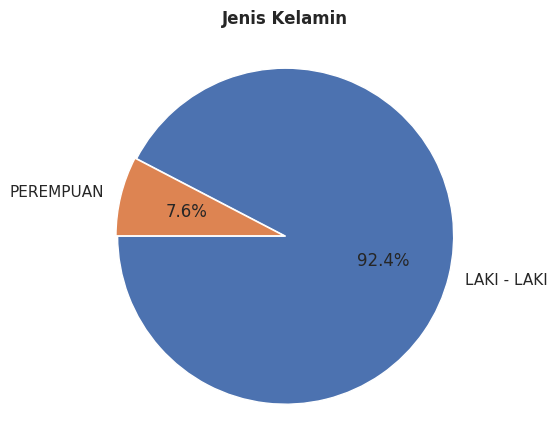

In [ ]:
labels = df['JENIS KELAMIN'].value_counts().index

plt.pie(df['JENIS KELAMIN'].value_counts(),labels=labels, autopct='%1.1f%%',startangle=180, explode=(0.005,0.005))
plt.axis('equal')
plt.title('Jenis Kelamin', fontsize=12, fontweight='bold', pad=20)
plt.show()

Mayoritas responden adalah berjenis kelamin laki-laki.

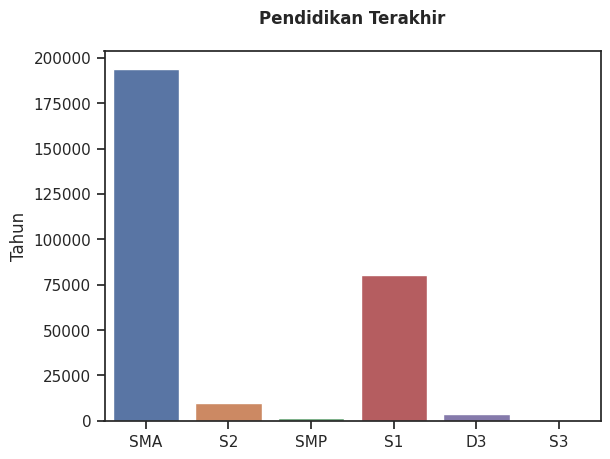

In [ ]:
sns.countplot(data=df, x='PENDIDIKAN TERAKHIR').set(xlabel=None, ylabel='Tahun')
plt.title('Pendidikan Terakhir', fontsize=12, fontweight='bold', pad=20)
sns.color_palette("pastel")

plt.show()

Dapat dilihat bahwa responden memiliki pendidikan terakhir terbanyak, yaitu SMA. Asumsi responden masih berada pada tahap S1.

# Insight Analisis Klasifikasi

1. Analisis Klasifikasi
(model klasifikasi dari pertanyaan 31-78 didiagnosis penyakit apa)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


###*data akan disatukan berdasarkan diagnosis penyakit yes menjadi satu tabel*###

In [ ]:
#%%
from pickle import TRUE
df.drop(['ID','WILAYAH','JENIS KELAMIN','USIA','LAMA BERDINAS','PENDIDIKAN TERAKHIR','TINGGI BADAN','BERAT BADAN','LINGKAR PINGGANG',
         'Status Perkawinan','PENGELUARAN/BULAN'],axis = 1, inplace =True)

In [ ]:
pred = df[['1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]

In [ ]:
data1 = df[['1a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data1a = data1[data1['1a']=='Ya']
data1a.replace({'1a':{'Ya':'Jantung'}},inplace=True)
data1a.rename(columns={'1a':'Penyakit'},inplace =True)

data2 = df[['2a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data2a = data2[data2['2a']=='Ya']
data2a.replace({'2a':{'Ya':'Stroke'}},inplace=True)
data2a.rename(columns={'2a':'Penyakit'},inplace =True)

data3 = df[['3a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data3a = data3[data3['3a']=='Ya']
data3a.replace({'3a':{'Ya':'Diabetes'}},inplace=True)

data4 = df[['4a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data4a = data4[data4['4a']=='Ya']
data4a.replace({'4a':{'Ya':'Hipertensi'}},inplace=True)

data5 = df[['5a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data5a = data5[data5['5a']=='Ya']
data5a.replace({'5a':{'Ya':'Kanker'}},inplace=True)

data6 = df[['6a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data6a = data6[data6['6a']=='Ya']
data6a.replace({'6a':{'Ya':'Ginjal'}},inplace=True)

data7 = df[['7a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data7a = data7[data7['7a']=='Ya']
data7a.replace({'7a':{'Ya':'Tumor'}},inplace=True)

data8 = df[['8a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data8a = data8[data8['8a']=='Ya']
data8a.replace({'8a':{'Ya':'Osteoartritis'}},inplace=True)

data9 = df[['9a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data9a = data9[data9['9a']=='Ya']
data9a.replace({'9a':{'Ya':'Lambung'}},inplace=True)

data10 = df[['10a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data10a = data10[data10['10a']=='Ya']
data10a.replace({'10a':{'Ya':'Liver'}},inplace=True)

data11 = df[['11a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data11a = data11[data11['11a']=='Ya']
data11a.replace({'11a':{'Ya':'TBC'}},inplace=True)

data12 = df[['12a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data12a = data12[data12['12a']=='Ya']
data12a.replace({'12a':{'Ya':'DBD'}},inplace=True)

data13 = df[['13a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data13a = data13[data13['13a']=='Ya']
data13a.replace({'13a':{'Ya':'Covid-19'}},inplace=True)

data14 = df[['14a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data14a = data14[data14['14a']=='Ya']
data14a.replace({'14a':{'Ya':'HIV/AIDS'}},inplace=True)

data15 = df[['15a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data15a = data15[data15['15a']=='Ya']
data15a.replace({'15a':{'Ya':'Diare'}},inplace=True)

data16 = df[['16a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data16a = data16[data16['16a']=='Ya']
data16a.replace({'16a':{'Ya':'Malaria'}},inplace=True)

data17 = df[['17a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data17a = data17[data17['17a']=='Ya']
data17a.replace({'17a':{'Ya':'Gonore'}},inplace=True)

data18 = df[['18a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data18a = data18[data18['18a']=='Ya']
data18a.replace({'18a':{'Ya':'Thypus'}},inplace=True)

data19 = df[['19a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data19a = data19[data19['19a']=='Ya']
data19a.replace({'19a':{'Ya':'Dermatitis'}},inplace=True)

data20 = df[['20a','1b','2b','3b','4b','5b','6b','7b','8b','9b','10b','11b','12b','13b','14b','15b','16b','17b','18b','19b','20b',
           '21b','22b','23b','24b','25b','26b','27b','28b','29b','30b','31b','32b','33b','34b','35b','36b','37b','38b','39b','40b',
           '41b','42b','43b','44b','45b','46b','48b']]
data20a = data20[data20['20a']=='Ya']
data20a.replace({'20a':{'Ya':'Mikosis'}},inplace=True)


In [ ]:
data3a.rename(columns={'3a':'Penyakit'},inplace =True)
data4a.rename(columns={'4a':'Penyakit'},inplace =True)
data5a.rename(columns={'5a':'Penyakit'},inplace =True)
data6a.rename(columns={'6a':'Penyakit'},inplace =True)
data7a.rename(columns={'7a':'Penyakit'},inplace =True)
data8a.rename(columns={'8a':'Penyakit'},inplace =True)
data9a.rename(columns={'9a':'Penyakit'},inplace =True)
data10a.rename(columns={'10a':'Penyakit'},inplace =True)
data11a.rename(columns={'11a':'Penyakit'},inplace =True)
data12a.rename(columns={'12a':'Penyakit'},inplace =True)
data13a.rename(columns={'13a':'Penyakit'},inplace =True)
data14a.rename(columns={'14a':'Penyakit'},inplace =True)
data15a.rename(columns={'15a':'Penyakit'},inplace =True)
data16a.rename(columns={'16a':'Penyakit'},inplace =True)
data17a.rename(columns={'17a':'Penyakit'},inplace =True)
data18a.rename(columns={'18a':'Penyakit'},inplace =True)
data19a.rename(columns={'19a':'Penyakit'},inplace =True)
data20a.rename(columns={'20a':'Penyakit'},inplace =True)

In [ ]:
df_combined = pd.concat([data1a, data2a, data3a,data4a, data5a, data6a, data7a, data8a, data9a, data10a,data11a, data12a, data13a,data14a, data15a, data16a, data17a, data18a, data19a, data20a ], axis=0)

# Menampilkan DataFrame hasil penggabungan
datafin=pd.DataFrame(df_combined)
datafin

Penyakit               1b               2b               3b  \
28      Jantung               Ya  Kadang - kadang  Kadang - kadang   
31      Jantung  Kadang - kadang  Kadang - kadang  Kadang - kadang   
100     Jantung            Tidak            Tidak               Ya   
106     Jantung               Ya  Kadang - kadang               Ya   
161     Jantung  Kadang - kadang  Kadang - kadang            Tidak   
...         ...              ...              ...              ...   
289367  Mikosis               Ya               Ya               Ya   
289415  Mikosis  Kadang - kadang            Tidak            Tidak   
289547  Mikosis  Kadang - kadang  Kadang - kadang               Ya   
289631  Mikosis  Kadang - kadang            Tidak            Tidak   
289674  Mikosis            Tidak            Tidak            Tidak   

                     4b               5b               6b               7b  \
28                Tidak               Ya            Tidak  Kadang - kadang   
31      Kadang - kadang  Kadang - kadang  Kadang - kadang  Kadang - kadang   
100               Tidak            Tidak            Tidak            Tidak   
106     Kadang - kadang               Ya  Kadang - kadang  Kadang - kadang   
161               Tidak            Tidak            Tidak            Tidak   
...                 ...              ...              ...              ...   
289367               Ya               Ya               Ya               Ya   
289415            Tidak            Tidak            Tidak            Tidak   
289547            Tidak            Tidak  Kadang - kadang            Tidak   
289631            Tidak            Tidak            Tidak  Kadang - kadang   
289674            Tidak            Tidak            Tidak            Tidak   

                     8b               9b  ...         38b          39b  \
28                Tidak            Tidak  ...  Tidak tahu      Air PAM   
31      Kadang - kadang  Kadang - kadang  ...  Tidak tahu      Air PAM   
100               Tidak            Tidak  ...       Tidak      Air PAM   
106                  Ya  Kadang - kadang  ...  Tidak tahu      Air PAM   
161               Tidak            Tidak  ...       Tidak   Sumur/Kali   
...                 ...              ...  ...         ...          ...   
289367               Ya               Ya  ...       Tidak      Air PAM   
289415            Tidak            Tidak  ...       Tidak      Air PAM   
289547            Tidak            Tidak  ...  Tidak tahu  Tadah hujan   
289631            Tidak            Tidak  ...       Tidak   Sumur/Kali   
289674            Tidak            Tidak  ...       Tidak   Sumur/Kali   

                          40b                   41b         42b  \
28                    Air PAM   Lebih dari 12 meter         Ada   
31                    Air PAM  Kurang dari 12 meter  Tidak tahu   
100                   Air PAM   Lebih dari 12 meter         Ada   
106     Air mineral isi ulang  Kurang dari 12 meter         Ada   
161                 Air sumur  Kurang dari 12 meter         Ada   
...                       ...                   ...         ...   
289367    Air mineral kemasan   Lebih dari 12 meter         Ada   
289415                Air PAM  Kurang dari 12 meter         Ada   
289547            Tadah hujan  Kurang dari 12 meter         Ada   
289631              Air sumur   Lebih dari 12 meter         Ada   
289674  Air mineral isi ulang  Kurang dari 12 meter         Ada   

                  43b                   44b         45b      46b           48b  
28      Ada, tertutup   Lebih dari 10 meter         Ada  25 - 34      Obesitas  
31      Ada, tertutup   Lebih dari 10 meter  Tidak tahu  35 - 44        Normal  
100      Ada, terbuka   Lebih dari 10 meter         Ada  55 - 64      Obesitas  
106         Tidak ada                   NaN   Tidak ada  45 - 54      Obesitas  
161     Ada, tertutup   Lebih dari 10 meter   Tidak ada  45 - 54        Normal  
...               ...                   ...      

###Akan dilakukan analisis klasifikasi naive bayes classifier terhadap data sehingga perlu dilakukan encoding pada data###

In [ ]:
datafin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171806 entries, 28 to 289674
Data columns (total 48 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Penyakit  171806 non-null  object
 1   1b        171806 non-null  object
 2   2b        171806 non-null  object
 3   3b        171806 non-null  object
 4   4b        171806 non-null  object
 5   5b        171806 non-null  object
 6   6b        171806 non-null  object
 7   7b        171806 non-null  object
 8   8b        171806 non-null  object
 9   9b        171806 non-null  object
 10  10b       171806 non-null  object
 11  11b       171806 non-null  object
 12  12b       171806 non-null  object
 13  13b       171806 non-null  object
 14  14b       171806 non-null  object
 15  15b       171806 non-null  object
 16  16b       171806 non-null  object
 17  17b       171806 non-null  object
 18  18b       171806 non-null  object
 19  19b       171806 non-null  object
 20  20b       171806 non-null

In [ ]:
datafin['Penyakit'].value_counts()

Diare            32124
Lambung          31271
Thypus           22206
Covid-19         22000
Hipertensi       14952
Malaria          11892
DBD               7385
Dermatitis        6332
Diabetes          6247
Mikosis           4232
Jantung           4063
Ginjal            2064
Liver             1748
Stroke            1465
TBC               1062
Osteoartritis     1012
Tumor              759
Gonore             420
Kanker             394
HIV/AIDS           178
Name: Penyakit, dtype: int64

In [ ]:
le = LabelEncoder()

In [ ]:
datafin['Penyakit']=le.fit_transform(datafin['Penyakit'])
datafin['1b']=le.fit_transform(datafin['1b'])
datafin['2b']=le.fit_transform(datafin['2b'])
datafin['3b']=le.fit_transform(datafin['3b'])
datafin['4b']=le.fit_transform(datafin['4b'])
datafin['5b']=le.fit_transform(datafin['5b'])
datafin['6b']=le.fit_transform(datafin['6b'])
datafin['7b']=le.fit_transform(datafin['7b'])
datafin['8b']=le.fit_transform(datafin['8b'])
datafin['9b']=le.fit_transform(datafin['9b'])
datafin['10b']=le.fit_transform(datafin['10b'])
datafin['11b']=le.fit_transform(datafin['11b'])
datafin['12b']=le.fit_transform(datafin['12b'])
datafin['13b']=le.fit_transform(datafin['13b'])
datafin['14b']=le.fit_transform(datafin['14b'])
datafin['15b']=le.fit_transform(datafin['15b'])
datafin['16b']=le.fit_transform(datafin['16b'])
datafin['17b']=le.fit_transform(datafin['17b'])
datafin['18b']=le.fit_transform(datafin['18b'])
datafin['19b']=le.fit_transform(datafin['19b'])
datafin['20b']=le.fit_transform(datafin['20b'])
datafin['21b']=le.fit_transform(datafin['21b'])
datafin['22b']=le.fit_transform(datafin['22b'])
datafin['23b']=le.fit_transform(datafin['23b'])
datafin['24b']=le.fit_transform(datafin['24b'])
datafin['25b']=le.fit_transform(datafin['25b'])
datafin['26b']=le.fit_transform(datafin['26b'])
datafin['27b']=le.fit_transform(datafin['27b'])
datafin['28b']=le.fit_transform(datafin['28b'])
datafin['29b']=le.fit_transform(datafin['29b'])
datafin['30b']=le.fit_transform(datafin['30b'])
datafin['31b']=le.fit_transform(datafin['31b'])
datafin['32b']=le.fit_transform(datafin['32b'])
datafin['33b']=le.fit_transform(datafin['33b'])
datafin['34b']=le.fit_transform(datafin['34b'])
datafin['35b']=le.fit_transform(datafin['35b'])
datafin['36b']=le.fit_transform(datafin['36b'])
datafin['37b']=le.fit_transform(datafin['37b'])
datafin['38b']=le.fit_transform(datafin['38b'])
datafin['39b']=le.fit_transform(datafin['39b'])
datafin['40b']=le.fit_transform(datafin['40b'])
datafin['41b']=le.fit_transform(datafin['41b'])
datafin['42b']=le.fit_transform(datafin['42b'])
datafin['43b']=le.fit_transform(datafin['43b'])
datafin['44b']=le.fit_transform(datafin['44b'])
datafin['45b']=le.fit_transform(datafin['45b'])
datafin['46b']=le.fit_transform(datafin['46b'])
datafin['48b']=le.fit_transform(datafin['48b'])

In [ ]:
datafin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171806 entries, 28 to 289674
Data columns (total 48 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Penyakit  171806 non-null  int64
 1   1b        171806 non-null  int64
 2   2b        171806 non-null  int64
 3   3b        171806 non-null  int64
 4   4b        171806 non-null  int64
 5   5b        171806 non-null  int64
 6   6b        171806 non-null  int64
 7   7b        171806 non-null  int64
 8   8b        171806 non-null  int64
 9   9b        171806 non-null  int64
 10  10b       171806 non-null  int64
 11  11b       171806 non-null  int64
 12  12b       171806 non-null  int64
 13  13b       171806 non-null  int64
 14  14b       171806 non-null  int64
 15  15b       171806 non-null  int64
 16  16b       171806 non-null  int64
 17  17b       171806 non-null  int64
 18  18b       171806 non-null  int64
 19  19b       171806 non-null  int64
 20  20b       171806 non-null  int64
 21  21b      

In [ ]:
datafin['Penyakit'].value_counts()

4     32124
11    31271
18    22206
0     22000
8     14952
13    11892
1      7385
2      6332
3      6247
14     4232
9      4063
5      2064
12     1748
16     1465
17     1062
15     1012
19      759
6       420
10      394
7       178
Name: Penyakit, dtype: int64

####Jika disesuaikan dengan jumlah pada data sebelum dilakukan encoding maka diperoleh hasil sebagai berikut:####


*   1 : DBD
*   2 : Dermatitis
*   3 : Diabetes
*   4 : Diare
*   5 : Ginjal
*   6 : Gonore
*   7 : HIV/AIDS
*   8 : Hipertensi
*   9 : Jantung
*   10 : Kanker
*   11 : Lambung
*   12 : Liver
*   13 : Malaria
*   14 : Mikosis
*   15 : Osteoartritis
*   16 : Stroke
*   17 : TBC
*   18 : Thypus
*   19 : Tumor
*   0 : Covid-19




















###*ANALISIS KLASIFIKASI*###

####Karena tidak memungkinkan untuk menganalisis klasifikasi variabel 1b-48b sekaligus, maka variabel 1b-48b akan dibagi menjadi beberapa kategori yakni berdasarkan gaya hidup, kebersihan, makanan, lingkungan, kesehatan mental, dan kondisi tubuh saat ini####

##**BERDASARKAN KONDISI KESEHATAN MENTAL**##
Berdasarkan kesehatan mental, akan dianalasis penyakit apa yang cenderung dialami orang yang punya masalah kesehatan mental, dari 48 pertanyaan di kuisioner yakni pertanyaan 31-78, pertanyaan yang dianggap mampu merepresentasikan kesehatan mental seseorang adalah:
1. pertanyaan '8b' yakni mengenai kemampuan seseorang berpikir jernih dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan tidak dan "2" merepresentasikan ya.
2. pertanyaan '9b' yakni mengenai perasaan bahagia seseorang dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan tidak dan "2" merepresentasikan ya.
3. pertanyaan '10b' yakni mengenai frekuensi seseorang menangis dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan tidak dan "2" merepresentasikan ya.
4. pertanyaan '11b' yakni mengenai sikap seseorang dalam menikmati harinya dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan tidak dan "2" merepresentasikan ya.
5. pertanyaan '12b' mengenai kesulitan seseorang dalam mengambil keputusan dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan tidak dan "2" merepresentasikan ya.


<function matplotlib.pyplot.ioff()>

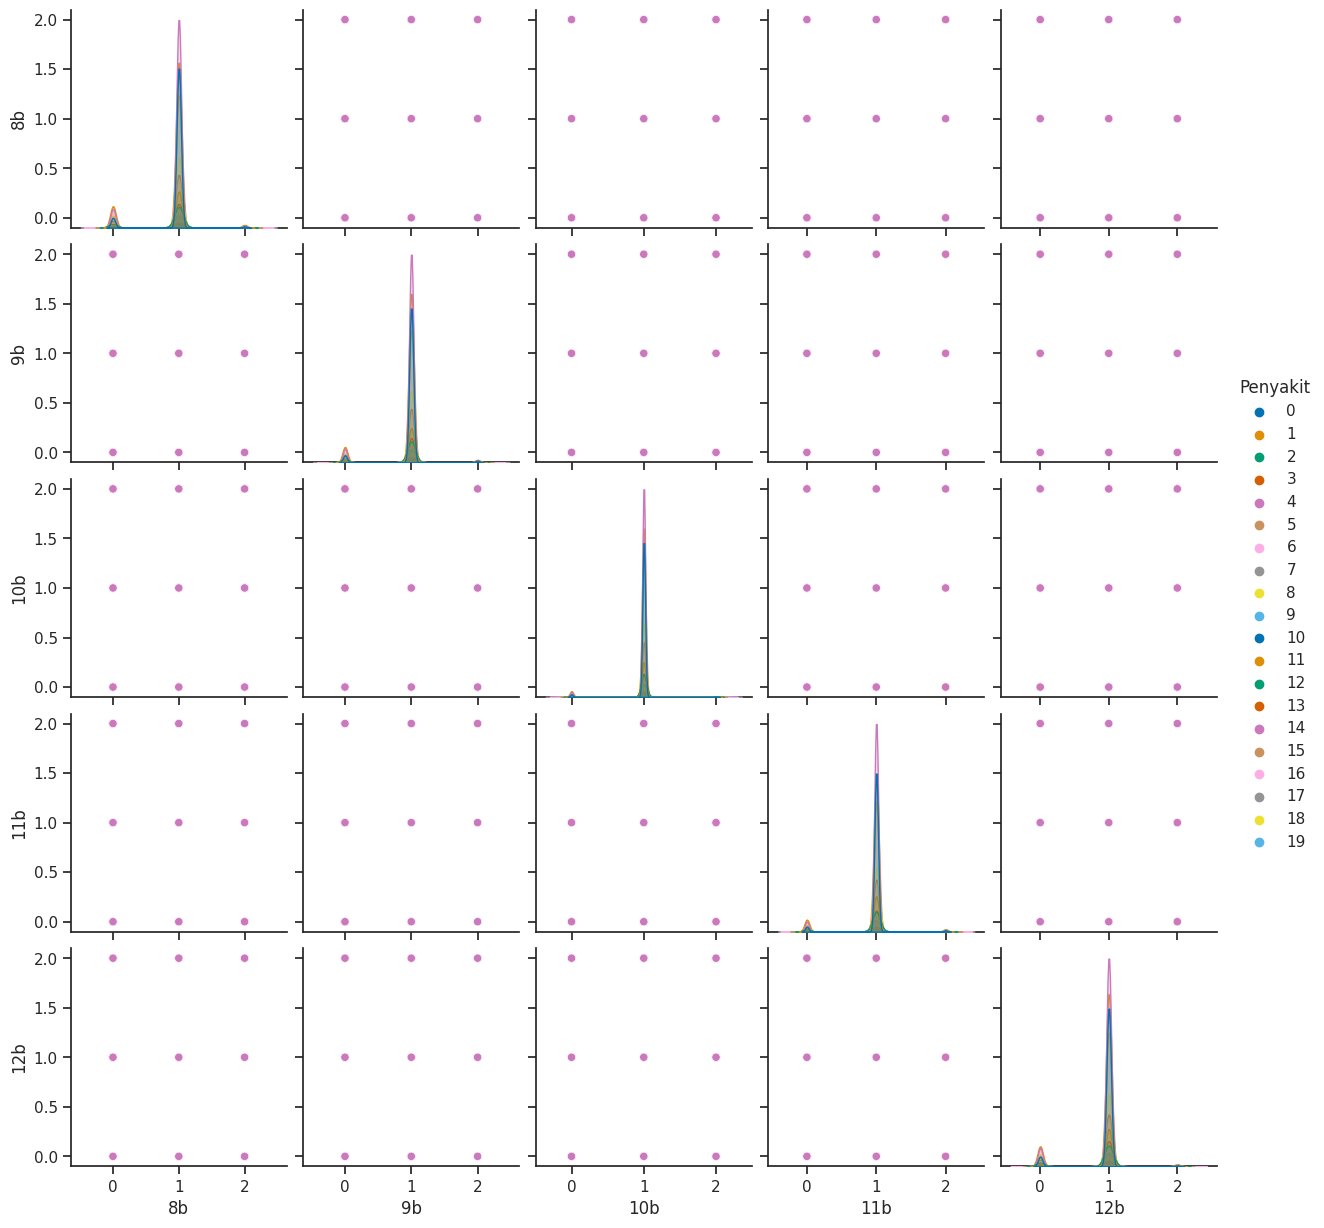

In [ ]:
sns.pairplot(datafin, vars=['8b','9b','10b','11b','12b'],hue='Penyakit',palette='colorblind')
plt.ioff

####kebanyakan responden menjawab tidak untuk 5 pertanyaan tersebut, namun pada pertanyaan 8b, 11b dan 12b ada beberapa responden yang menjawab kadang-kadang dan dari plot yang terlihat responden yang menjawab kadang-kadang berasosiasi dengan diagnosisnya terhadap penyakit DBD,Diabetes, Diare, Hipertensi, Jantung, Lambung dan Thypus: yang juga paling tinggi dari visualisasi disimpulkan bahwa orang dengan kesehatan mental yang terganggu cenderung berasosiasi dengan mengalami penyakit lambung, untuk memastikan hal ini akan dilihat pada analisis klasifikasi dengan naive bayes classifier####

#####penentuan x dan y serta pembagian data menjadi data test dan data train#####

In [ ]:
x =datafin[['8b','9b','10b','11b','12b']].values


In [ ]:
y = datafin['Penyakit'].values

In [ ]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size=0.5,random_state=0)

In [ ]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
accuracy = accuracy_score(ytest, y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)
class_report = classification_report(ytest, y_pred)


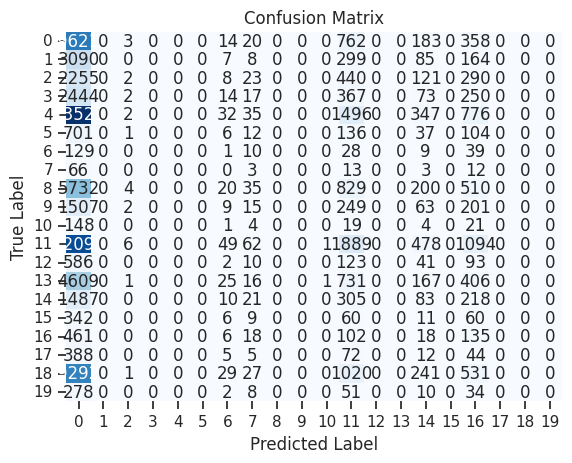

In [ ]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####melalui analisis klasifikasi naive bayes juga diperoleh bahwa orang dengan kesehatan mental kurang stabil cenderung mengalami penyakit Covid-19, Gonore, HIV/AIDS, Lambung,Mikosis dan Stroke. Namun jika dilihat dari nilai prediksi dan nilai sebenarnya, penyakit lambung merupakan hasil prediksi terbanyak yang benar hal ini menandakan bahwa terbukti orang dengan kesehatan mental kurang stabil cenderung lebih berisiko terkena penyakit lambung####

##**BERDASARKAN MAKANAN SEHARI-HARI**##
Dari berbagai pertanyaan yang tersedia ada 5 pertanyaan yang menurut kami representatif terhadap kebiasaan makan seseorang sehar-hari, yakni:
1. pertanyaan '24b' yakni mengenai jumlah air mineral yang dikonsumsi dalam satu hari dengan "0" merepresentasikan 2 liter, "1" merepresentasikan kurang dari 2 liter dan "2" merepresentasikan lebih dari 2 liter.
2. pertanyaan '25b' yakni mengenai frekuensi konsumsi buah dan sayur dalam satu hari dengan "0" merepresentasikan 400 gr/lebih, "1" merepresentasikan tidak pernah dan "2" merepresentasikan kurang dari 400 gr.
3. pertanyaan '30b' yakni mengenai jumlah konsumsi gula dalam satu hari dengan "0" merepresentasikan kurang dari 6 sendok, "1" merepresentasikan lebih dari 6 sendok dan "2" merepesentasikan tidak pernah.
4. pertanyaan '31b' yakni mengenai jumlah konsumsi alkohol dalam satu hari dengan "0" merepresentasikan kurang dari 25 ml, "1" merepresentasikan tidak pernah dan "2" merepresentasikan lebih dari 25 ml.
5. pertanyaan '32b' yakni mengenai jumlah konsumsi junk food atau makanan berminyak dalam satu hari dengan "0" merepresentasikan 1-2 kali/hari, "1" merepresentasikan diatas 2 kali/sehari dan "2" merepresentasikan tidak pernah.


<function matplotlib.pyplot.ioff()>

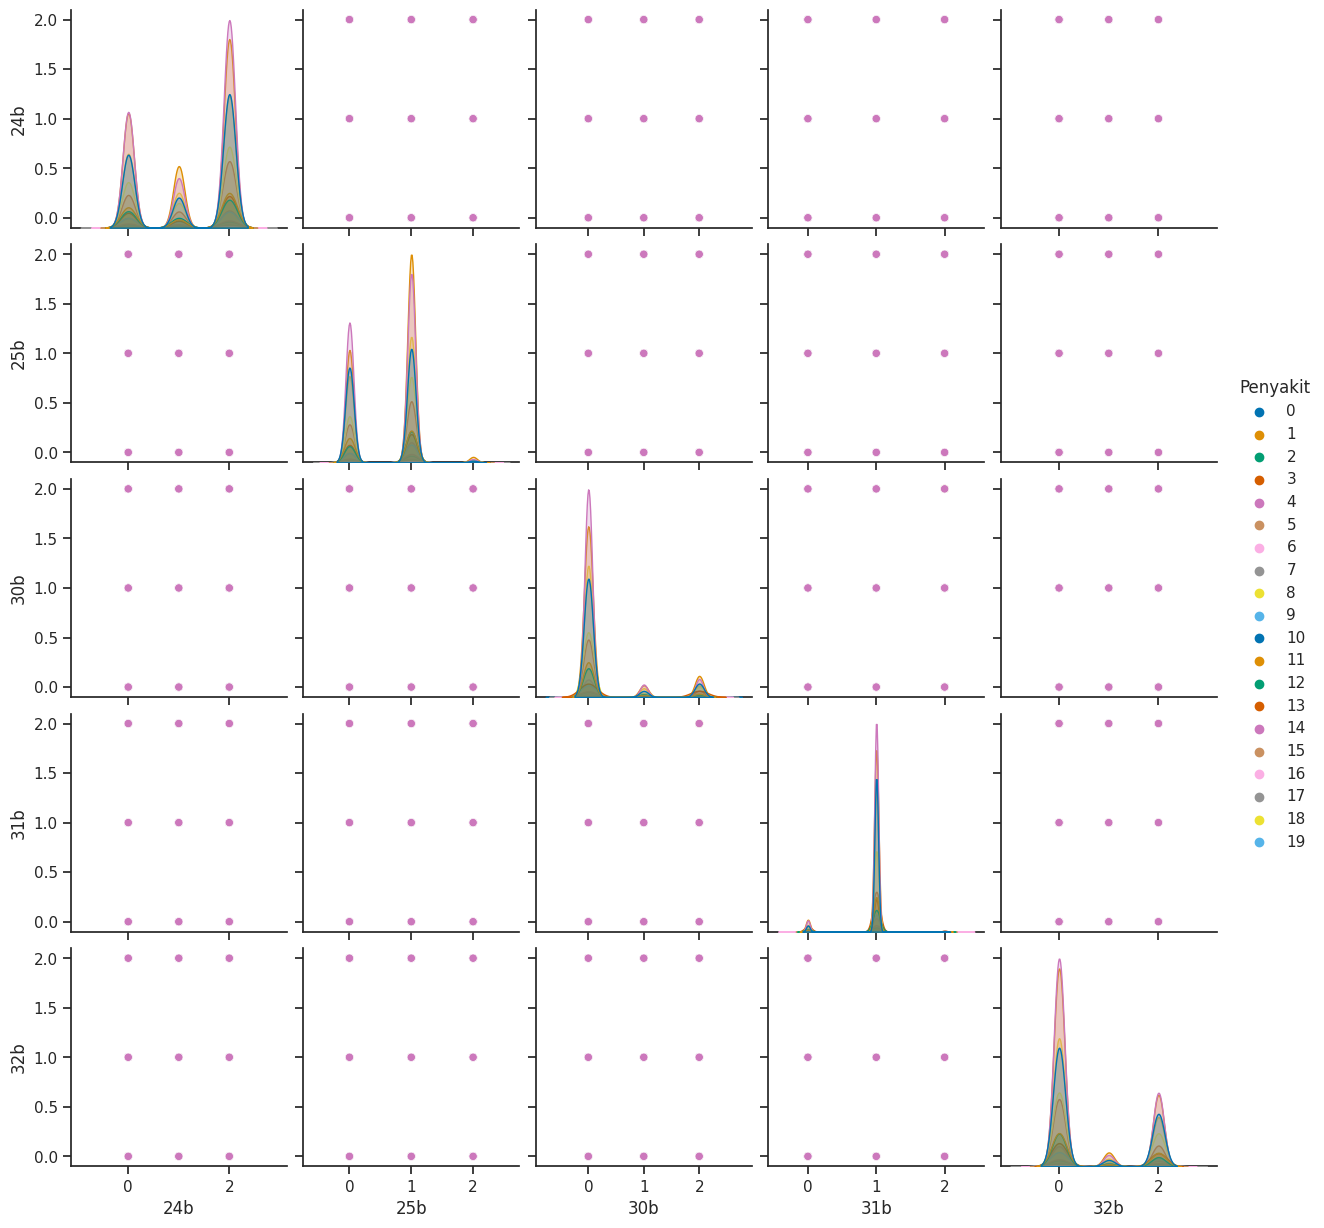

In [ ]:
sns.pairplot(datafin, vars=['24b','25b','30b','31b','32b'],hue='Penyakit',palette='colorblind')
plt.ioff

####dari plot terlihat bahwa orang dengan pola makan tidak sehat yakni pada pertanyaan '24b' menjawab 1, pertanyaan '25b' menjawab 1, pertanyaan '30b' menjawab 1, pertanyaan '31b' menjawab 0 atau 2, dan  pertanyaan '32b' menjawab 1 cenderung lebih rentan terkena penyakit Covid-19, Diabetes,Diare, Hipertensi, dan lambung.

###hal tersebut akan dicek kembali melalui analisis klasifikasi naive bayes###

In [ ]:
x1 =datafin[['24b','25b','30b','31b','32b']].values
x1train,x1test,ytrain,ytest =train_test_split(x1,y, test_size=0.5,random_state=0)

In [ ]:
model = GaussianNB()
model.fit(x1train, ytrain)
y1_pred = model.predict(x1test)

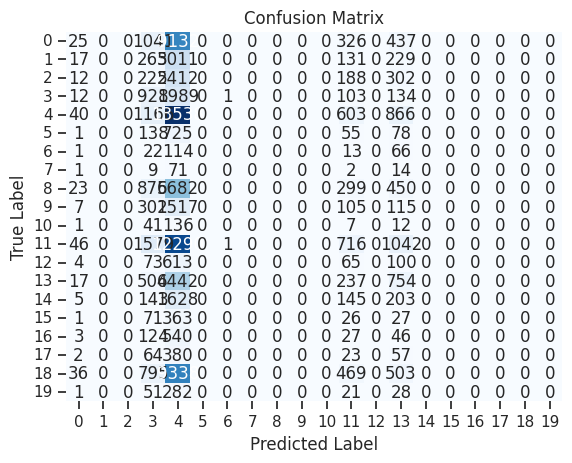

In [ ]:
cm = confusion_matrix(ytest, y1_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####dari analisis klasifikasi naive bayes juga terlihat bahwa orang yang tidak menjaga pola makannya lebih rentan terkena 4 penyakit yakni penyakit 3 (Diabetes), 4(Diare), 11(Lambung) dan 13(Malaria)

##**BERDASARKAN KEBERSIHAN**##
Dari berbagai pertanyaan yang tersedia ada 4 pertanyaan yang menurut kami relevan dan cukup untuk merepresentasikan kebersihan seseorang, yakni:
1. pertanyaan '26b' yakni mengenai intensitas seseorang mandi dalam 1 hari dengan "0" merepresentasikan 1 kali, "1" merepresentasikan 2 kali, "2" merepresentasikan >2 kali dan "3" merepresentasikan tidak pernah.
2. pertanyaan '33b' yakni mengenai intensitas seseorang menggosok gigi dalam satu hari dengan "0" merepresentasikan 1 kali, "1" merepresentasikan 2 kali, "2" merepresentasikan >2 kali dan "3" merepresentasikan tidak pernah.
3. pertanyaan '35b' yakni mengenai intensitas seseorang mengganti pakaian dalam pada 1 hari, dengan "0" merepresentasikan 1 kali, "1" merepresentasikan 2 kali, "2" merepresentasikan >2 kali dan "3" merepresentasikan tidak pernah.
4. pertanyaan '36b' yakni mengenai apakah seseorang mencuci tangan dengan air bersih dan sabun sebelum makan dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan selalu dan "2" merepresentasikan tidak pernah.

<function matplotlib.pyplot.ioff()>

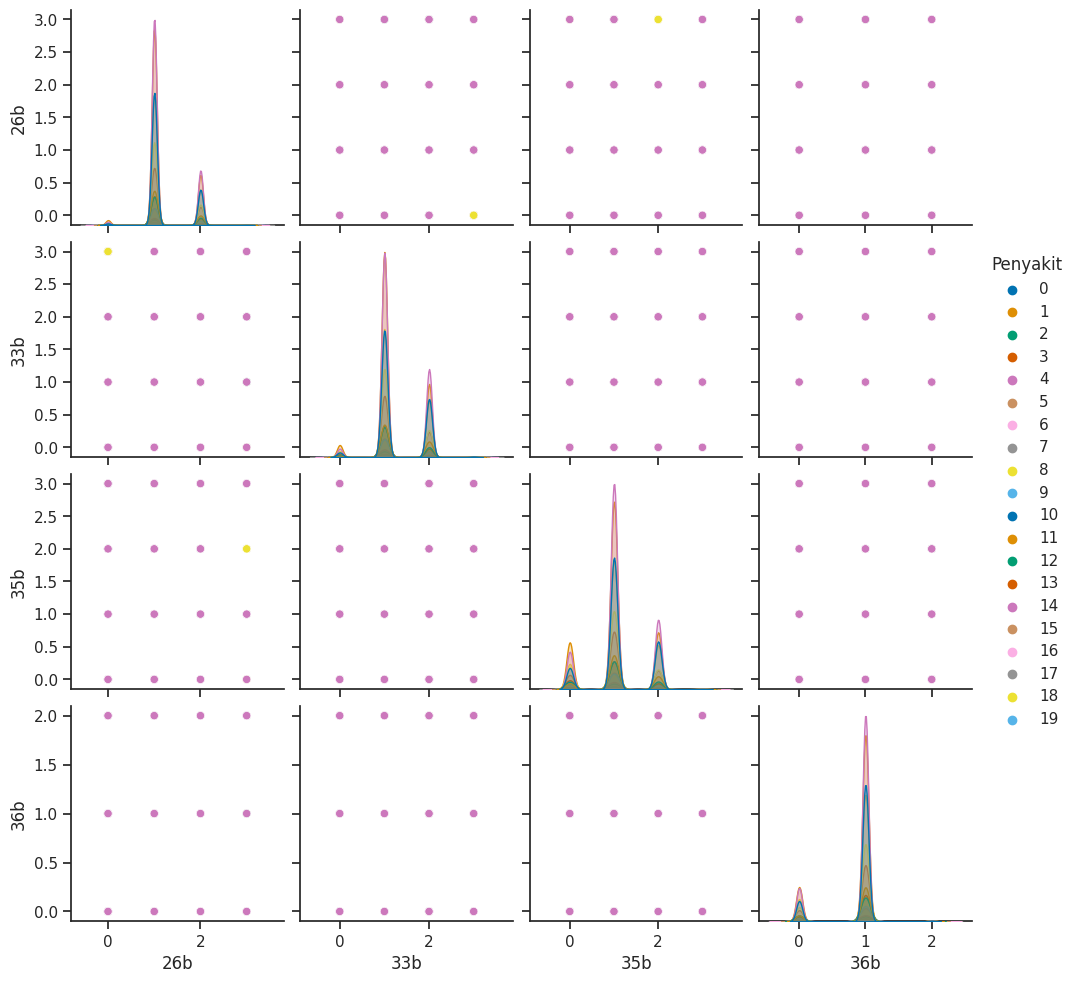

In [ ]:
sns.pairplot(datafin, vars=['26b','33b','35b','36b'],hue='Penyakit',palette='colorblind')
plt.ioff

####dari visualisasi terlihat bahwa orang yang tidak menjaga kebersihan tubuhnya banyak yang menderita atau didiagnosis penyakit Covid-19,Dermatitis, diare,lambung, dan malaria hal tersebut akan dicek kembali kebenarannya melalui analisis klasifikasi naive bayes###

In [ ]:
x2 =datafin[['26b','33b','35b','36b']].values
x2train,x2test,ytrain,ytest =train_test_split(x2,y, test_size=0.5,random_state=0)

In [ ]:
model = GaussianNB()
model.fit(x2train, ytrain)
y2_pred = model.predict(x2test)

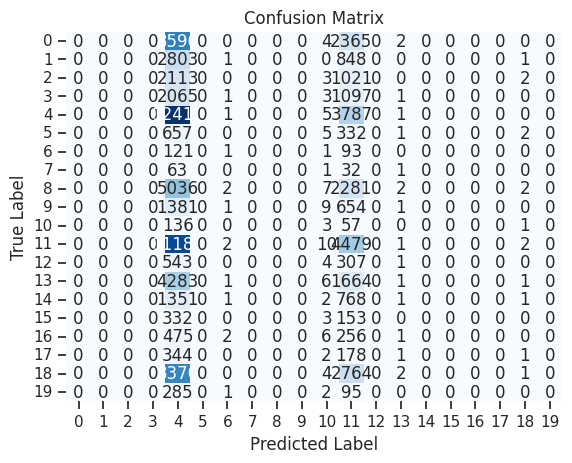

In [ ]:
cm = confusion_matrix(ytest, y2_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####Berdasarkan hasil prediksi model naive bayes, diperoleh bahwa orang yang tidak menjaga kebersihan sering terkena penyakit lambung dan diare

##**BERDASARKAN KONDISI LINGKUNGAN**##
Dari berbagai pertanyaan yang tersedia terdapat 5 pertanyaan yang menurut kami relevan dan cukup untuk memberi gambaran mengenai kondisi lingkungan tempat tinggal seseorang, yakni:
1. pertanyaan '37b' yakni mengenai kondisi sirkulasi tempat tinggal dengan "0" merepresentasikan terdapat kurang dari 1 sirkulasi udara, "1" merepresentasikan terdapat lebih dari 1 sirkulasi udara dan "2" merepresentasikan tidak terdapat sirkulasi udara.
2. pertanyaan '38b' yakni mengenai kontaminasi polusi udara ke tempat tinggal dengan "0" merepresentasikan tidak terkontaminasi, "1" merepresentasikan tidak mengetahui dan "2" merepresentasikan terkontaminasi.
3. pertanyaan '43b' yakni mengenai keberadaan tempat sampah di dekat tempat tinggal dengan "0" merepresentasikan ada dan terbuka , "1" merepresentasikan ada dan tertutup dan "2" merepresentasikan tidak ada.
4. pertanyaan '41b' yakni mengenai kondisi sanitasi rumah tangga dengan "0" merepresentasikan kurang dari 12 meter, "1" merepresentasikan lebih dari 12 meter dan "2" merepresentasikan tidak memiliki jamban sehat.
5. pertanyaan '44b' yakni mengenai jarak tempat sampah dari tempat tinggal dengan "0" merepresentasikan kurang dari 10 meter, "1" merepresentasikan lebih dari 10 meter dan "2" merepresentasikan tidak ada.

<function matplotlib.pyplot.ioff()>

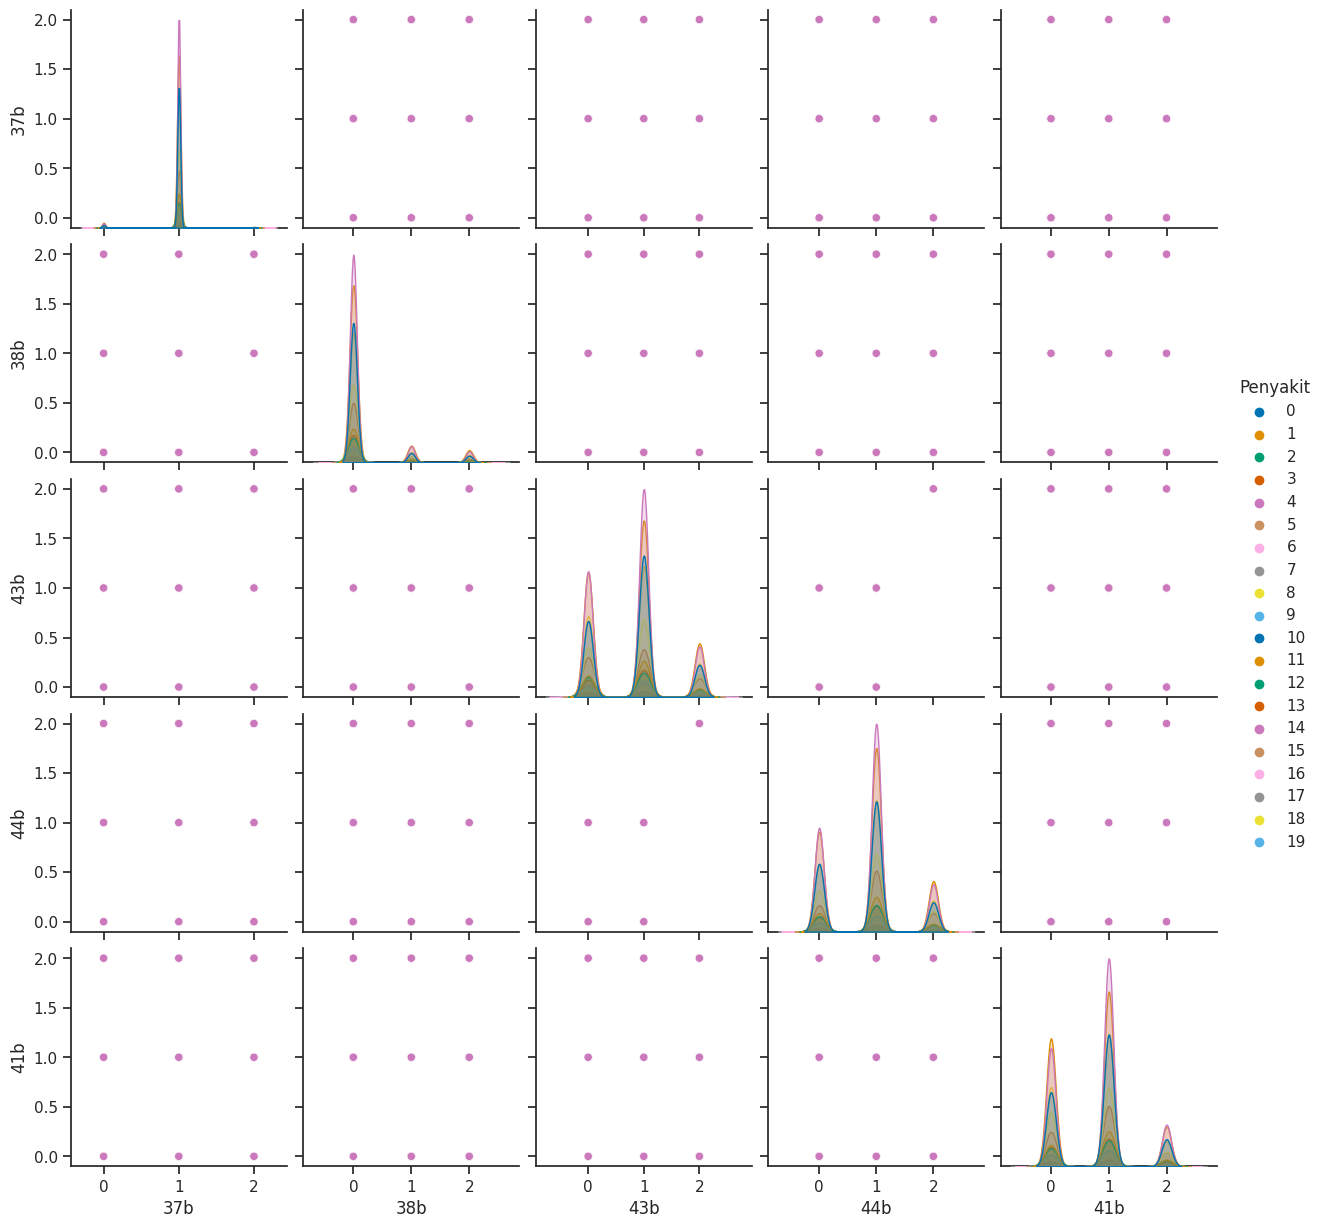

In [ ]:
sns.pairplot(datafin, vars=['37b','38b','43b','44b','41b'],hue='Penyakit',palette='colorblind')
plt.ioff

####Berdasarkan plot diatas, terlihat bahwa orang dengan kondisi lingkungan kurang bersih dari segi sanitasi, tempat sampah hingga kontaminasi, sering didiagnosis penyakit DBD, Dermatitis, Diabetes, Hipertensi dan Malaria.

In [ ]:
x3 =datafin[['37b','38b','43b','44b','41b']].values
x3train,x3test,ytrain,ytest =train_test_split(x3,y, test_size=0.5,random_state=0)

In [ ]:
model = GaussianNB()
model.fit(x3train, ytrain)
y3_pred = model.predict(x3test)

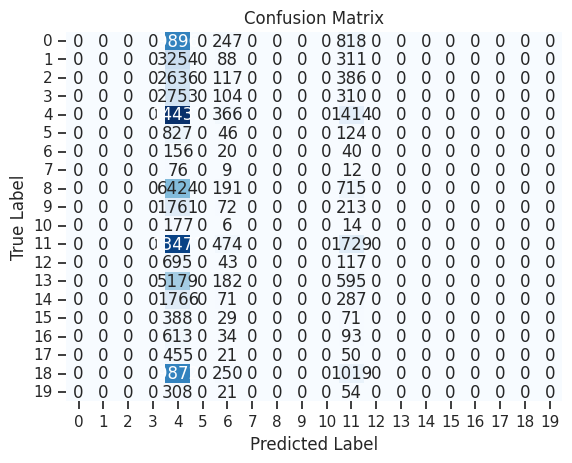

In [ ]:
cm = confusion_matrix(ytest, y3_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####Berdasarkan hasil prediksi dengan model naive bayes, orang dengan kondisi lingkungan kurang bersih sering didiagnosis penyakit Diare,Gonore, dan Lambung.

##**BERDASARKAN GAYA HIDUP**##
Terdapat dua dari 48 pertanyaan yang menurut kami berkorelasi dengan gaya hidup, yakni:
1. pertanyaan '23b' yakni mengenai intensitas seseorang berolahraga dalam satu hari dengan "0" berarti 4 kali atau lebih dalam satu minggu, "1" artinya lebih dari 4 kali dalam satu minggu dan "2" artinya tidak pernah.
2. pertanyaan '28b' yakni mengenai apakah seseorang merokok atau tidak dengan "0" berarti tidak dan "1" berarti iya.

<function matplotlib.pyplot.ioff()>

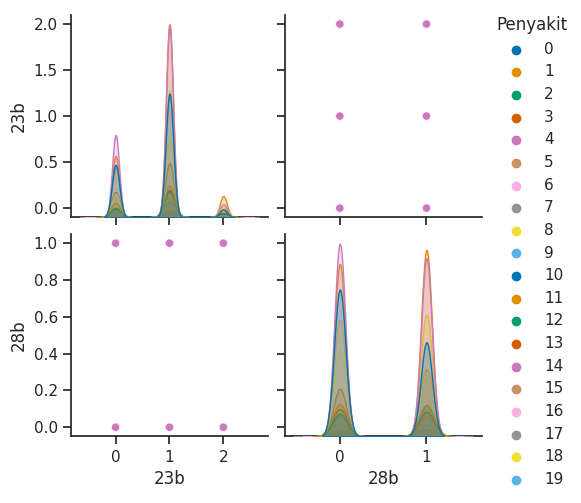

In [ ]:
sns.pairplot(datafin, vars=['23b','28b'],hue='Penyakit',palette='colorblind')
plt.ioff

####Dari plot diatas, diperoleh informasi bahwa orang yang jarang atau tidak pernah olahraga dan juga merokok banyak paling terkena penyakit DBD, jantung,Diabetes stroke, dan lambung

In [ ]:
x4 =datafin[['23b','28b']].values
x4train,x4test,ytrain,ytest =train_test_split(x4,y, test_size=0.5,random_state=0)

In [ ]:
model = GaussianNB()
model.fit(x4train, ytrain)
y4_pred = model.predict(x4test)

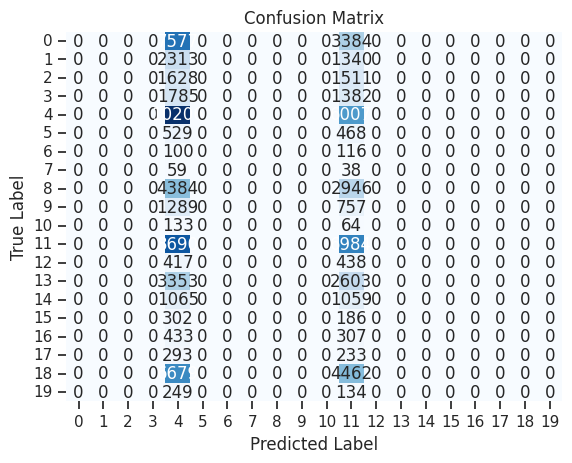

In [ ]:
cm = confusion_matrix(ytest, y4_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####Namun jika menggunakan analisis klasifikasi, berdasarkan kedua variabel terebut, orang yang memiliki pola hidup sehat banyak terkena penyakit diare dan juga lambung

##**BERDASARKAN KONDISI TUBUH**##
terdapat enam pertanyaan yang menurut kami cukup untuk menggambarkan kondisi dan keluhan tubuh terkini dari seseorang, yakni:
1. pertanyaan '1b' yakni mengenai apakah seseorang sering menderita sakit kepala dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan Tidak dan "2" merepresentasikan Ya
2. pertanyaan '2b' yakni mengenai apakah seseoang nafsu makan atau tidak dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan Tidak dan "2" merepresentasikan Ya
3. pertanyaan '6b', yakni mengenai apakah tangan gemetar atau tidak dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan Tidak dan "2" merepresentasikan Ya
4. pertanyaan '7b', yakni mengenai apakah pencernaan seseorang terganggu atau buruk dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan Tidak dan "2" merepresentasikan Ya
5. pertanyaan '19b', yakni mengenai perasaan tidak enak di perut seseorang dengan "0" merepresentasikan kadang-kadang, "1" merepresentasikan Tidak dan "2" merepresentasikan Ya
6. pertanyaan '20b' yakni mengenai kondisi fisik yang mudah lelah atau tidak dengan "0" artinya tidak dan "1" artinya ya.

<function matplotlib.pyplot.ioff()>

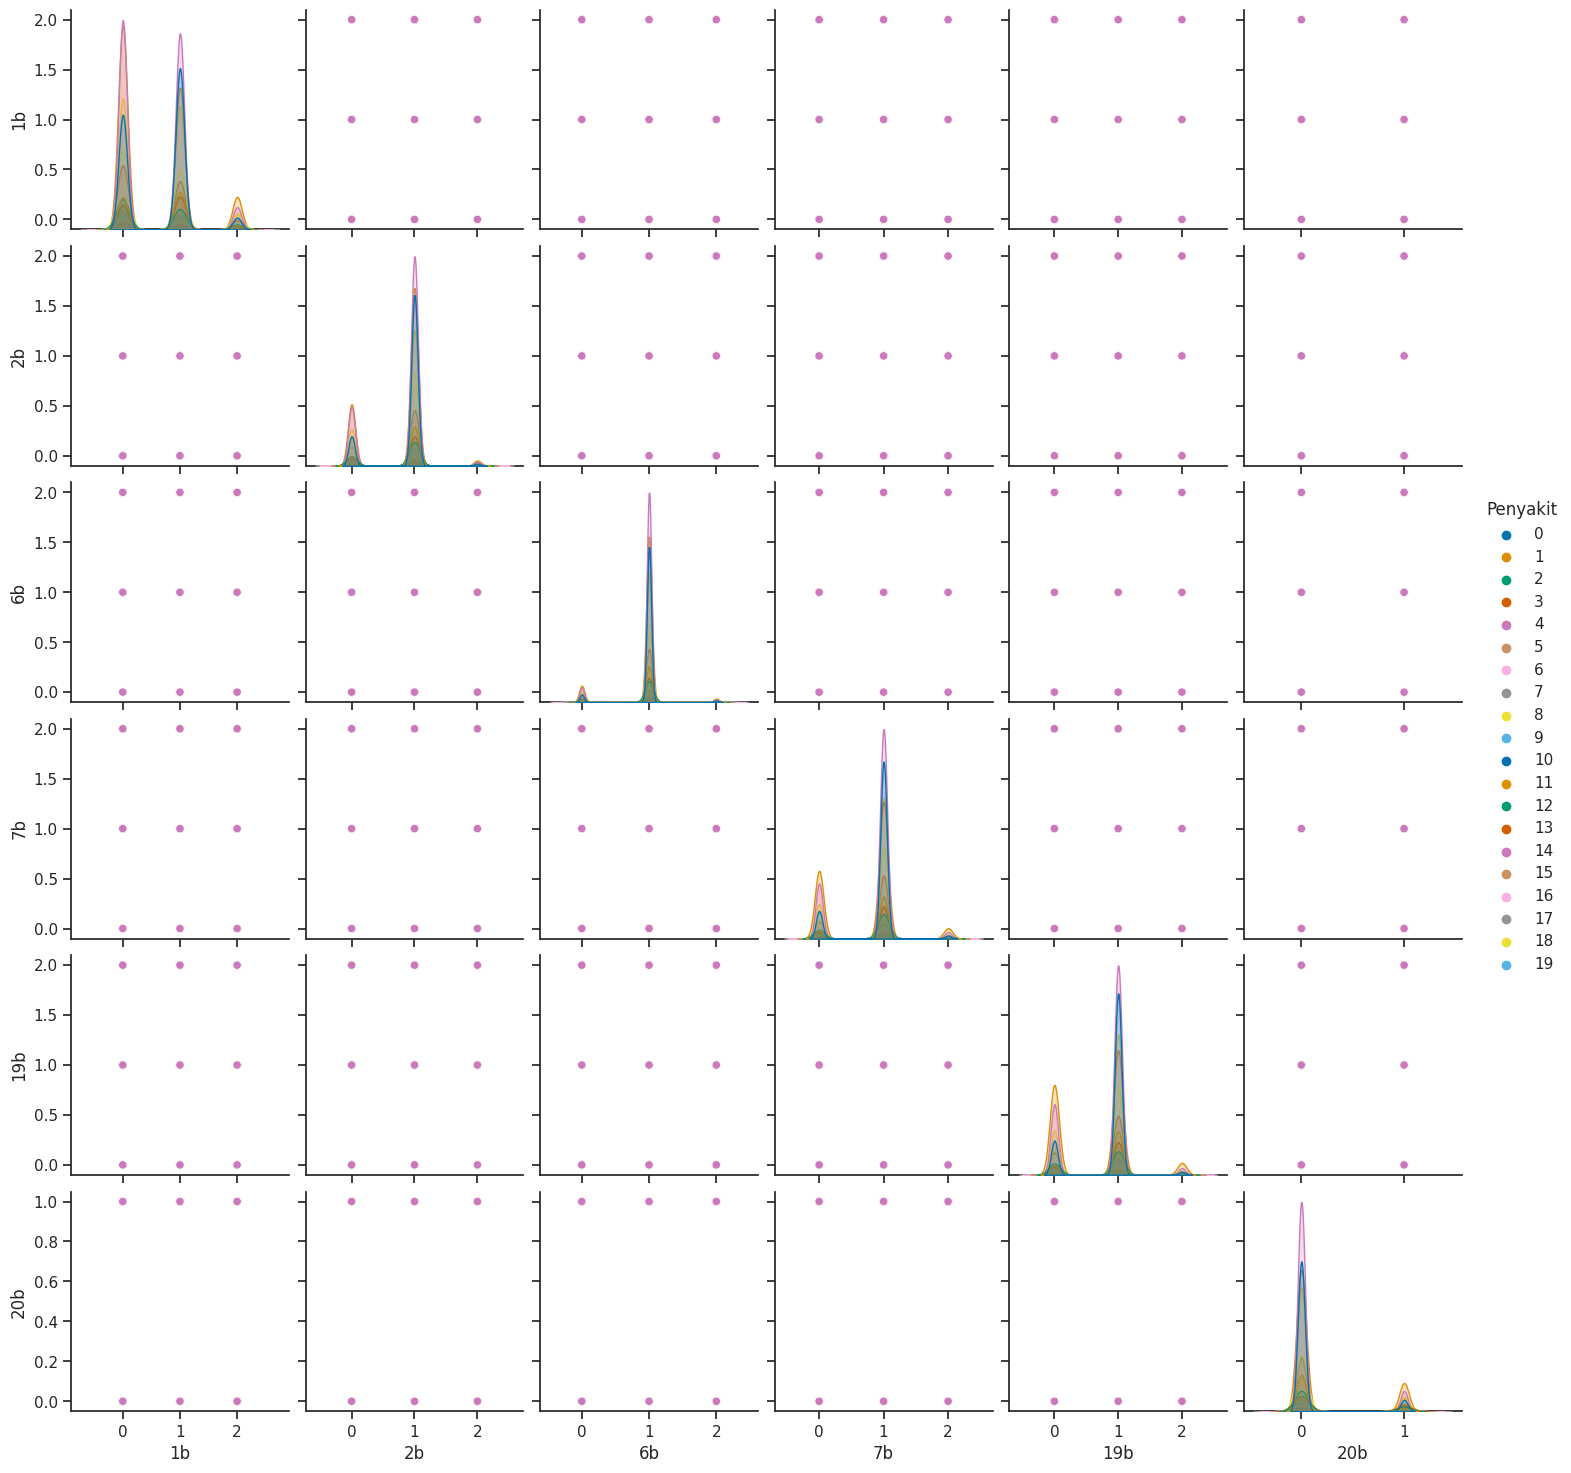

In [ ]:
sns.pairplot(datafin, vars=['1b','2b','6b','7b','19b','20b'],hue='Penyakit',palette='colorblind')
plt.ioff

####dari plot diatas, diperoleh bahwa orang yang terkadang atau sering mengalami keenam keluhan tersebut didiagnosis Covid-19, DBD, Diare, Hipertensi, Malaria dan Thypus.

In [ ]:
x5 =datafin[['1b','2b','6b','7b','19b','20b']].values
x5train,x5test,ytrain,ytest =train_test_split(x5,y, test_size=0.5,random_state=0)

In [ ]:
model = GaussianNB()
model.fit(x5train, ytrain)
y5_pred = model.predict(x5test)

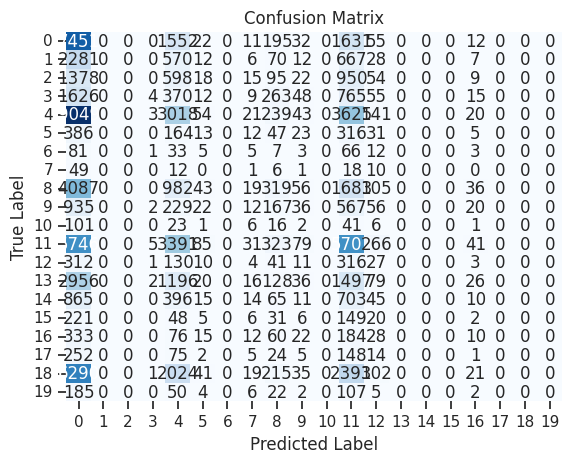

In [ ]:
cm = confusion_matrix(ytest, y5_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####Berdasarkan pemodelan dengan naive bayes, diperoleh bahwa orang-orang dengan kondisi dan keluhan tersebut sering di diagnosis Covid-19, Diare, Ginjal, HIV, Hipertensi, jantung, dan liver.

##***Kesimpulan akhir***###
Terdapat banyak sekali faktor dari diagnosis penyakit seseorang, namun dari berbagai analisis yang telah dilakukan terlihat bahwa pikiran yang stres merupakan faktor dari berbagai macam penyakit hingga yang paling mematikan sekalipun, selain itu faktor makanan juga menjadi faktor yang menyebabkan diagnosis penyakit yang berbahaya

# Intro Insight

Insight yang akan dicari dalam hal ini adalah dengan melihat penyakit terbanyak dijawab oleh responden an mencari hal-hal yang berkaitan dengan penyakit tersebut. Berikut plot dari kategori "diagnosa penyakit"

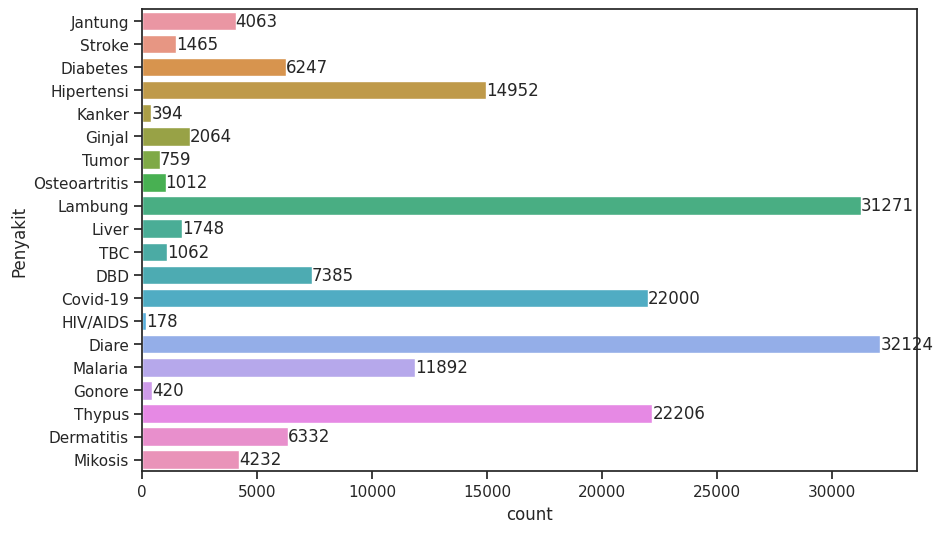

In [ ]:
plt.figure(figsize=(10,6))

sertif = sns.countplot(y='Penyakit', data=df_combined)
for label in sertif.containers:
  sertif.bar_label (label)
plt.show()

# Insight 1 -  Penyakit Diare

Diare merupakan salah satu masalah pencernaan yang ditandai buang air lebih sering dari biasanya dengan kandungan cairan berlebih. Kondisi ini terjadi ketika terdapat masalah penyerapan air dalam proses pencernaan. Diare dapat disebabkan oleh infeksi virus/bakteri/parasit melalui makanan yang terkontaminasi, kebersihan/hygiene pribadi maupun lingkungan, dampak dari kondisi medis, dll.

Insight mengenai penyakit diare akan ditinjau berdasarkan pertanyaan-pertanyaan dalam kuesioner lalu dipilih faktor mana saja yang sekiranya akan memengaruhi. Faktor-faktor tersebut dibagi menjadi dua kategori, yaitu gejala dan gaya hidup.

Kategori "Gejala" yang terdiri dari indikator-indikator berikut:
sakit kepala

* nafsu makan
* sulit tidur
* pencernaan terganggu
* perut merasa tidak enak
* mudah lelah
* penyakit gigi dan mulut


Kategori "Gaya Hidup" yang terdiri dari indikator-indikator berikut:
* frekuensi olahraga
* konsumsi air mineral
* konsumsi buah dan sayur
* merokok
* cuci tangan sebelum makan
* sumber air bersih di tempat tinggal
* sumber air minum
* jarak jamban dengan sumur tempat tinggal
* sanitasi tempat tinggal

In [ ]:
df_insight2=df.copy()

In [ ]:
df_insight2['15a'].unique()

array(['Ya', 'Tidak'], dtype=object)

In [ ]:
df_insight2=df_insight2.where(df_insight2['15a'] == "Ya")

In [ ]:
df_insight2.dropna(inplace = True)

## **Gejala**

[Text(0.5, 1.0, 'Keluhan sering merasakan sakit kepala')]

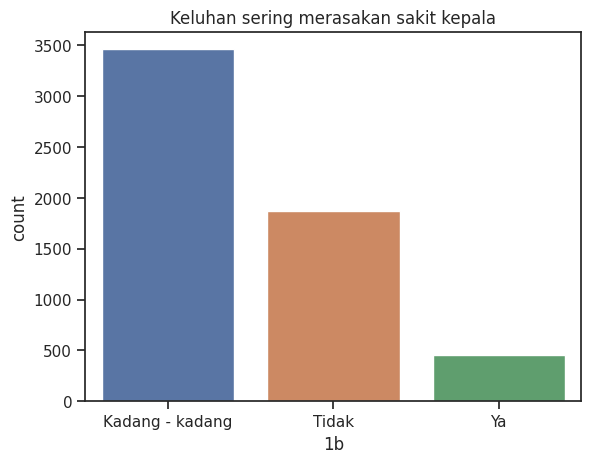

In [ ]:
sns.countplot(x="1b", data=df_insight2).set(title='Keluhan sering merasakan sakit kepala')

Terlihat bahwa mayoritas penderita diare mengeluh terkadang sakit kepala. Sehingga diasumsikan sakit kepala menjadi salah satu gejala yang sering dialami oleh penderita diare. Hal ini disebabkan karena diare dapat menyebabkan dehidrasi, stres, dan kecemasan yang dapat memicu sakit kepala.

[Text(0.5, 1.0, 'Tidak Nafsu Makan')]

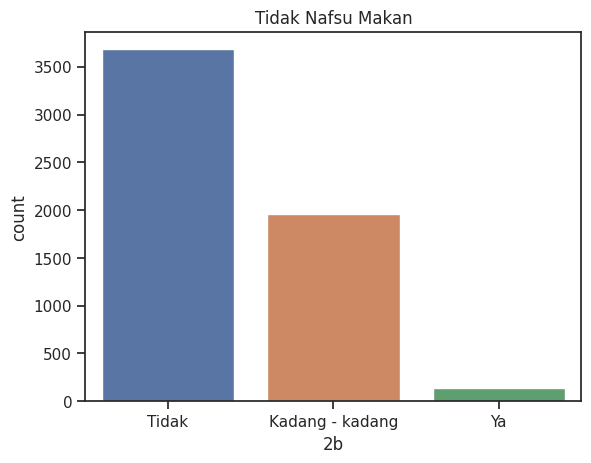

In [ ]:
sns.countplot(x="2b", data=df_insight2).set(title='Tidak Nafsu Makan')

Terlihat bahwa mayoritas penderita diare tidak mengalami hilang nafsu makan. Sehingga diasumsikan nafsu makan tidak terpengaruh oleh penyakit diare.

[Text(0.5, 1.0, 'Sulit tidur')]

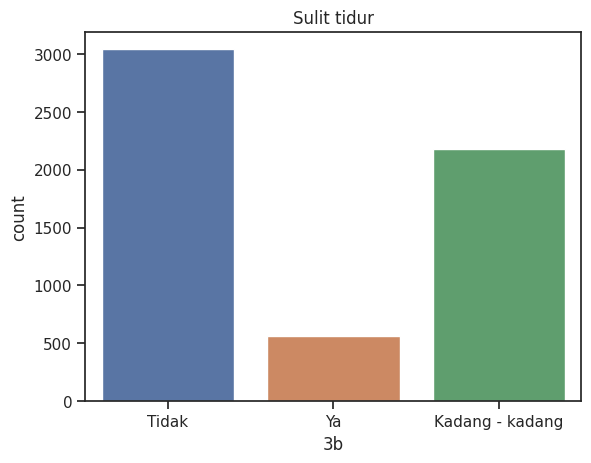

In [ ]:
sns.countplot(x="3b", data=df_insight2).set(title='Sulit tidur')

Terlihat bahwa mayoritas penderita diare tidak mengalami sulit tidur. Sehingga diasumsikan tidur tidak terpengaruh oleh penyakit diare.  

[Text(0.5, 1.0, 'Pencernaan Terganggu')]

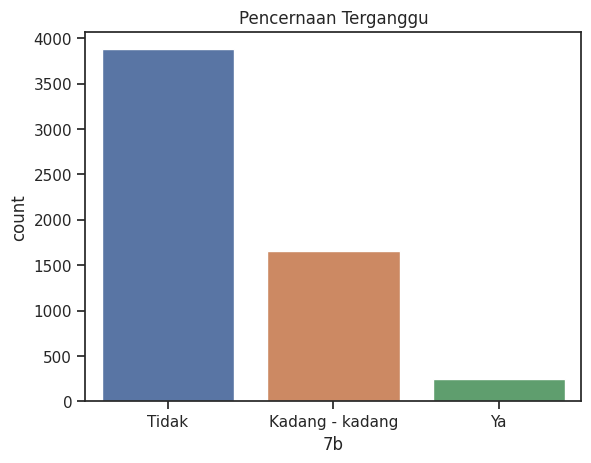

In [ ]:
sns.countplot(x="7b", data=df_insight2).set(title='Pencernaan Terganggu')

Terlihat bahwa mayoritas penderita diare ternyata tidak merasa pencernaan terganggu. Namun tidak sedikit juga penderita yang merasa pencernaan mereka terkadang terganggu, di mana hal ini lebih sesuai dengan fakta bahwa diare memang merupakan masalah pencernaan.

[Text(0.5, 1.0, 'Perut merasa tidak enak')]

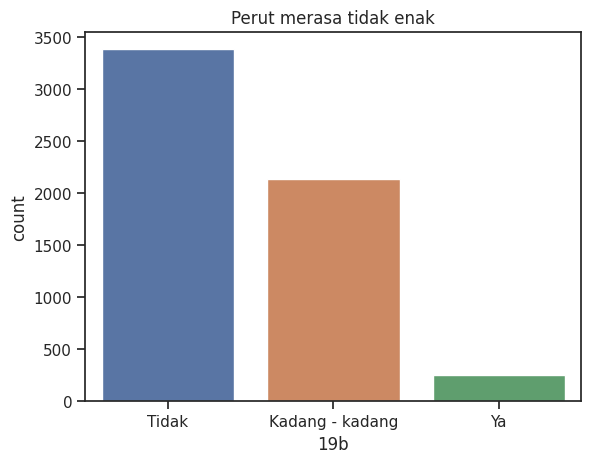

In [ ]:
sns.countplot(x="19b", data=df_insight2).set(title='Perut merasa tidak enak')

Terlihat bahwa mayoritas penderita diare ternyata tidak mengalami perut terasa tidak enak. Namun tidak sedikit juga penderita yang merasa perutnya terkadang tidak enak, di mana hal ini lebih sesuai dengan fakta bahwa diare memang menyebabkan rasa nyeri bahkan kram pada perut.

[Text(0.5, 1.0, 'Mudah lelah')]

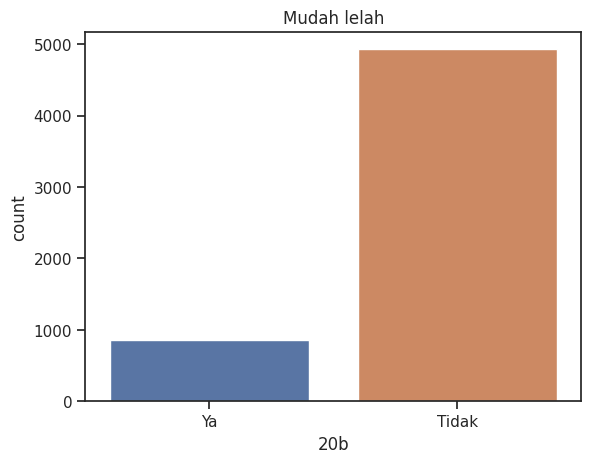

In [ ]:
sns.countplot(x="20b", data=df_insight2).set(title='Mudah lelah')

Terlihat bahwa mayoritas penderita diare ternyata tidak merasa mudah lelah. Berdasarkan teori, karena kekurangan nutrisi dan dehidrasi, penderita diare juga bisa mengalami mudah lelah. Namun ternyata fakta pada data lapangan tidak selalu demikian.

[Text(0.5, 1.0, 'Penyakit gigi dan mulut?')]

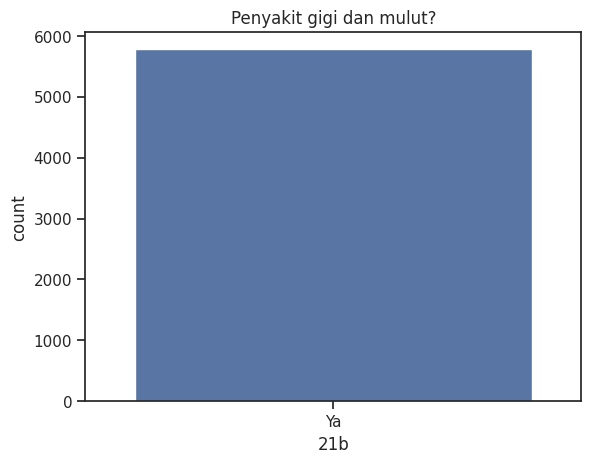

In [ ]:
sns.countplot(x="21b", data=df_insight2).set(title='Penyakit gigi dan mulut?')

Terlihat bahwa 100% penderita diare ternyata juga mengalami penyakit gigi dan mulut. Hal ini bisa dijelaskan karena infeksi bakteri yang menyebabkan penyakit gigi/mulut dapat memengaruhi keseimbangan bakteri dalam tubuh secara keseluruhan, salah satunya dalam pencernaan, sehingga pada akhirnya dapat mengganggu fungsi sistem pencernaan.

In [ ]:
pip install association-metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3929 sha256=60f05db5f828197afb9d2e81c772cc7469cd8828219caa7da6ad5724571f3641
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association-metrics


In [ ]:
#Akan dicari asosiasi antara variabel faktor-faktor 'Gejala' di atas dengan variabel penyakit diare
df_test = df.copy()
# Import association_metrics

df_gejala = df_test[["15a", "1b", "2b", "3b", "7b", "19b", "20b", "21b"]]


import association_metrics as am
# Convert you str columns to Category columns
df_gejala = df_gejala.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df_gejala)
# will return a pairwise matrix filled with Cramer's V, where columns and index are
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

15a        1b        2b        3b        7b       19b       20b  \
15a  1.000000  0.149063  0.116000  0.097890  0.156339  0.152129  0.061713   
1b   0.149063  1.000000  0.273196  0.288611  0.215267  0.259742  0.263387   
2b   0.116000  0.273196  1.000000  0.332841  0.221542  0.245080  0.234300   
3b   0.097890  0.288611  0.332841  1.000000  0.230214  0.252265  0.293451   
7b   0.156339  0.215267  0.221542  0.230214  1.000000  0.445654  0.268299   
19b  0.152129  0.259742  0.245080  0.252265  0.445654  1.000000  0.319712   
20b  0.061713  0.263387  0.234300  0.293451  0.268299  0.319712  1.000000   
21b  0.126488  0.239768  0.173564  0.218346  0.181326  0.230790  0.159106   

          21b  
15a  0.126488  
1b   0.239768  
2b   0.173564  
3b   0.218346  
7b   0.181326  
19b  0.230790  
20b  0.159106  
21b  1.000000

###Interpretasi
Berdasarkan nilai korelasi dari yang terbesar, didapat indikator gejala yang paling sering diasosiasikan dengan penyakit diare adalah pencernaan yang terganggu, perut merasa tidak enak, sakit kepala, dan seterusnya.  

## **Gaya Hidup**

(array([0, 1, 2]),
 [Text(0, 0, 'Kurang dari 4 kali dalam seminggu'),
  Text(1, 0, '4 kali atau lebih dalam seminggu'),
  Text(2, 0, 'Tidak pernah')])

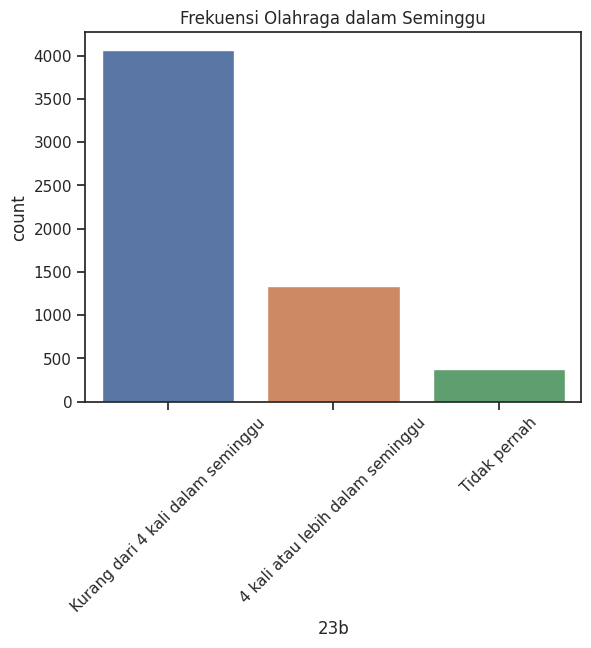

In [ ]:
sns.countplot(x="23b", data=df_insight2).set(title='Frekuensi Olahraga dalam Seminggu')
plt.xticks(rotation=45)

Terlihat bahwa mayoritas penderita diare olahraga kurang dari 4x dalam seminggu. Pada dasarnya, olahraga dapat meningkatkan daya tahan tubuh. Sehingga ketika tubuh mengonsumsi makanan yang terkontaminasi, tidak mudah terkena penyakit diare.

(array([0, 1, 2]),
 [Text(0, 0, 'Lebih dari 2 liter'),
  Text(1, 0, '2 Liter'),
  Text(2, 0, 'Kurang dari 2 Liter')])

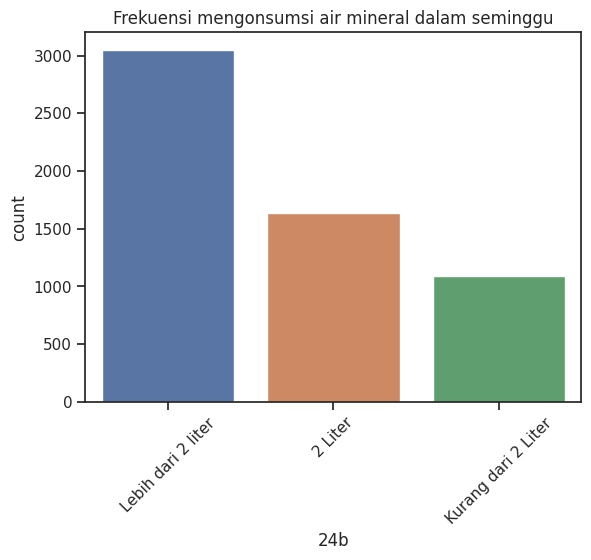

In [ ]:
sns.countplot(x="24b", data=df_insight2).set(title='Frekuensi mengonsumsi air mineral dalam seminggu')
plt.xticks(rotation=45)

Terlihat bahwa mayoritas penderita diare mengonsumsi lebih dari dua liter air dalam seminggu. Hal ini berarti memang terdapat masalah dalam penyerapan air dalam pencernaan yang mengakibatkan penderita mengalami diare.

(array([0, 1, 2]),
 [Text(0, 0, '400gr/lebih'),
  Text(1, 0, 'Kurang dari 400gr'),
  Text(2, 0, 'Tidak pernah')])

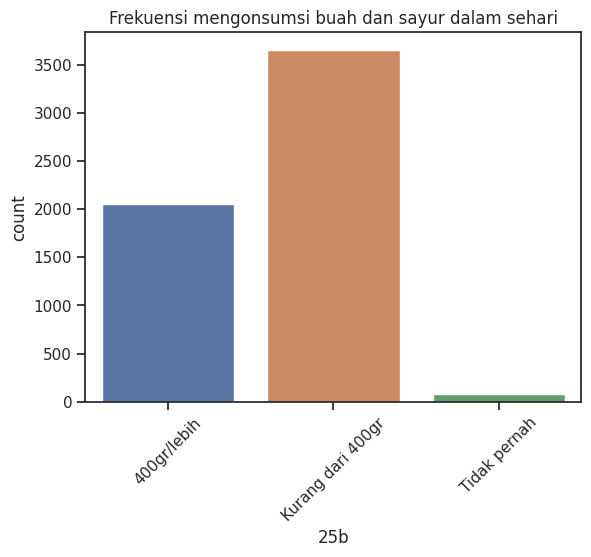

In [ ]:
sns.countplot(x="25b", data=df_insight2).set(title='Frekuensi mengonsumsi buah dan sayur dalam sehari')
plt.xticks(rotation=45)

Terlihat bahwa mayoritas penderita diare mengonsumsi kurang dari 400 gr buah dan sayur dalam sehari. Pada dasarnya, kandungan buah dan sayur memang mendukung fungsi pencernaan. Akan tetapi terdapat beberapa kasus di mana konsumsi buah dan sayur malah memicu diare bagi orang yang memiliki sensitivitas terhadap jenis serat tertentu. Kemungkinan hal ini lah yang terjadi pada para penderita diare.

[Text(0.5, 1.0, 'Merokok')]

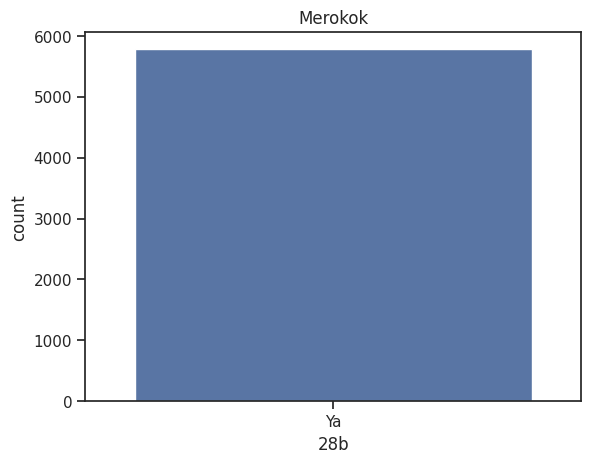

In [ ]:
sns.countplot(x="28b", data=df_insight2).set(title='Merokok')

Terlihat bahwa 100% dari penderita diare juga merokok. Hal ini dapat dijelaskan karena merokok dapat mengiritasi saluran pencernaan bagi orang yang memiliki sensitivitas terhadap zat kimia yang terkandung dalam rokok. Kemungkinan hal ini lah yang terjadi pada para penderita diare.

(array([0, 1, 2]),
 [Text(0, 0, 'Selalu'),
  Text(1, 0, 'Kadang - kadang'),
  Text(2, 0, 'Tidak/Jarang sekali')])

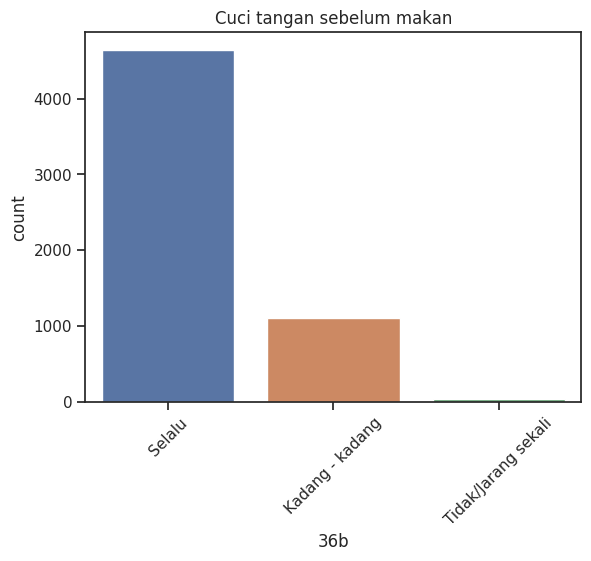

In [ ]:
sns.countplot(x="36b", data=df_insight2).set(title='Cuci tangan sebelum makan')
plt.xticks(rotation=45)

Terlihat bahwa mayoritas penderita diare selalu mencuci tangan sebelum makanan. Sehingga diasumsikan diare yang dialami bukan disebabkan karena kurangnya hygiene individu, melainkan karena faktor lain.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Sumur/Kali'),
  Text(1, 0, 'Air PAM'),
  Text(2, 0, 'Tidak ada'),
  Text(3, 0, 'Tadah hujan')])

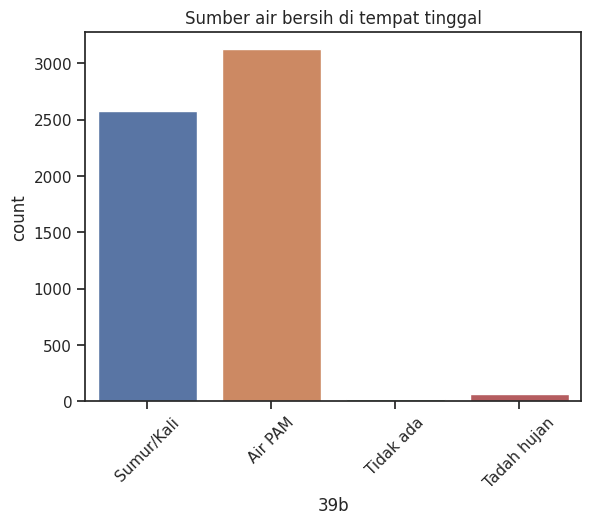

In [ ]:
sns.countplot(x="39b", data=df_insight2).set(title='Sumber air bersih di tempat tinggal')
plt.xticks(rotation=45)

Terlihat bahwa banyak penderita diare memiliki sumber air bersih dari PAM, namun dalam jumlah yang tidak jauh berbeda, terdapat juga yang bersumber dari sumur/kali. Sehingga tidak bisa dikatakan sumber air bersih dalam kasus ini menjadi penyebab penyakit diare.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Air sumur'),
  Text(1, 0, 'Air mineral isi ulang'),
  Text(2, 0, 'Air mineral kemasan'),
  Text(3, 0, 'Air PAM'),
  Text(4, 0, 'Tadah hujan')])

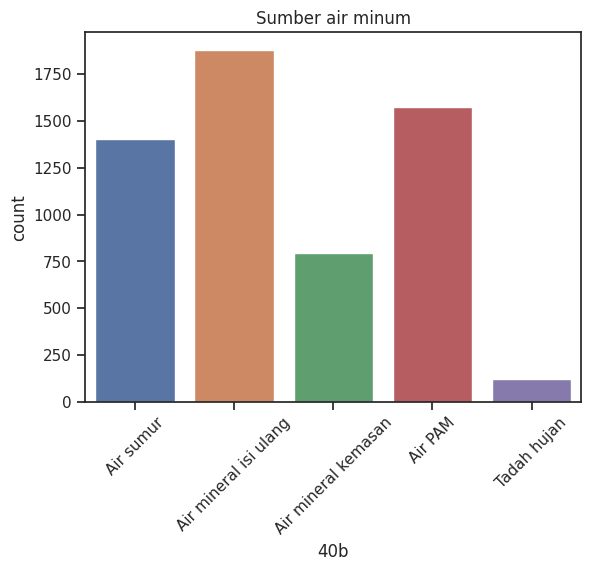

In [ ]:
sns.countplot(x="40b", data=df_insight2).set(title='Sumber air minum')
plt.xticks(rotation=45)

Terlihat bahwa banyak penderita diare memiliki sumber air minum yaitu air isi ulang, PAM, dan sumur. Sehingga tidak bisa dikatakan sumber air minum dalam kasus ini menjadi penyebab penyakit diare.

(array([0, 1, 2]),
 [Text(0, 0, 'Lebih dari 12 meter'),
  Text(1, 0, 'Tidak memiliki jamban sehat'),
  Text(2, 0, 'Kurang dari 12 meter')])

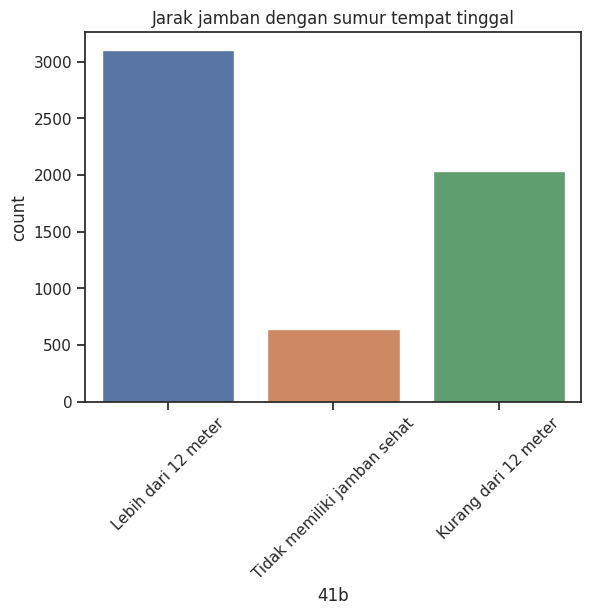

In [ ]:
sns.countplot(x="41b", data=df_insight2).set(title='Jarak jamban dengan sumur tempat tinggal')
plt.xticks(rotation=45)

Terlihat bahwa mayoritas tempat tinggal penderita diare sudah berjarak lebih dari 12 meter dari jamban. Sehingga tidak bisa dikatakan diare yang dialami disebabkan karena kontaminasi makanan oleh bakteri dari jamban.


(array([0, 1, 2]),
 [Text(0, 0, 'Ada'), Text(1, 0, 'Tidak tahu'), Text(2, 0, 'Tidak ada')])

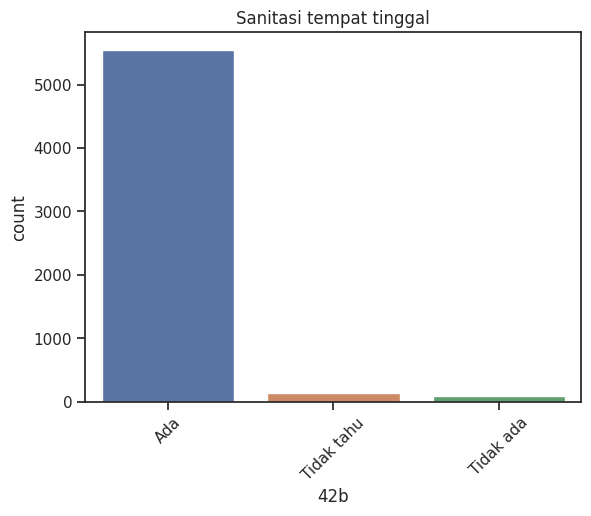

In [ ]:
sns.countplot(x="42b", data=df_insight2).set(title='Sanitasi tempat tinggal')
plt.xticks(rotation=45)

Terlihat bahwa mayoritas penderita diare sudah memiliki sanitasi tempat tinggal. Sehingga tidak bisa dikatakan diare yang dialami disebabkan karena kurangnya sanitasi di tempat tinggal.

In [ ]:
#Akan dicari asosiasi antara variabel faktor-faktor 'Gaya Hidup' di atas dengan variabel penyakit diare
df_test2 = df.copy()

df_gayahidup = df_test2[["15a","23b","24b","25b","28b", "36b", "39b", "40b", "41b", "42b"]]

df_gayahidup = df_gayahidup.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df_gayahidup)
# will return a pairwise matrix filled with Cramer's V, where columns and index are
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

15a       23b       24b       25b       28b       36b       39b  \
15a  1.000000  0.058652  0.050716  0.060467  0.004626  0.044062  0.014288   
23b  0.058652  1.000000  0.177807  0.249686  0.116229  0.102824  0.041135   
24b  0.050716  0.177807  1.000000  0.229216  0.053030  0.102572  0.018851   
25b  0.060467  0.249686  0.229216  1.000000  0.093688  0.127009  0.041762   
28b  0.004626  0.116229  0.053030  0.093688  1.000000  0.062898  0.029066   
36b  0.044062  0.102824  0.102572  0.127009  0.062898  1.000000  0.038219   
39b  0.014288  0.041135  0.018851  0.041762  0.029066  0.038219  1.000000   
40b  0.058679  0.020688  0.013565  0.025522  0.029744  0.024148  0.408236   
41b  0.027682  0.034579  0.034383  0.043940  0.033800  0.028998  0.139178   
42b  0.012337  0.028609  0.016890  0.042015  0.016389  0.039338  0.061369   

          40b       41b       42b  
15a  0.058679  0.027682  0.012337  
23b  0.020688  0.034579  0.028609  
24b  0.013565  0.034383  0.016890  
25b  0.025522  0.043940  0.042015  
28b  0.029744  0.033800  0.016389  
36b  0.024148  0.028998  0.039338  
39b  0.408236  0.139178  0.061369  
40b  1.000000  0.108677  0.038628  
41b  0.108677  1.000000  0.104136  
42b  0.038628  0.104136  1.000000

###Interpretasi
Berdasarkan nilai korelasi dari yang terbesar, didapat indikator gaya hidup yang paling sering diasosiasikan dengan penyakit diare adalah konsumsi buah dan sayur, sumber air minum, frekuensi olahraga, konsumsi air mineral, dan seterusnya.  

##**Kesimpulan**
Diare memang merupakan masalah kesehatan ringan yang dapat dengan mudah untuk diatasi. Akan tetapi, jika tidak ditangani dengan tepat dan berkelanjutan dapat menyebabkan  dehidrasi, gangguan keseimbangan kimia tubuh, kekurangan nutrisi, kelelahan yang berlebihan, dll. Oleh sebab itu, sebaiknya perhatikan faktor-faktor gaya hidup di atas, seperti konsumsi buah, sayur, air mineral, sumber air minum, dan frekuensi olahraga agar terhindari dari penyakit diare. Selain itu, jika dirasa mengalami gejala seperti pencernaan terganggu, perut tidak enak, dan sakit kepala, kemungkinan Anda menderita penyakit diare dan ambil lah langkah-langkah penyembuhan yang tepat.

# Insight 2 - Penyakit Lambung

Faktanya, penyakit lambung dapat disebabkan oleh berbagai faktor dan genjala yang muncul juga bervariasi tergantung tingkat keparahan. Gejala umum penyakit lambung meliputi :
-  nyeri lambung
-  mual / muntah
-  heartburn
-  cepat merasa kenyang
-  sering bersendawa
-  perubahan berat badan
-  nafsu makan menurun
-  perubahan feses

dengan faktor penyebabnya meliputi :      
-  infeksi bakteri
-  penggunaan obat-obatan tertentu
-  GERD
-  polip lambung
-  stres
-  sindrom Zollinger-Ellison
-  Pola makan tidak sehat
-  merokok dan konsumsi alkohol


Akan dianalisis apakah data menunjukkan faktor pengaruh yang sama melalui variabel berikut :     
1. gaya hidup
-  2b - tidak nafsu makan
-  7b - pencernaan terganggu
-  19b - perasaan tidak enak di perut
-  25b - konsumsi buah dan sayur harian
-  28b - merokok
-  30b - konsumsi gula/pemanis harian
-  31b - konsumsi alkohol harian
- 32b - konsumsi junk food harian
2. faktor stres
- 5b - merasa tegang, cemas, atau kuatir
- 9b - merasa tidak bahagia
- 10b - menangis lebih sering
- 16b - tidak merasa berharga
- 17b - mempunyai pikiran mengakhiri hidup
3. faktor lingkungan
- 26b - frekuensi mandi harian
- 33b - frekuensi menggosok gigi harian
- 36b - mencuci tangan dengan air bersih dan sabun sebelum makan
- 39b - sumber air bersih
- 40b - sumber penggunaan air bersih untuk makan dan minum
- 42b - saluran pembuangan air (sanitasi) rumah tangga


In [ ]:
#membentuk df baru khusus untuk penyakit lambung
columns_to_drop = ['ID', 'WILAYAH', 'JENIS KELAMIN','USIA','LAMA BERDINAS','PENDIDIKAN TERAKHIR','TINGGI BADAN','BERAT BADAN','LINGKAR PINGGANG','Status Perkawinan','PENGELUARAN/BULAN','1a','2a','3a','4a','5a','6a','7a','8a','10a','11a','12a','13a','14a','15a','16a','17a','18a','19a','20a']
df1 = df.drop(columns=columns_to_drop, axis=1)
df1

9a               1b     2b     3b               4b     5b     6b  \
0          Ya  Kadang - kadang  Tidak  Tidak            Tidak  Tidak  Tidak   
1       Tidak            Tidak  Tidak  Tidak            Tidak  Tidak  Tidak   
2       Tidak  Kadang - kadang  Tidak  Tidak  Kadang - kadang  Tidak  Tidak   
3       Tidak            Tidak  Tidak  Tidak            Tidak  Tidak  Tidak   
4       Tidak  Kadang - kadang  Tidak  Tidak            Tidak  Tidak  Tidak   
...       ...              ...    ...    ...              ...    ...    ...   
289796  Tidak            Tidak  Tidak  Tidak            Tidak  Tidak  Tidak   
289797  Tidak            Tidak  Tidak  Tidak            Tidak  Tidak  Tidak   
289798  Tidak            Tidak  Tidak  Tidak            Tidak  Tidak  Tidak   
289799  Tidak            Tidak  Tidak  Tidak            Tidak  Tidak  Tidak   
289800  Tidak            Tidak  Tidak  Tidak            Tidak  Tidak  Tidak   

           7b     8b     9b  ...         39b                    40b  \
0       Tidak  Tidak  Tidak  ...     Air PAM            Tadah hujan   
1       Tidak  Tidak  Tidak  ...     Air PAM  Air mineral isi ulang   
2       Tidak  Tidak  Tidak  ...     Air PAM  Air mineral isi ulang   
3       Tidak  Tidak  Tidak  ...     Air PAM  Air mineral isi ulang   
4       Tidak  Tidak  Tidak  ...     Air PAM  Air mineral isi ulang   
...       ...    ...    ...  ...         ...                    ...   
289796  Tidak  Tidak  Tidak  ...     Air PAM                Air PAM   
289797  Tidak  Tidak  Tidak  ...  Sumur/Kali    Air mineral kemasan   
289798  Tidak  Tidak  Tidak  ...  Sumur/Kali              Air sumur   
289799  Tidak  Tidak  Tidak  ...  Sumur/Kali              Air sumur   
289800  Tidak  Tidak  Tidak  ...  Sumur/Kali              Air sumur   

                                41b         42b            43b  \
0               Lebih dari 12 meter         Ada   Ada, terbuka   
1               Lebih dari 12 meter         Ada  Ada, tertutup   
2       Tidak memiliki jamban sehat         Ada      Tidak ada   
3       Tidak memiliki jamban sehat         Ada  Ada, tertutup   
4               Lebih dari 12 meter         Ada  Ada, tertutup   
...                             ...         ...            ...   
289796  Tidak memiliki jamban sehat  Tidak tahu   Ada, terbuka   
289797         Kurang dari 12 meter         Ada   Ada, terbuka   
289798          Lebih dari 12 meter         Ada  Ada, tertutup   
289799          Lebih dari 12 meter  Tidak tahu      Tidak ada   
289800         Kurang dari 12 meter         Ada   Ada, terbuka   

                         44b        45b      46b    47b           48b  
0        Lebih dari 10 meter  Tidak ada  25 - 34  29.80      Obesitas  
1        Lebih dari 10 meter  Tidak ada  35 - 44  24.36        Normal  
2                        NaN  Tidak ada  15 - 24  20.88        Normal  
3        Lebih dari 10 meter  Tidak ada  35 - 44  28.75      Obesitas  
4        Lebih dari 10 meter        Ada  25 - 34  22.91        Normal  
...                      ...        ...      ...    ...           ...  
289796  Kurang dari 10 meter        Ada  15 - 24  21.01        Normal  
289797  Kurang dari 10 meter  Tidak ada  45 - 54  24.97        Normal  
289798   Lebih dari 10 meter        Ada  45 - 54   1.72  Sangat Kurus  
289799                   NaN        Ada  35 - 44  17.17         Kurus  
289800   Lebih dari 10 meter        Ada  15 - 24   34.2      Obesitas  

[289801 rows x 49 columns]

In [ ]:
#mencari asosiasi antara variabel faktor dengan variabel penyakit
from scipy.stats import chi2_contingency
#mendefinisikan fungsi cramer's v untuk mencari asosiasi data kategorik
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


#membuat tabel kontingensi
cramers_v_results = []

dependent_variable = '9a'

for independent_variable in df1.columns:
    if independent_variable != dependent_variable:
        confusion_matrix = pd.crosstab(df1[independent_variable], df1[dependent_variable]).values
        cramers_v_value = cramers_v(confusion_matrix)
        cramers_v_results.append((independent_variable, cramers_v_value))

#mengurutkan hasil dari nilai asosiasi tertinggi
sorted_results = sorted(cramers_v_results, key=lambda x: x[1], reverse=True)

#menunjukkan hasil cramer's v
print("\nCramer's V results:")
for variable, v_value in sorted_results:
    print(f"{variable}: Cramer's V = {v_value}")


Cramer's V results:
19b: Cramer's V = 0.34610000849490535
7b: Cramer's V = 0.3220517192040959
1b: Cramer's V = 0.22602867339475297
3b: Cramer's V = 0.18779259766846798
5b: Cramer's V = 0.18676508221417726
20b: Cramer's V = 0.1849652365495301
2b: Cramer's V = 0.16243697278140878
4b: Cramer's V = 0.1514736996412871
21b: Cramer's V = 0.14324747203163374
18b: Cramer's V = 0.12681851918075526
8b: Cramer's V = 0.12427219634664902
6b: Cramer's V = 0.1208884382183066
23b: Cramer's V = 0.11721387809868546
46b: Cramer's V = 0.11711155391000982
25b: Cramer's V = 0.11362410843964231
47b: Cramer's V = 0.106776969613464
11b: Cramer's V = 0.10600252919801348
13b: Cramer's V = 0.10494944843628377
9b: Cramer's V = 0.10207586526709723
12b: Cramer's V = 0.09502853268300267
29b: Cramer's V = 0.09381080587348842
24b: Cramer's V = 0.09279361097198079
15b: Cramer's V = 0.08433005459460428
16b: Cramer's V = 0.07179481714115288
33b: Cramer's V = 0.06709237208396567
10b: Cramer's V = 0.06539924898358365
45b: C

Hanya berdasarkan nilai korelasi antara variabel faktor terhadap variabel penyakit, terlihat bahwa faktor yang paling mempengaruhi adalah 19b (mengalami rasa tidak enak di perut), disusul oleh 7b (pencernaan terganggu/buruk), lalu 1b (sering menderita sakit kepala), 3b (sulit tidur), dan seterusnya.

Berdasarkan fakta, variabel 19b, 7b, dan 3b telah tepat sesuai gejala dan penyebab penyakit lambung. Namun, 1b tidak terlalu tepat. Sehingga akan dilakukan analisis lebih lanjut.

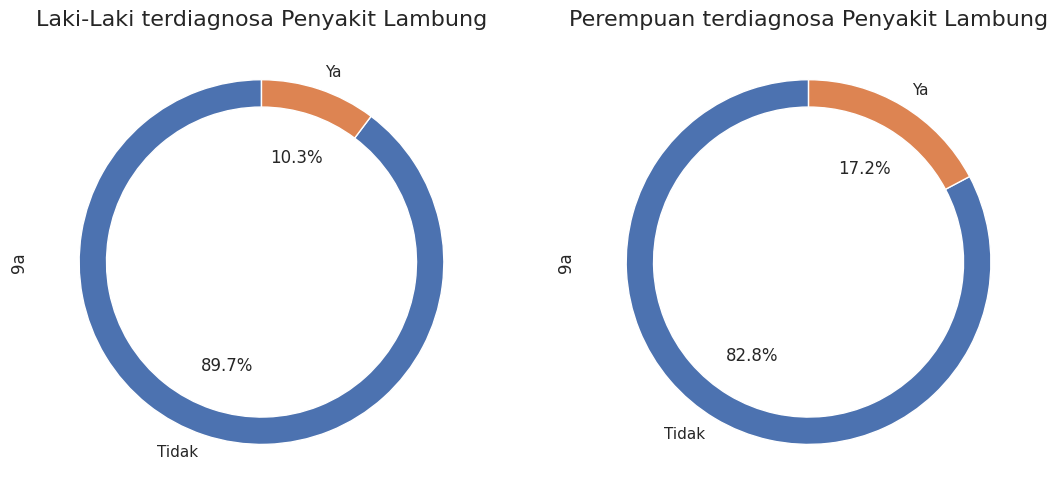

In [ ]:
#Melihat persebaran diagnosa penyakit lambung berdasarkan gender
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
df['9a'][df['JENIS KELAMIN'] == 'LAKI - LAKI'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Laki-Laki terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,2)
df['9a'][df['JENIS KELAMIN'] == 'PEREMPUAN'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Perempuan terdiagnosa Penyakit Lambung', size=16)

plt.show()

dengan mayoritas responden laki-laki, terlihat juga bahwa lebih besar persentasi yang menyerang perempuan. Namun, tidak dalam jumlah signifikan.

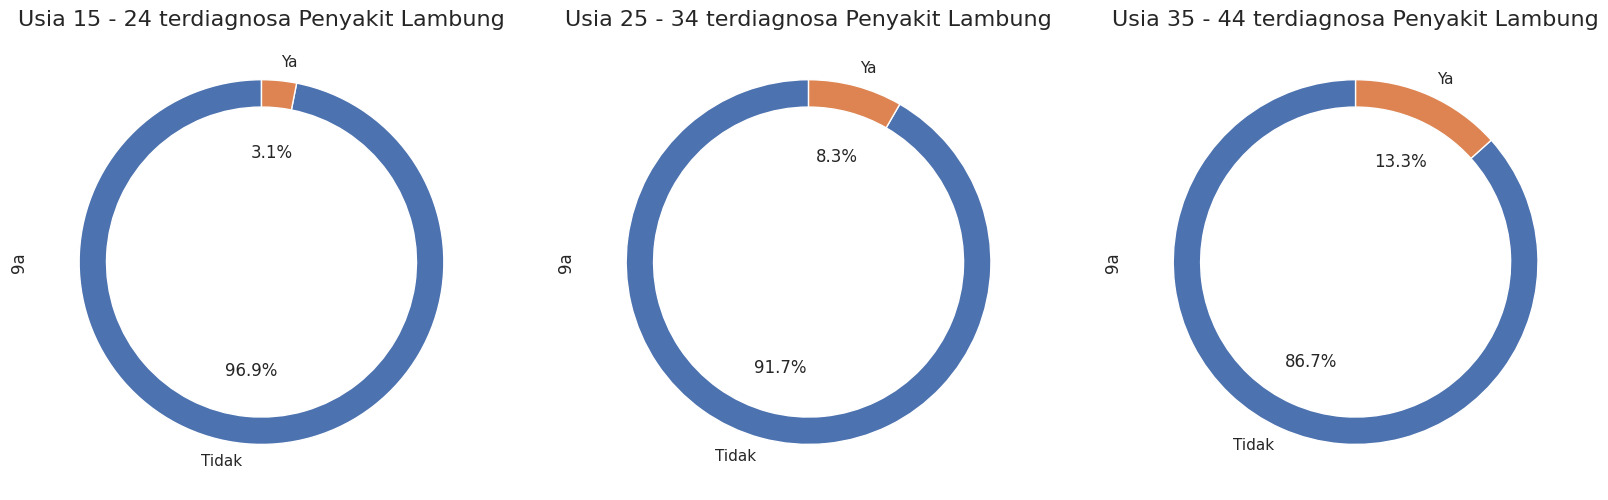

In [ ]:
#Melihat persebaran diagnosa penyakit lambung berdasarkan kelompok usia
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
df['9a'][df['46b'] == '15 - 24'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Usia 15 - 24 terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,2)
df['9a'][df['46b'] == '25 - 34'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Usia 25 - 34 terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,3)
df['9a'][df['46b'] == '35 - 44'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Usia 35 - 44 terdiagnosa Penyakit Lambung', size=16)

plt.show()

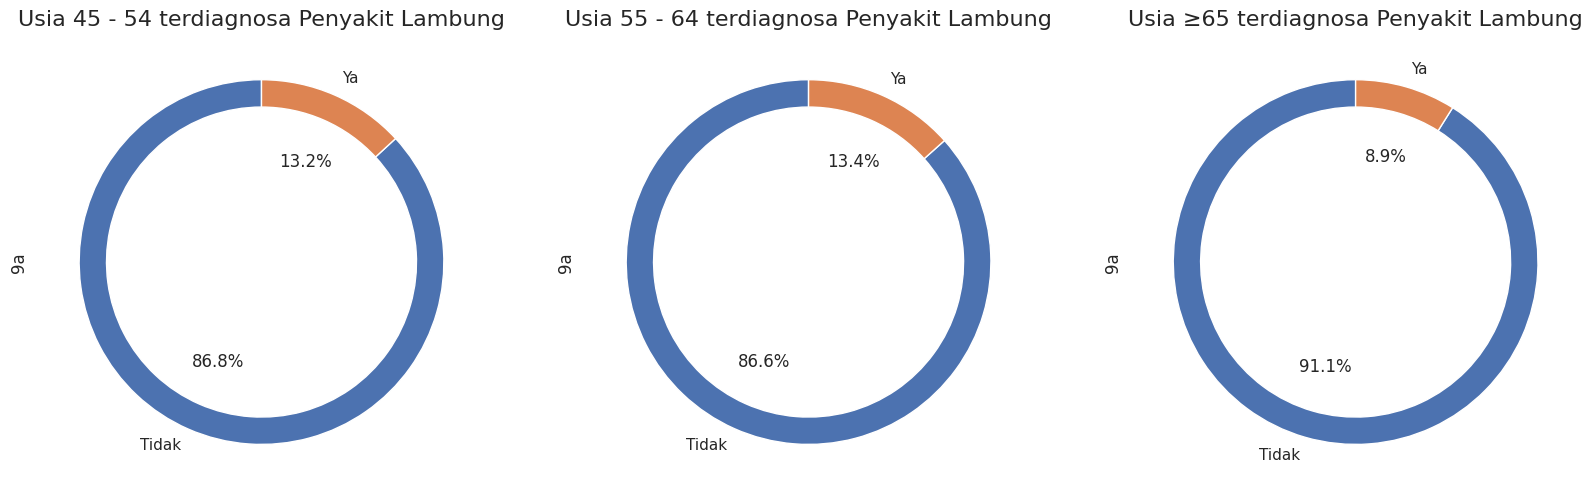

In [ ]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
df['9a'][df['46b'] == '45 - 54'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Usia 45 - 54 terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,2)
df['9a'][df['46b'] == '55 - 64'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Usia 55 - 64 terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,3)
df['9a'][df['46b'] == '≥ 65'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Usia ≥65 terdiagnosa Penyakit Lambung', size=16)

plt.show()

Terlihat kelompok usia 35-64 cenderung menderita penyakit lambung. Maka terdapat kemungkinan bahwa usia mempengaruhi.

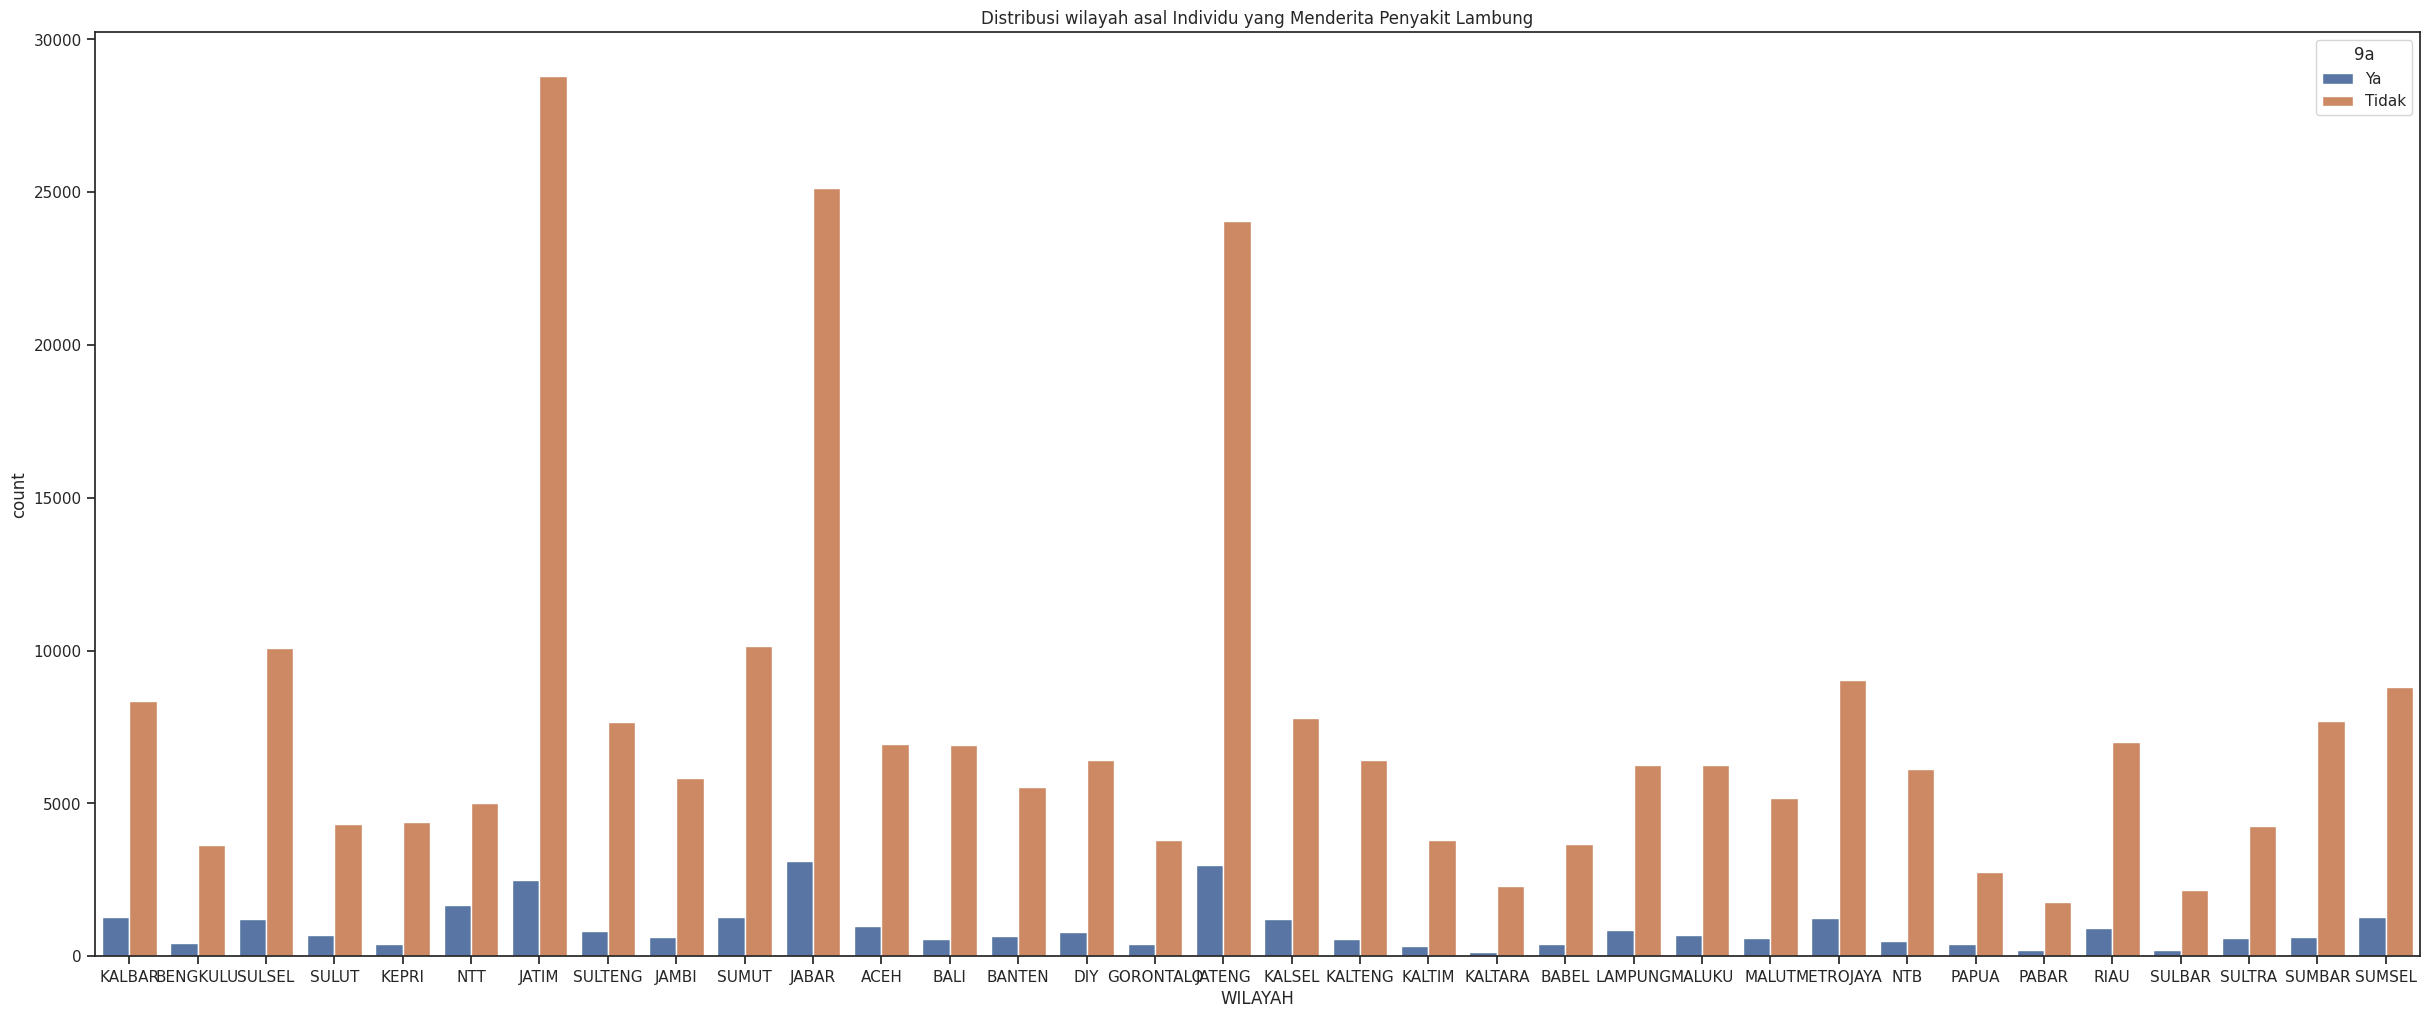

In [ ]:
#melihat persebaran asal wilayah dari individu yang menderita penyakit lambung
plt.figure(figsize=(30, 12))
sns.countplot(x='WILAYAH', hue='9a', data=df)
plt.title('Distribusi wilayah asal Individu yang Menderita Penyakit Lambung')
plt.show()

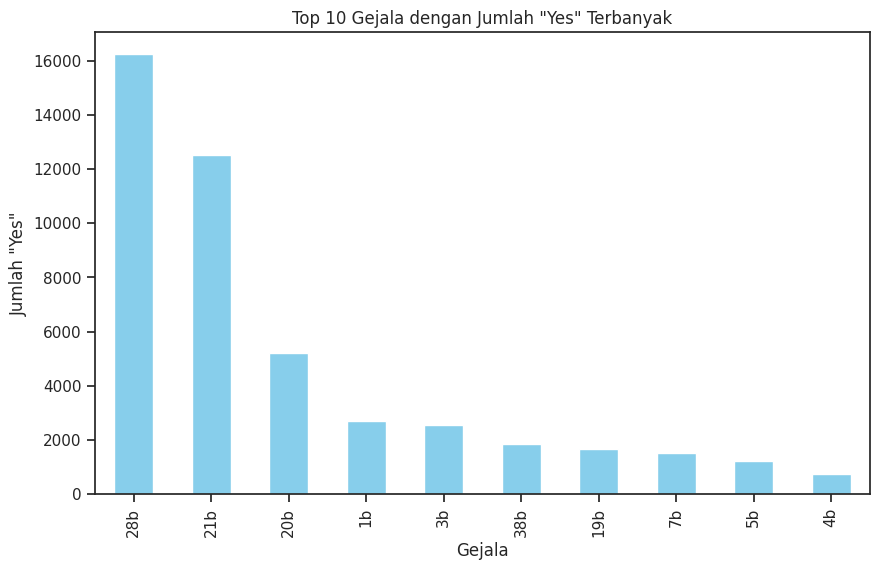

In [ ]:
#melihat gejala yang paling banyak dialami oleh individu yang terkena penyakit lambung
df_yes = df1[df1['9a'] == 'Ya']

# Menghitung jumlah 'yes' untuk setiap gejala
gejala_counts = df_yes.iloc[:, 1:].apply(lambda x: x.value_counts().get('Ya', 0))

# Mengurutkan gejala berdasarkan jumlah 'yes'
sorted_gejala2 = gejala_counts.sort_values(ascending=False)
top_10_gejala2 = sorted_gejala2.head(10)

# Menampilkan hasil
plt.figure(figsize=(10, 6))
top_10_gejala2.plot(kind='bar', color='skyblue')
plt.title('Top 10 Gejala dengan Jumlah "Yes" Terbanyak')
plt.xlabel('Gejala')
plt.ylabel('Jumlah "Yes"')
plt.show()

Terlihat bahwa penderita penyakit lambung paling banyak menyetujui gejala berikut :     
- merokok (28b)
- menderita penyakit gigi dan mulut (21b)
- mudah lelah (20b)
- sering sakit kepala (1b)
- sulit tidur (3b)
- terkontaminasi/terganggu polusi (38b)
- tidak enak di perut (19b)
- pencernaan terganggu (7b)
- merasa tegang, cemas, atau kuatir (5b)
- mudah takut (4b)

Terdapat beberapa variabel yang sesuai dengan diagnosa sesungguhnya.

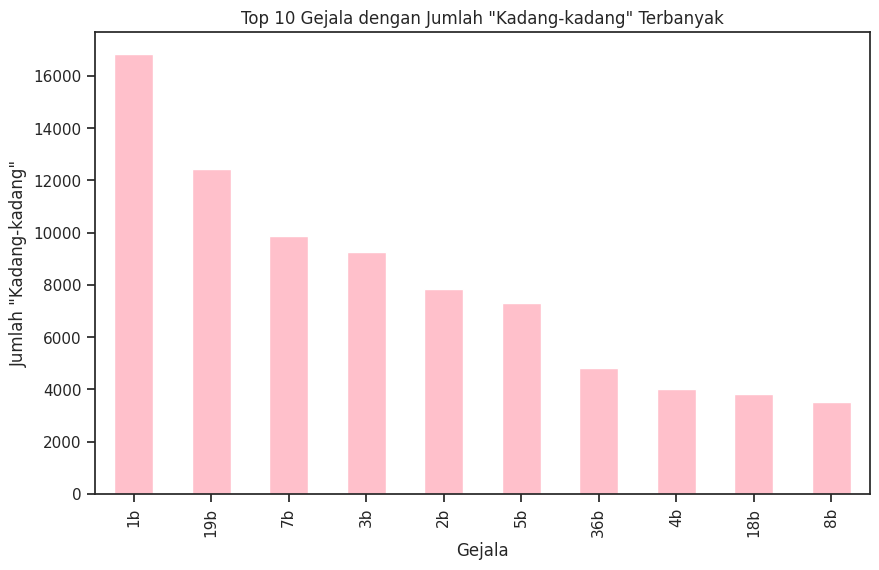

In [ ]:
#melihat gejala yang cukup banyak dialami oleh individu yang terkena penyakit lambung
df_yes = df1[df1['9a'] == 'Ya']

# Menghitung jumlah 'kadang-kadang' untuk setiap gejala
gejala_counts = df_yes.iloc[:, 1:].apply(lambda x: x.value_counts().get('Kadang - kadang', 0))

# Mengurutkan gejala berdasarkan jumlah 'kadang-kadang'
sorted_gejala1 = gejala_counts.sort_values(ascending=False)
top_10_gejala1 = sorted_gejala1.head(10)

# Menampilkan hasil
plt.figure(figsize=(10, 6))
top_10_gejala1.plot(kind='bar', color='pink')
plt.title('Top 10 Gejala dengan Jumlah "Kadang-kadang" Terbanyak')
plt.xlabel('Gejala')
plt.ylabel('Jumlah "Kadang-kadang"')
plt.show()

Terlihat juga penderita penyakit lambung kadang-kadang mengalami gejala berikut :     
- sakit kepala (1b)
- tidak enak di perut (19b)
- pencernaan terganggu/buruk (7b)
- sulit tidur (3b)
- tidak nafsu makan (2b)
- merasa tegang,cemas, atau kuatir (5b)
- mudah takut (4b)
- lelah sepanjang waktu (18b)
- sulit berpikir jernih (8b)

terdapat beberapa variabel yang sesuai dengan diagnosa sesungguhnya (kebanyakan variabel faktor stres).

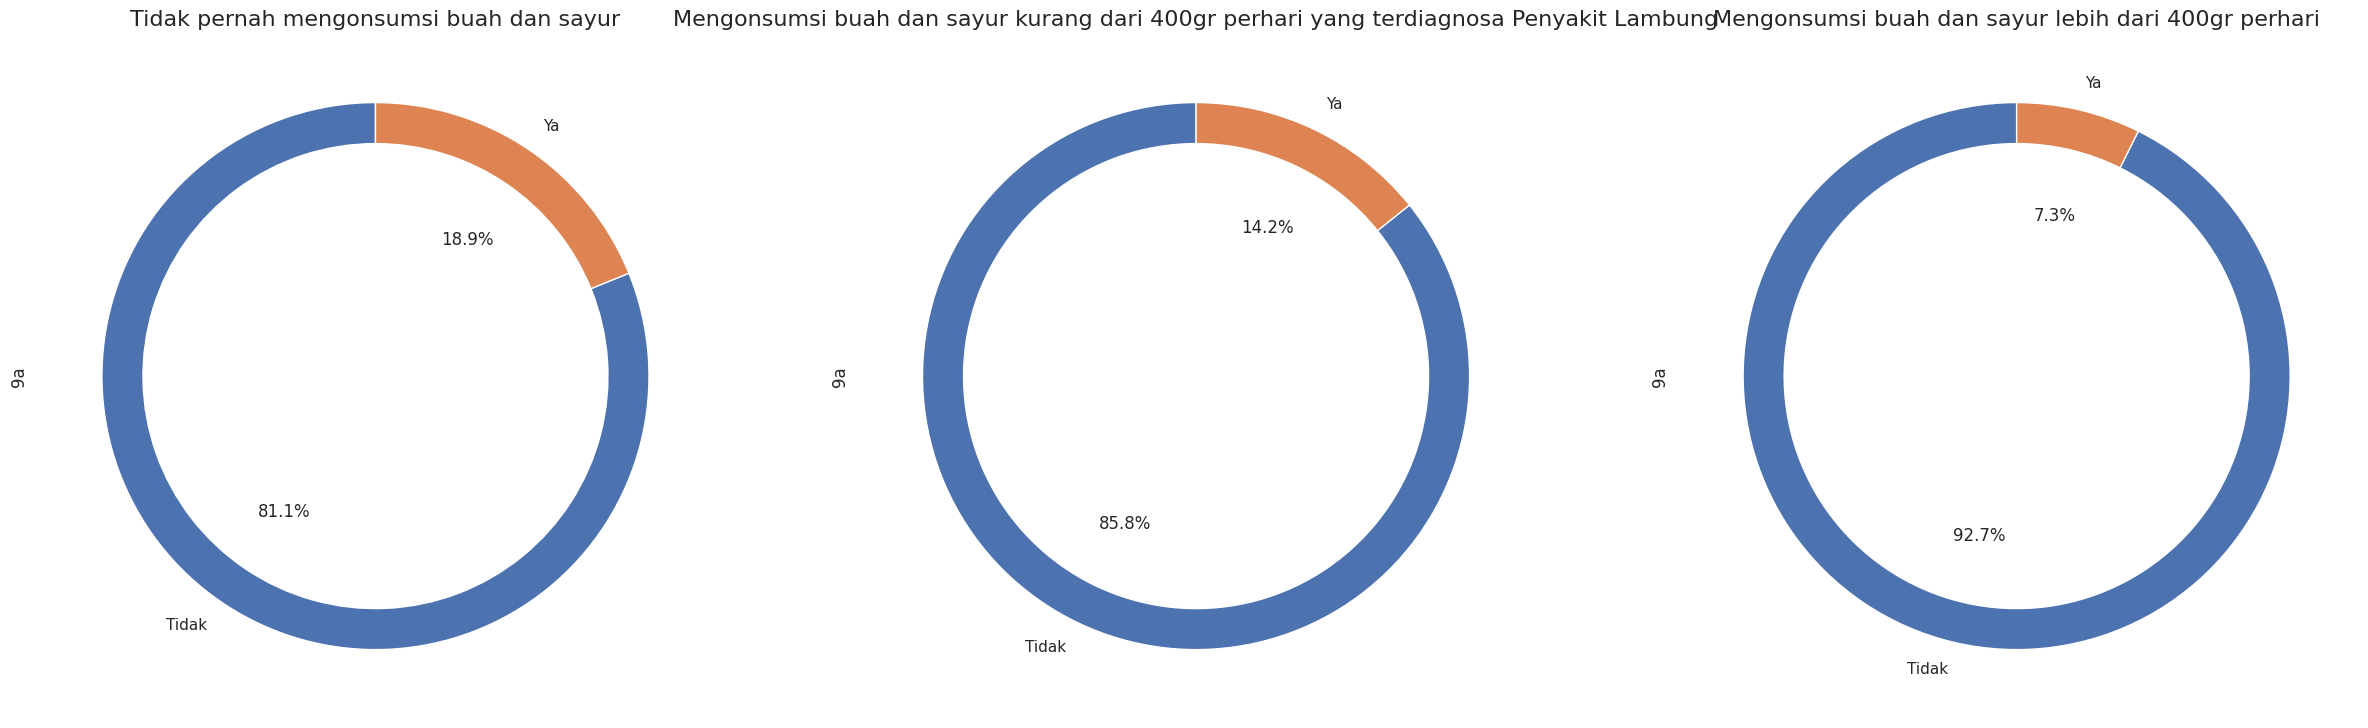

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['25b'] == 'Tidak pernah'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Tidak pernah mengonsumsi buah dan sayur', size=16)

plt.subplot(1,3,2)
df['9a'][df['25b'] == 'Kurang dari 400gr'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Mengonsumsi buah dan sayur kurang dari 400gr perhari yang terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,3)
df['9a'][df['25b'] == '400gr/lebih'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Mengonsumsi buah dan sayur lebih dari 400gr perhari', size=16)

plt.show()

Terlihat mereka yang tidak mengonsumsi buah dan sayur memiliki kemungkingkan lebih dari 2x lipat menderita penyakit lambung dari individu yang mengonsumsi buah dan sayur lebih dari 400gr perhari. Sehingga buah dan sayur berpengaruh.

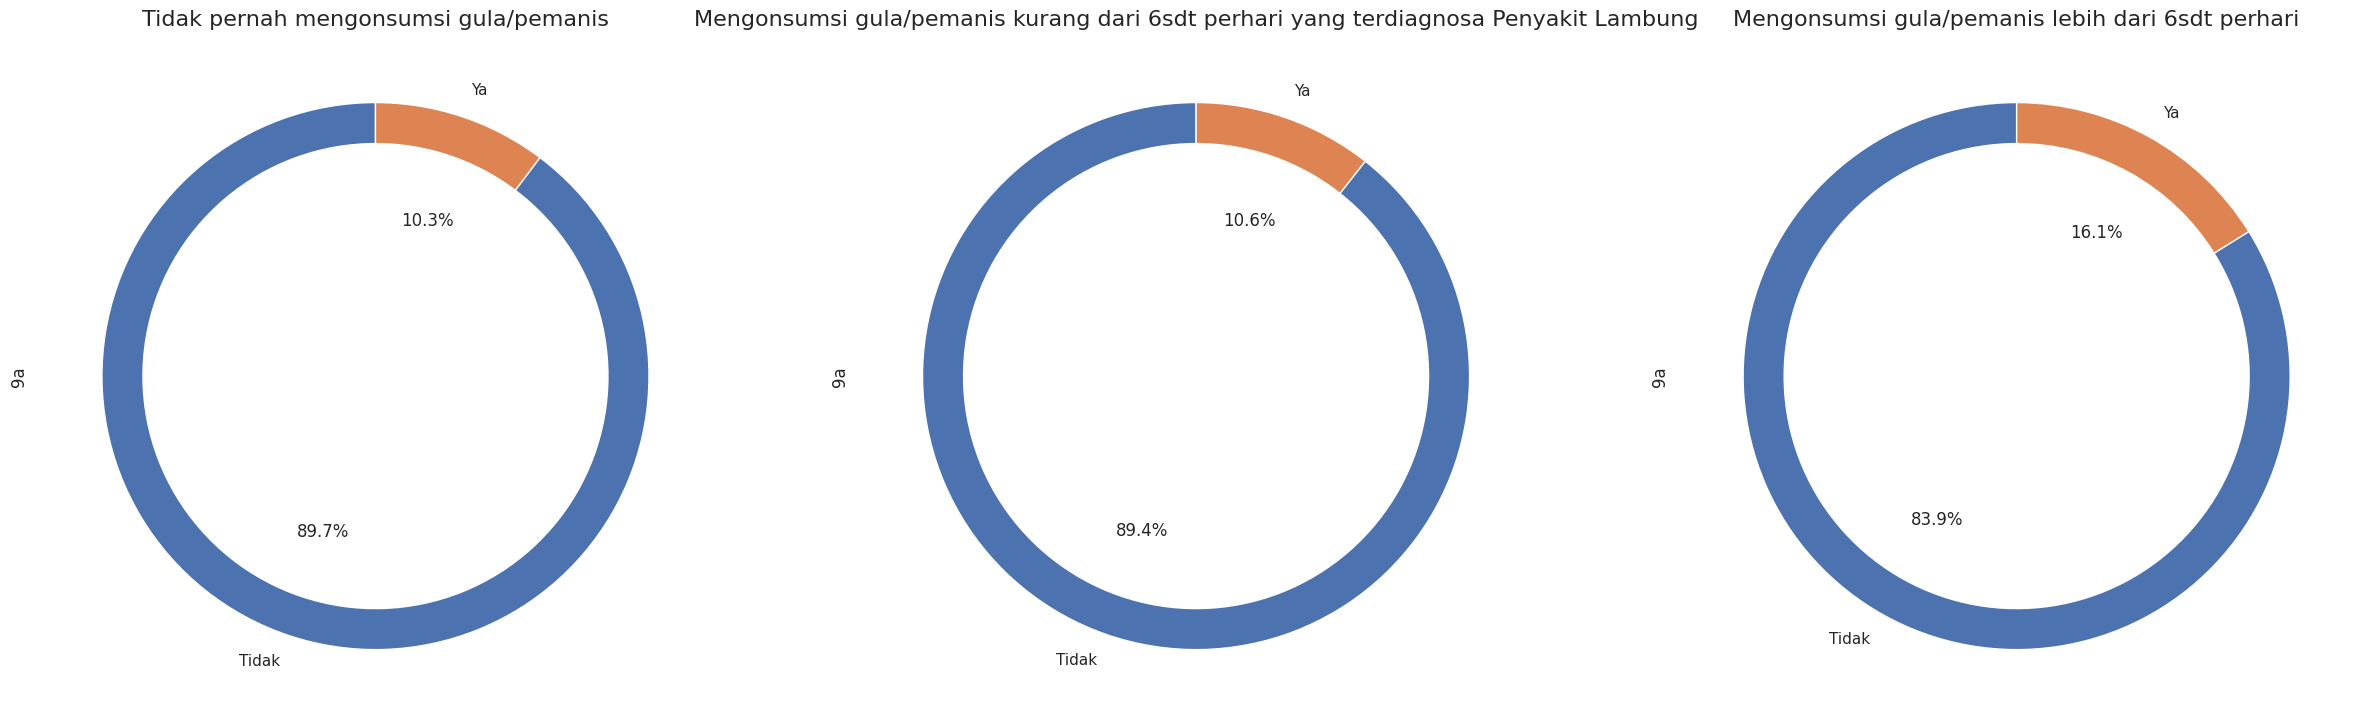

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['30b'] == 'Tidak pernah'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Tidak pernah mengonsumsi gula/pemanis', size=16)

plt.subplot(1,3,2)
df['9a'][df['30b'] == 'Kurang dari 6 sendok teh'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Mengonsumsi gula/pemanis kurang dari 6sdt perhari yang terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,3)
df['9a'][df['30b'] == 'Lebih dari 6 sendok teh'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Mengonsumsi gula/pemanis lebih dari 6sdt perhari', size=16)

plt.show()

Terlihat individu yang mengonsumsi lebih dari 6sdt gula perhari memiliki probabilitas lebih tinggi untuk menderita penyakit lambung. Sehingga sugar intake berpengaruh.

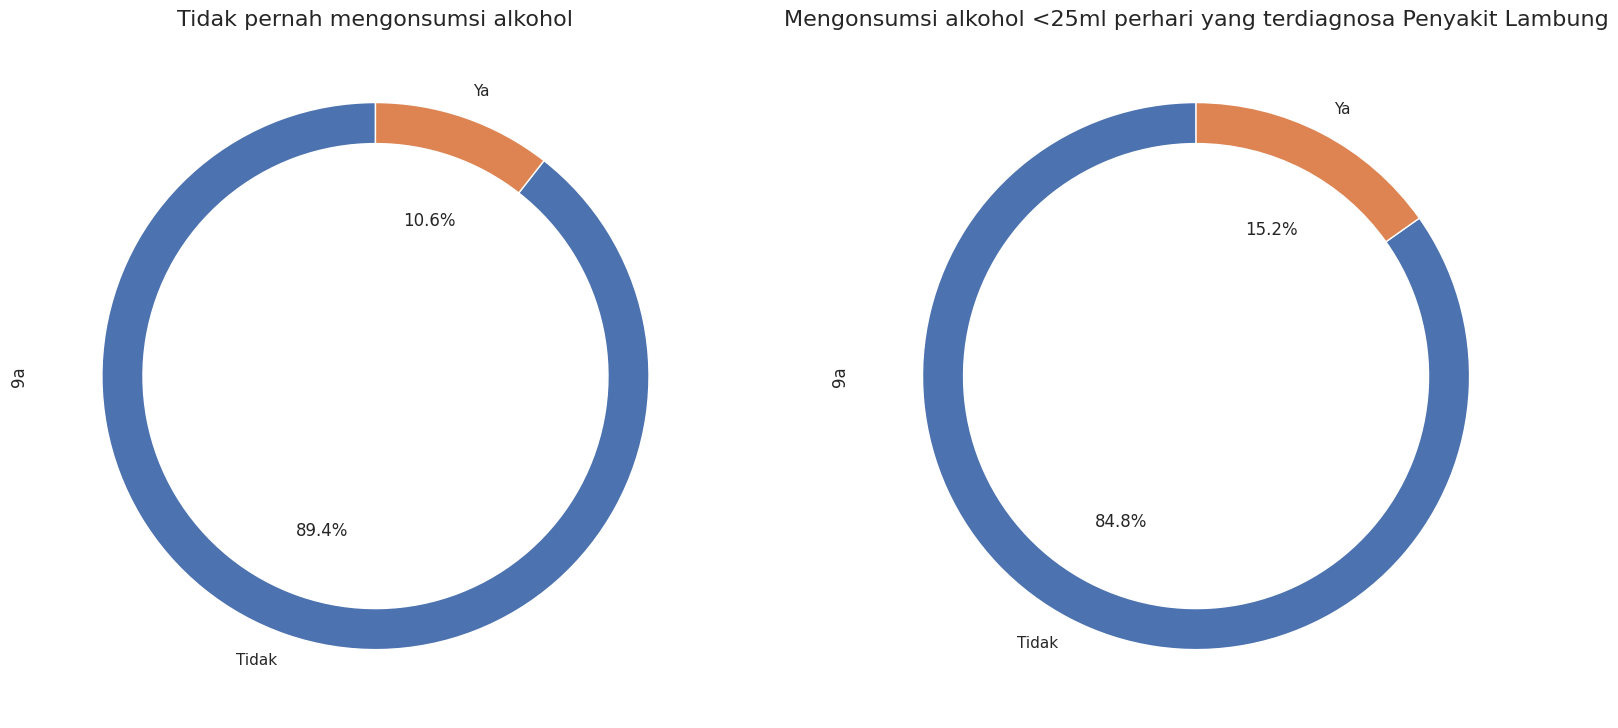

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['31b'] == 'Tidak pernah'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Tidak pernah mengonsumsi alkohol', size=16)

plt.subplot(1,3,2)
df['9a'][df['31b'] == 'Kurang dari 25ml'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Mengonsumsi alkohol <25ml perhari yang terdiagnosa Penyakit Lambung', size=16)

plt.show()

Terlihat individu yang mengonsumsi alkohol memiliki probabilitas lebih tinggi menderita penyakit lambung. Maka konsumsi alkohol berpengaruh.

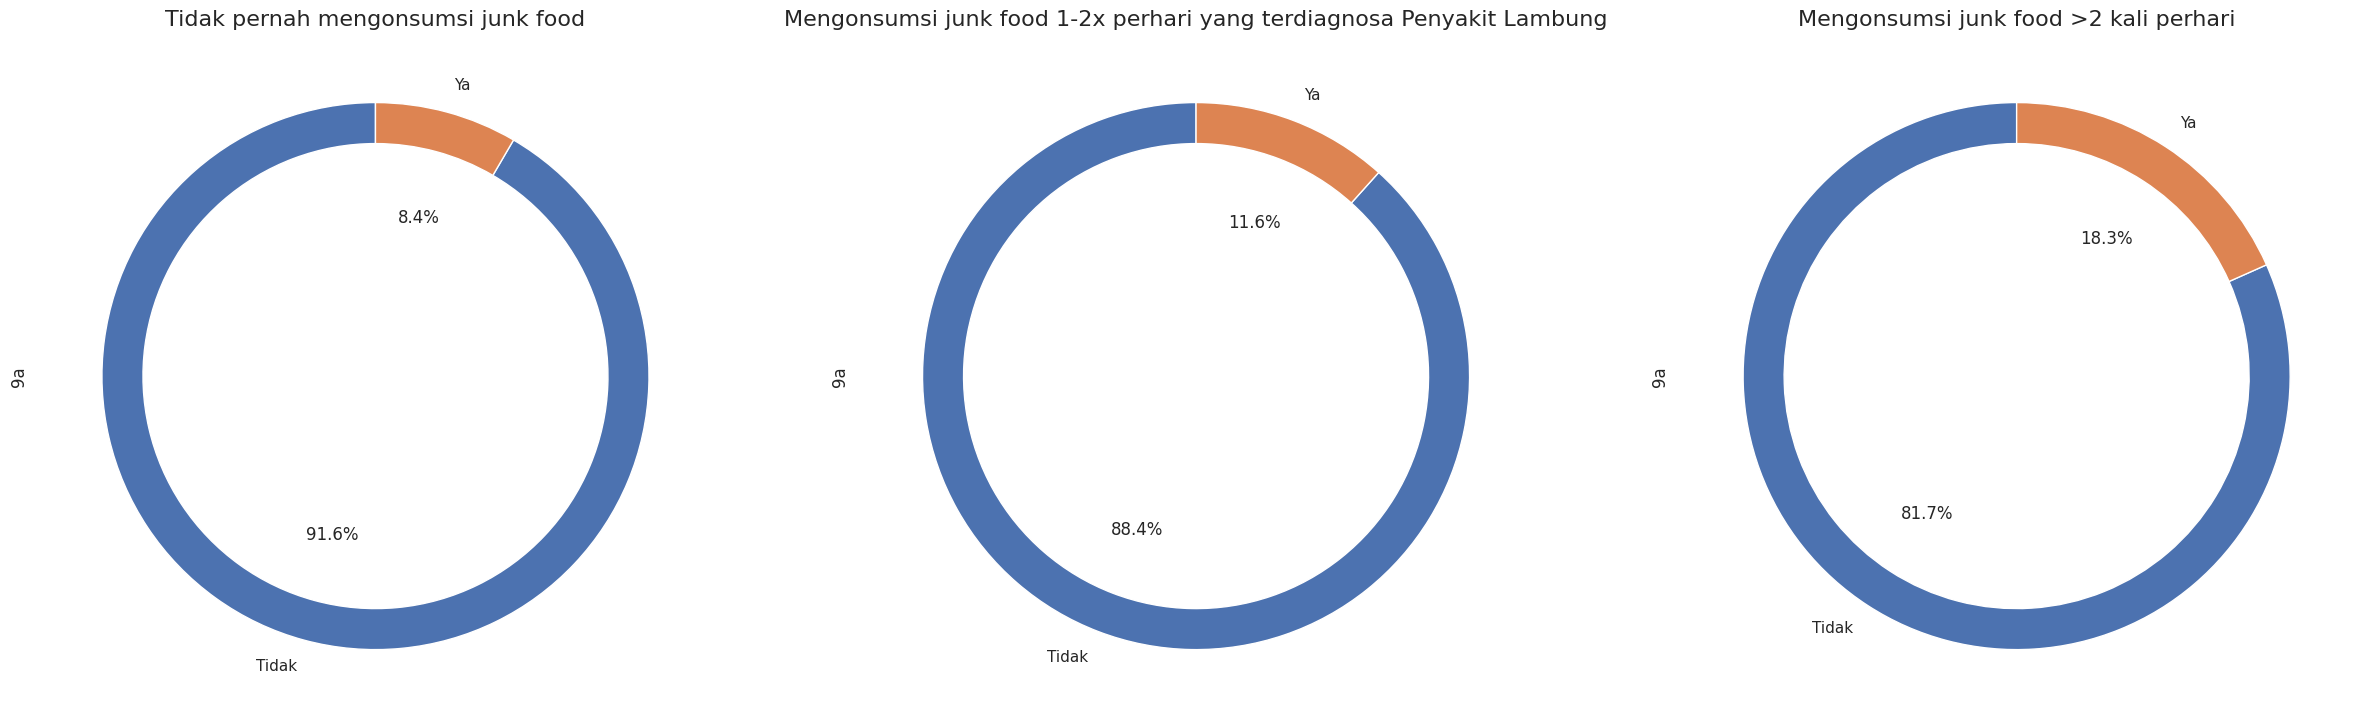

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['32b'] == 'Tidak pernah'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Tidak pernah mengonsumsi junk food', size=16)

plt.subplot(1,3,2)
df['9a'][df['32b'] == '1 - 2 kali/hari'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Mengonsumsi junk food 1-2x perhari yang terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,3)
df['9a'][df['32b'] == 'Di atas 2 kali/hari'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Mengonsumsi junk food >2 kali perhari', size=16)

plt.show()

Terlihat individu yang mengonsumsi junk food memiliki probabilitas lebih tinggi menderita penyakit lambung. Maka konsumsi junk food berpengaruh.

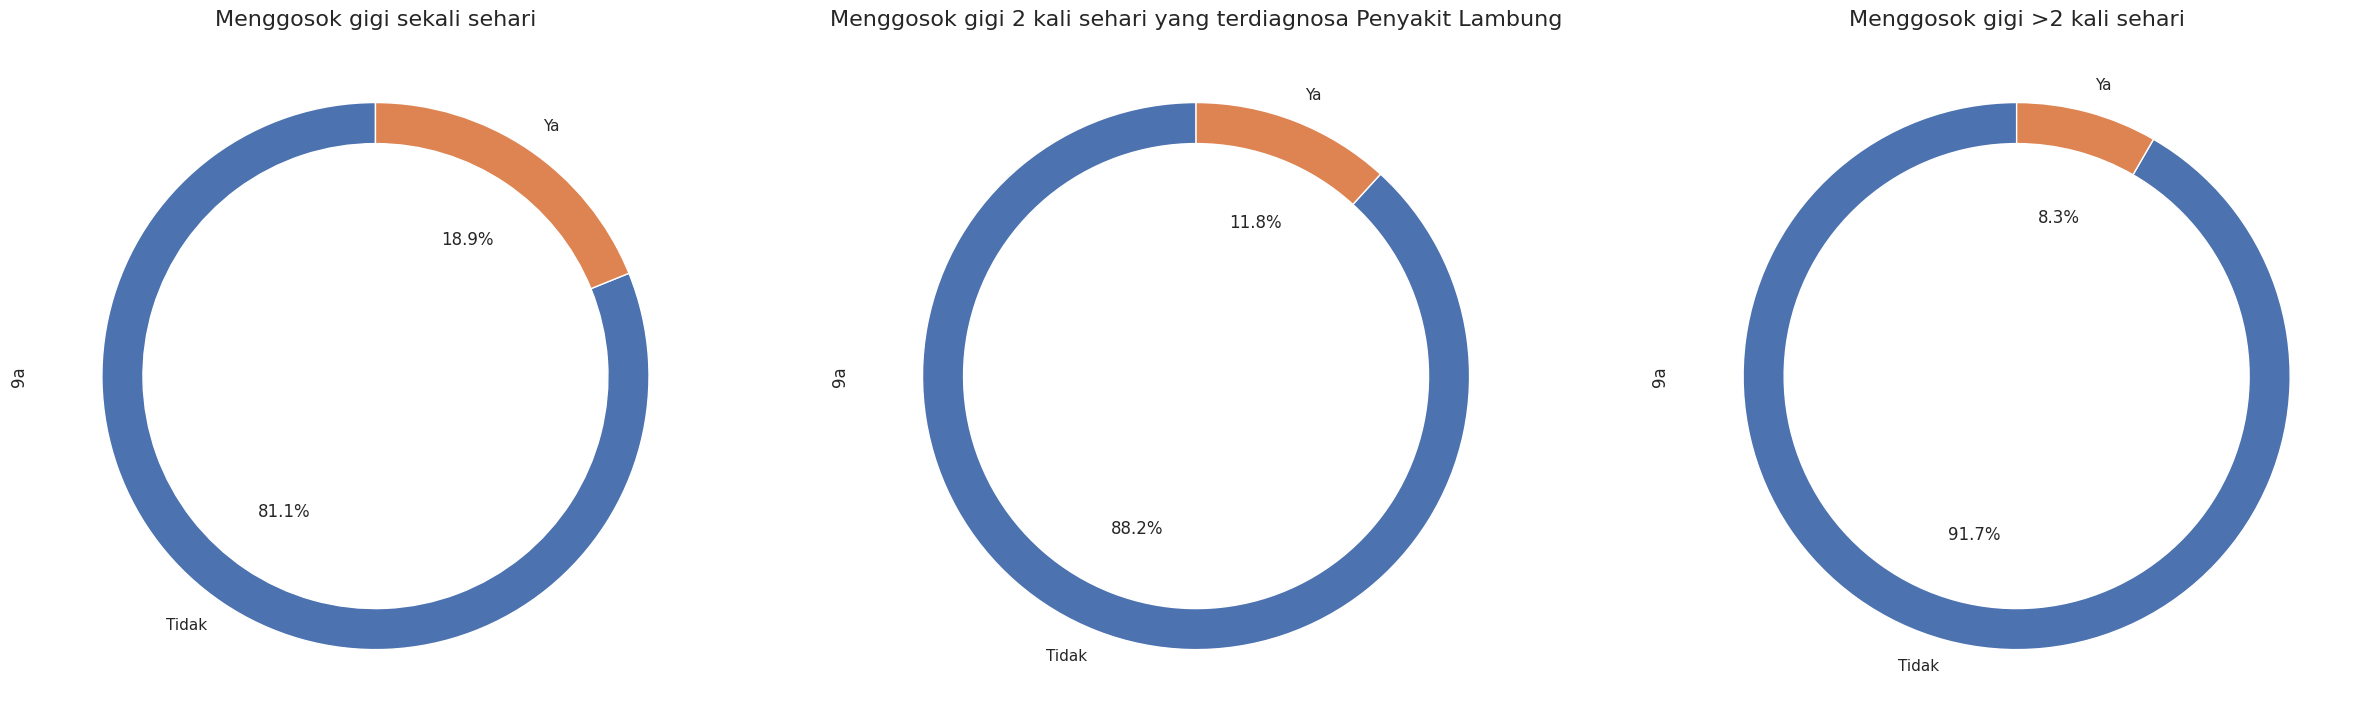

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['33b'] == '1 Kali'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Menggosok gigi sekali sehari', size=16)

plt.subplot(1,3,2)
df['9a'][df['33b'] == '2 Kali'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Menggosok gigi 2 kali sehari yang terdiagnosa Penyakit Lambung', size=16)

plt.subplot(1,3,3)
df['9a'][df['33b'] == '> 2 Kali'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Menggosok gigi >2 kali sehari', size=16)

plt.show()

Terlihat individu yang menggosok gigi sekali sehari memiliki probabilitas lebih tinggi menderita penyakit lambung. Maka kebersihan gigi berpengaruh.

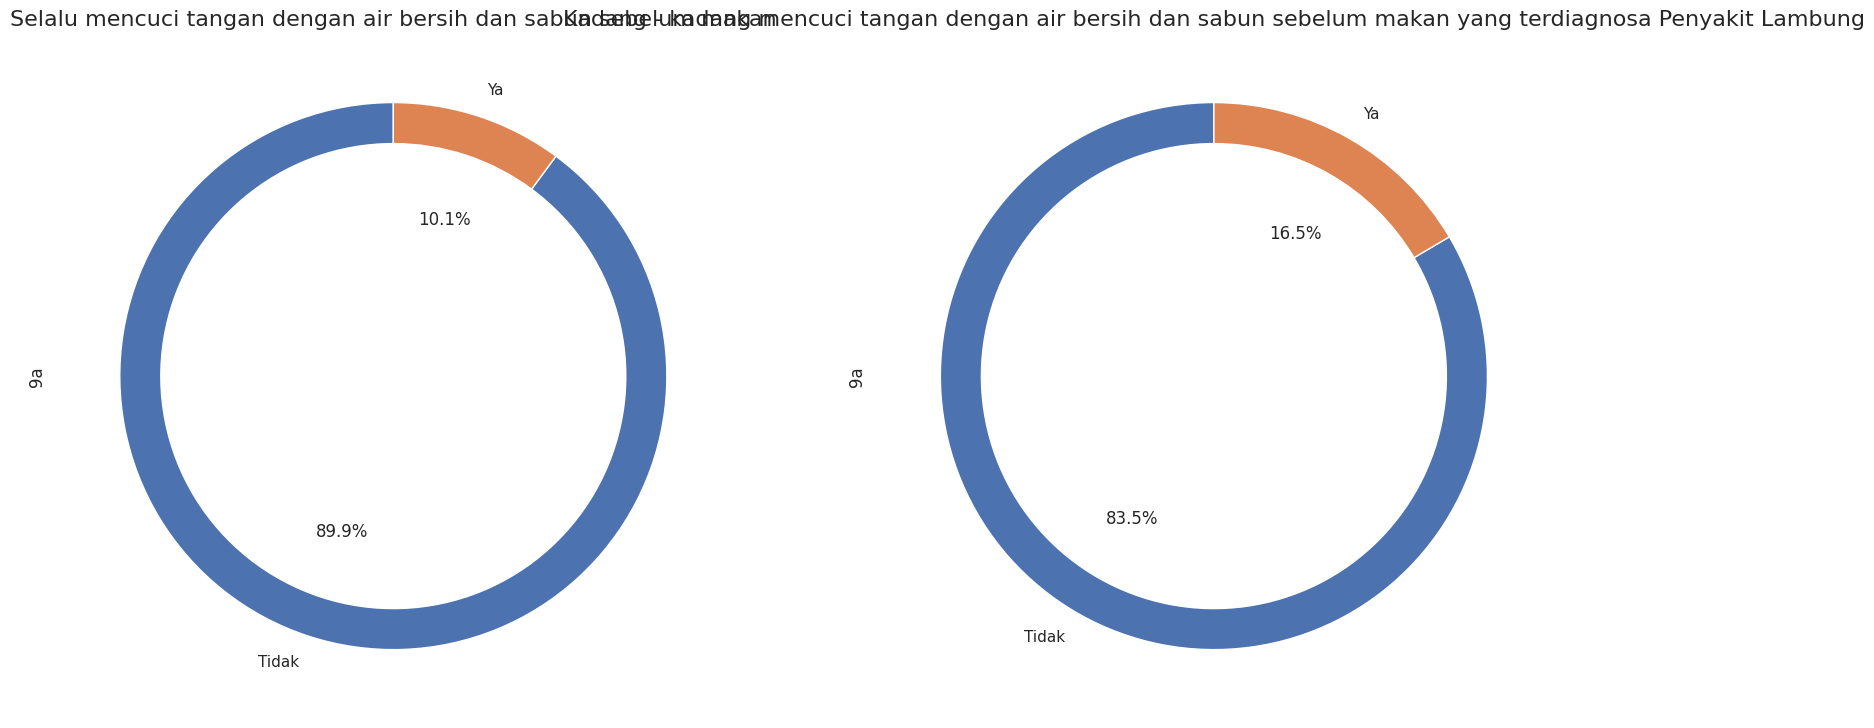

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['36b'] == 'Selalu'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Selalu mencuci tangan dengan air bersih dan sabun sebelum makan', size=16)

plt.subplot(1,3,2)
df['9a'][df['36b'] == 'Kadang - kadang'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Kadang - kadang mencuci tangan dengan air bersih dan sabun sebelum makan yang terdiagnosa Penyakit Lambung', size=16)

plt.show()

Terlihat individu yang tidak selalu mencuci tangan sebelum makan memiliki probabilitas lebih tinggi menderita penyakit lambung. Maka kebiasan mencuci tangan sebelum makan berpengaruh.

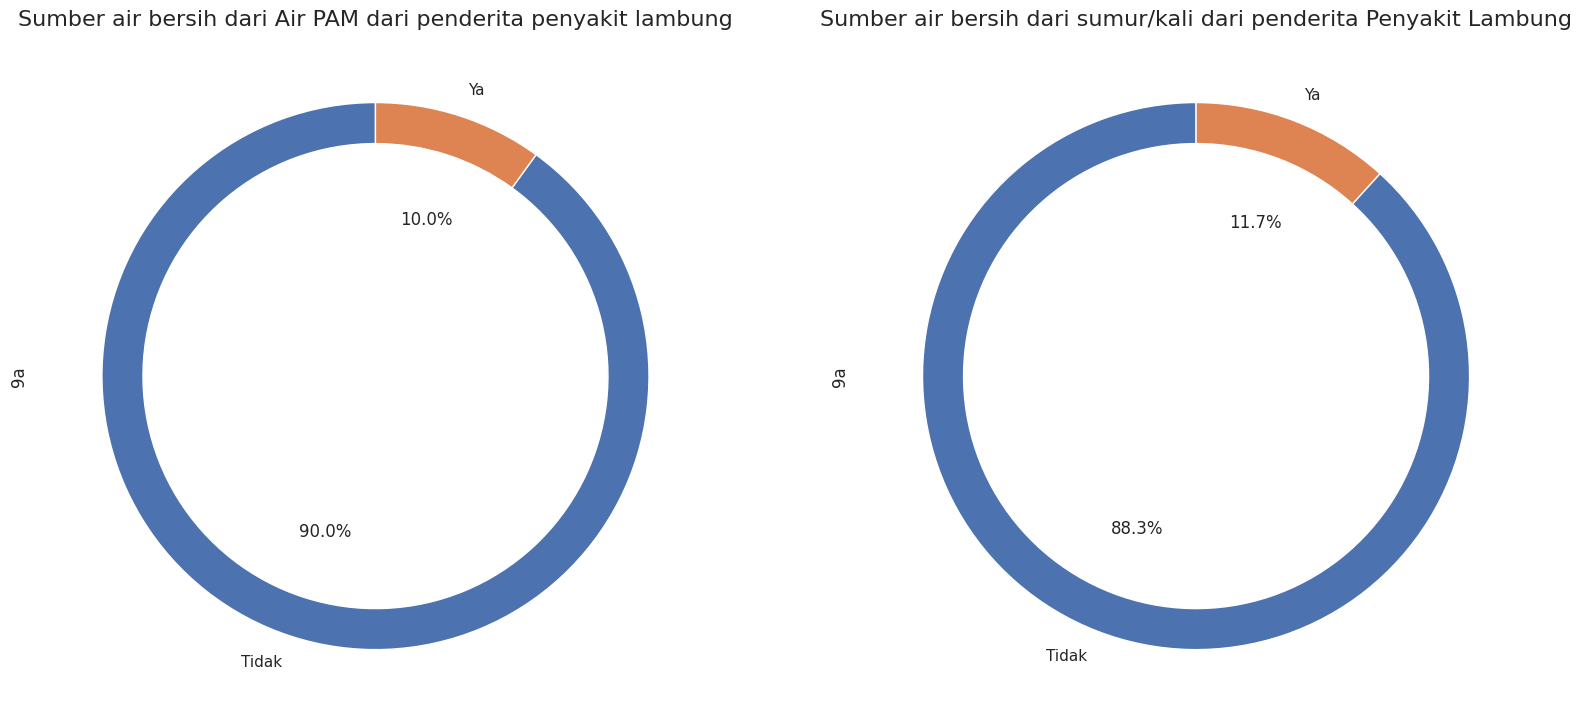

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['39b'] == 'Air PAM'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Sumber air bersih dari Air PAM dari penderita penyakit lambung', size=16)

plt.subplot(1,3,2)
df['9a'][df['39b'] == 'Sumur/Kali'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Sumber air bersih dari sumur/kali dari penderita Penyakit Lambung', size=16)

plt.show()

Terlihat individu yang memiliki sumber air bersih dari Air PAM dan sumu/rkali hampir sama. Maka sumber air tidak terlalu berpengaruh.

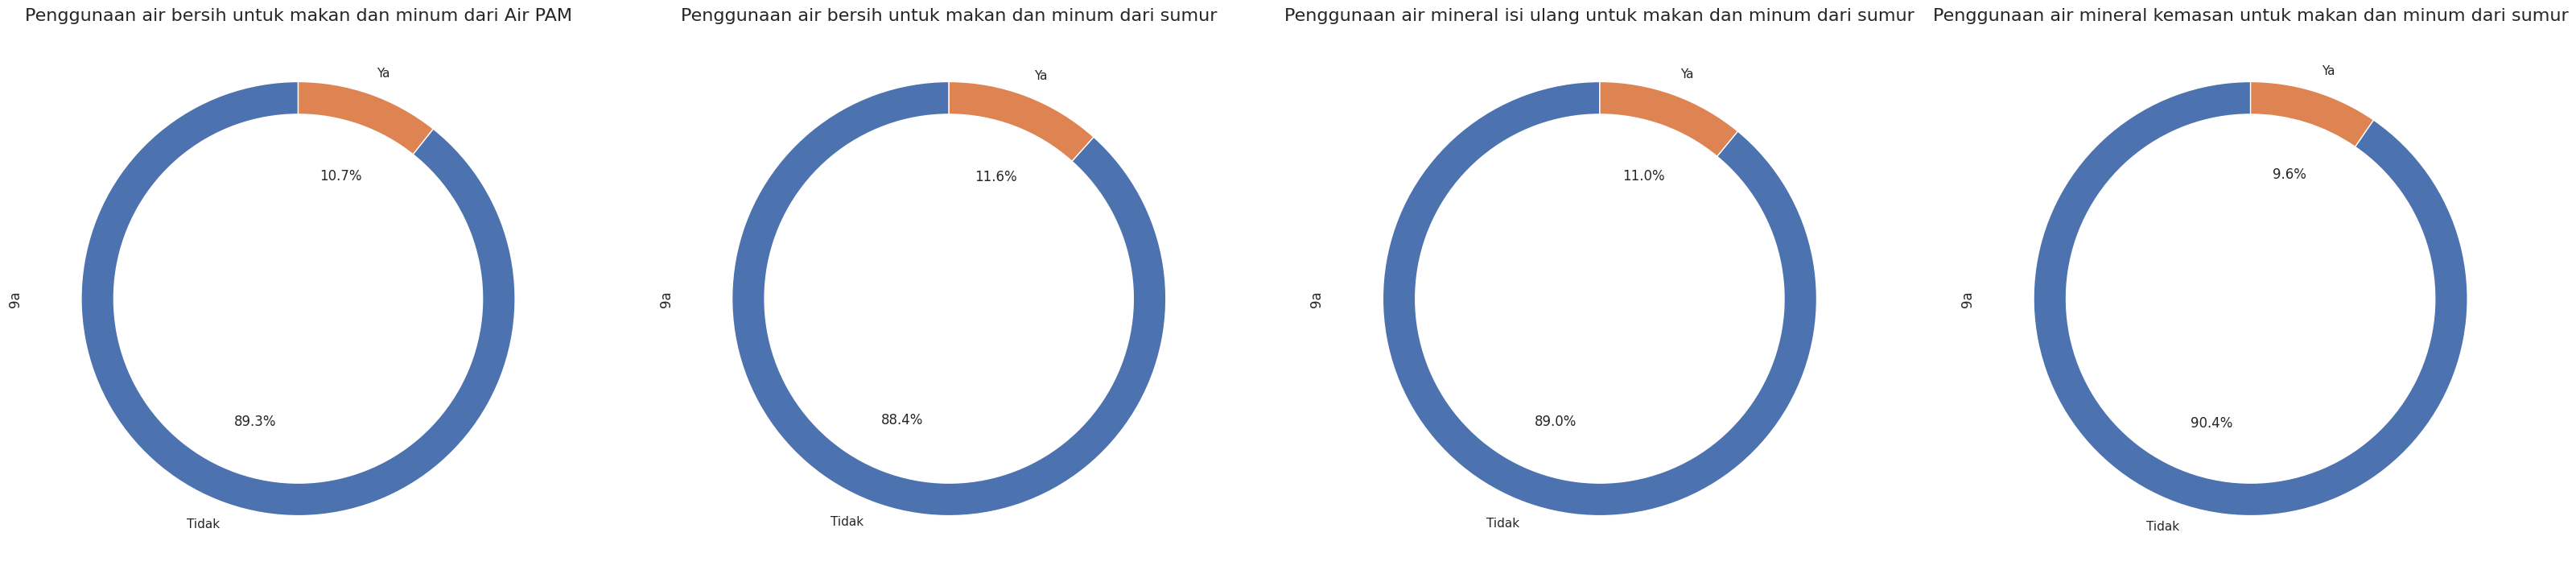

In [ ]:
figure = plt.figure(figsize=[40, 10])

plt.subplot(1,4,1)
df['9a'][df['40b'] == 'Air PAM'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Penggunaan air bersih untuk makan dan minum dari Air PAM', size=16)

plt.subplot(1,4,2)
df['9a'][df['40b'] == 'Air sumur'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Penggunaan air bersih untuk makan dan minum dari sumur', size=16)

plt.subplot(1,4,3)
df['9a'][df['40b'] == 'Air mineral isi ulang'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Penggunaan air mineral isi ulang untuk makan dan minum dari sumur', size=16)

plt.subplot(1,4,4)
df['9a'][df['40b'] == 'Air mineral kemasan'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Penggunaan air mineral kemasan untuk makan dan minum dari sumur', size=16)

plt.show()

Terlihat individu dengan penggunaan dari berbagai sumber hampir sama. Maka sumber air untuk makan dan minum tidak terlalu berpengaruh.

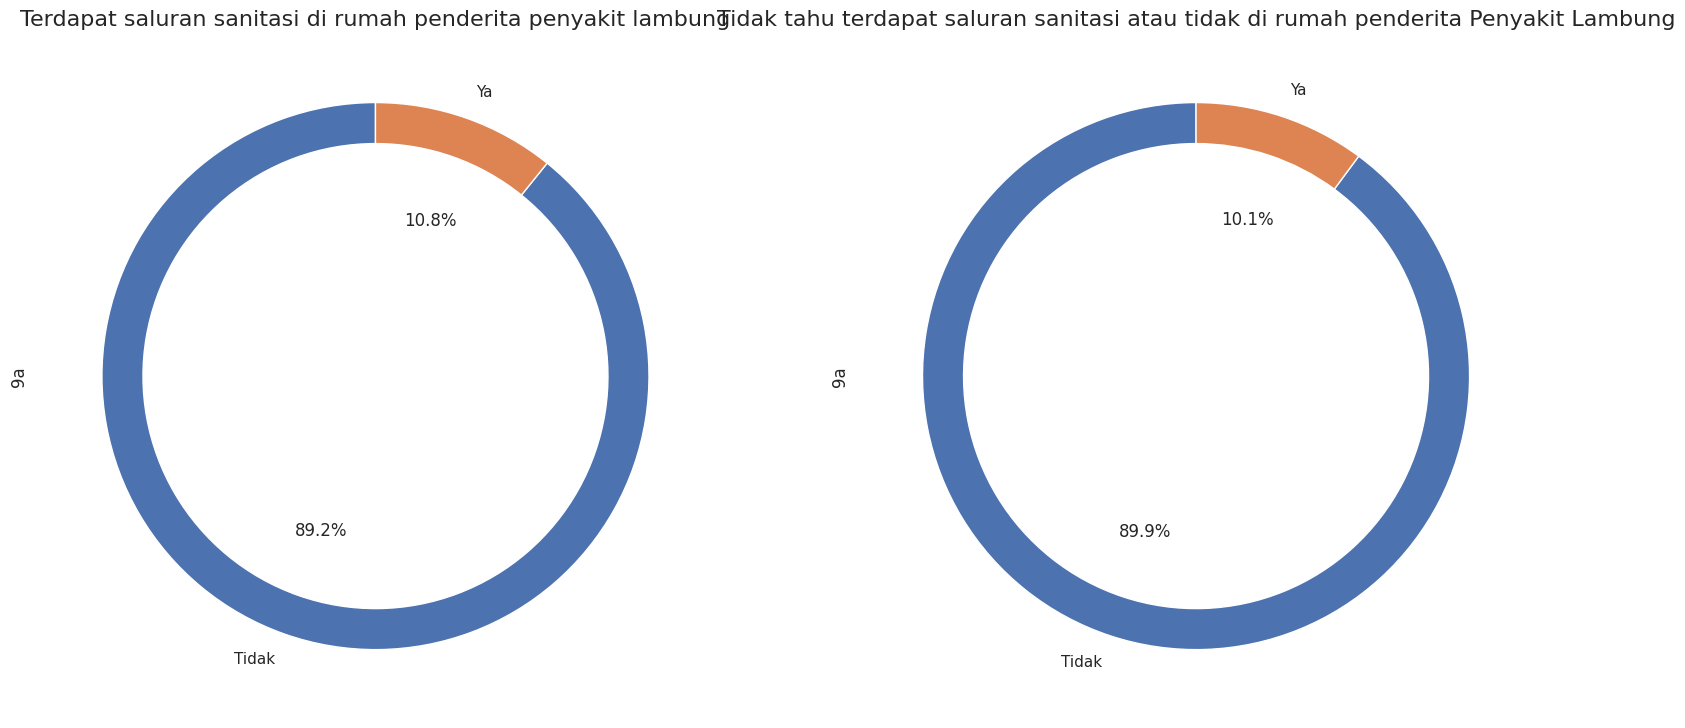

In [ ]:
figure = plt.figure(figsize=[30, 10])

plt.subplot(1,3,1)
df['9a'][df['42b'] == 'Ada'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Terdapat saluran sanitasi di rumah penderita penyakit lambung', size=16)

plt.subplot(1,3,2)
df['9a'][df['42b'] == 'Tidak tahu'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Tidak tahu terdapat saluran sanitasi atau tidak di rumah penderita Penyakit Lambung', size=16)

plt.show()

Terlihat persentasi dari kedua jawaban hampir sama. Maka tidak dapat dipastikan variabel sanitasi berpengaruh.

**Kesimpulan**

Kita peroleh bahwa variabel yang mempengaruhi seorang individu terdiagnosa penyakit lambung adalah ;

-merokok
- perasaan tidak enak di perut
- pencernaan terganggu
- faktor stres (sulit tidur, cemas, takut, lelah)
- tidak nafsu makan
- faktor lingkungan (polusi, kebersihan tangan, kebersihan gigi)
- pola makan (alkohol, gula, junkfood)

# Insight Penyakit Thypus

Dari data yang diperoleh, penyakit **thypus** merupakan penyakit tertinggi ke-3 yang diderita oleh responden.

Penyakit thypus sendiri berkaitan erat dengan faktor kebersihan diri dan lingkungan. Dengan beberapa gejala yaitu, diare, demam, nyeri perut, mual, muntah, dan perubahan warna kulit menjadi kemerahan.

Berdasarkan gejala-gejala yang sudah disebutkan, maka akan dilihat dari variabel-variabel berikut dengan asumsi bahwa hal tersebut menjadi faktor terkenanya penyakit thypus.

* 18a = Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ? (Ya, Tidak)
* 15a = Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ? (Ya, Tidak)
* 1b = Sering menderita sakit kepala ? (Ya, Kandang-kadang, Tidak)
* 2b = Tidak nafsu makan ? (Ya, Kandang-kadang, Tidak)
* 7b = Pencernaan anda terganggu / buruk ? (Ya, Kandang-kadang, Tidak)
* 18b = Merasa lelah sepanjang waktu? (Ya, Kandang-kadang, Tidak)
* 19b = Mengalami rasa tidak enak di perut? (Ya, Kadang-kadang, Tidak)
* 20b = Mudah lelah ? (Ya, Kandang-kadang, Tidak)
* 26b = Dalam 1 hari berapa kali Saudara mandi/ mencuci badan? (Tidak Pernah, 1 Kali, 2 Kali, >2 Kali)
* 33b = Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ? (Tidak Pernah, 1 Kali, 2 Kali, >2 Kali)
* 36b = Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan? (Selalu, Kadang-kadang, Tidak/Jarang sekali)
* 40b = Penggunaan air bersih untuk makan & minum bersumber dari : (Tadah hujan, Air PAM, Air sumur, Air mineral kemasan, Air mineral isi ulang)



###*upload dan rename data*###





In [ ]:
!gdown 1ZFXJvdGhbgU49y6M4bHlDP4ijd_58eHi

Downloading...
From: https://drive.google.com/uc?id=1ZFXJvdGhbgU49y6M4bHlDP4ijd_58eHi
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.csv
100% 195M/195M [00:01<00:00, 126MB/s]


In [ ]:
df = pd.read_csv("/content/data_kesehatan-Mental-SRQ-2023--Filtered.csv")

In [ ]:
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?':'1a'},inplace=True )
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?':'2a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?':'3a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?':'4a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?':'5a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?':'6a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?':'7a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?':'8a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?':'9a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?':'10a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?':'11a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?':'12a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?':'13a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?':'14a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?':'15a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?':'16a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?':'17a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?':'18a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?':'19a'},inplace=True)
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?':'20a'},inplace=True)
df.rename(columns={'Sering menderita sakit kepala ?':'1b'},inplace=True )
df.rename(columns={'Tidak nafsu makan ?':'2b'},inplace=True)
df.rename(columns={'Pencernaan anda terganggu / buruk ?':'7b'},inplace=True)
df.rename(columns={'Merasa lelah sepanjang waktu?':'18b'},inplace=True)
df.rename(columns={'Mengalami rasa tidak enak di perut?':'19b'},inplace=True)
df.rename(columns={'Mudah lelah ?':'20b'},inplace=True)
df.rename(columns={'Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?':'26b'},inplace=True)
df.rename(columns={'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?':'33b'},inplace=True)
df.rename(columns={'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?':'36b'},inplace=True)
df.rename(columns={'Penggunaan air bersih untuk makan & minum bersumber dari : ':'40b'},inplace=True)

###*visualisasi dan interpretasi*###

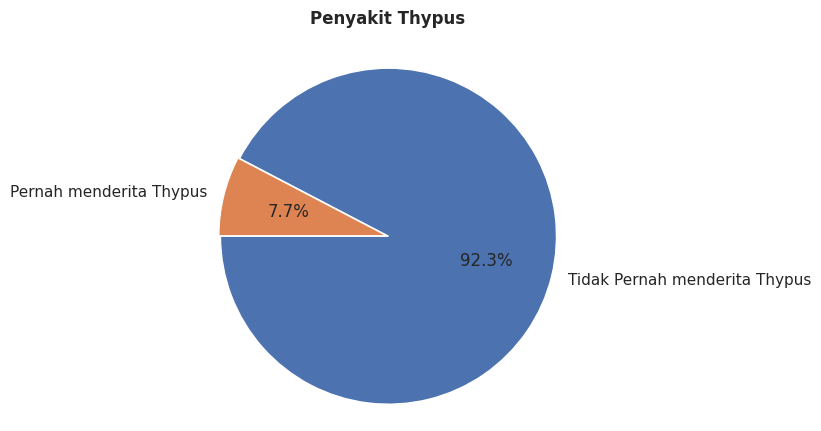

In [ ]:
#Pie Chart responden yang Pernah Menderita Penyakit Thypus

labels = ['Tidak Pernah menderita Thypus', 'Pernah menderita Thypus']

plt.pie(df['18a'].value_counts(),labels=labels, autopct='%1.1f%%',startangle=180, explode=(0.005,0.005))
plt.axis('equal')
plt.title('Penyakit Thypus', fontsize=12, fontweight='bold', pad=20)

plt.show()

Dapat dilihat pada Pie Chart di atas bahwa sebesar **7.7% atau 22.206 responden pernah terkena thypus**

In [ ]:
# Akan di drop kolom selain penderita thypus

drop= ['ID', 'WILAYAH', 'JENIS KELAMIN','USIA','LAMA BERDINAS','PENDIDIKAN TERAKHIR','TINGGI BADAN','BERAT BADAN','LINGKAR PINGGANG','Status Perkawinan','PENGELUARAN/BULAN','1a','2a','3a','4a','5a','6a','7a','8a', '9a','10a','11a','12a','13a','14a','16a','17a','19a','20a']
df = df.drop(columns=drop, axis=1)

In [ ]:
df_filter = df[df['18a'] != "Tidak"]

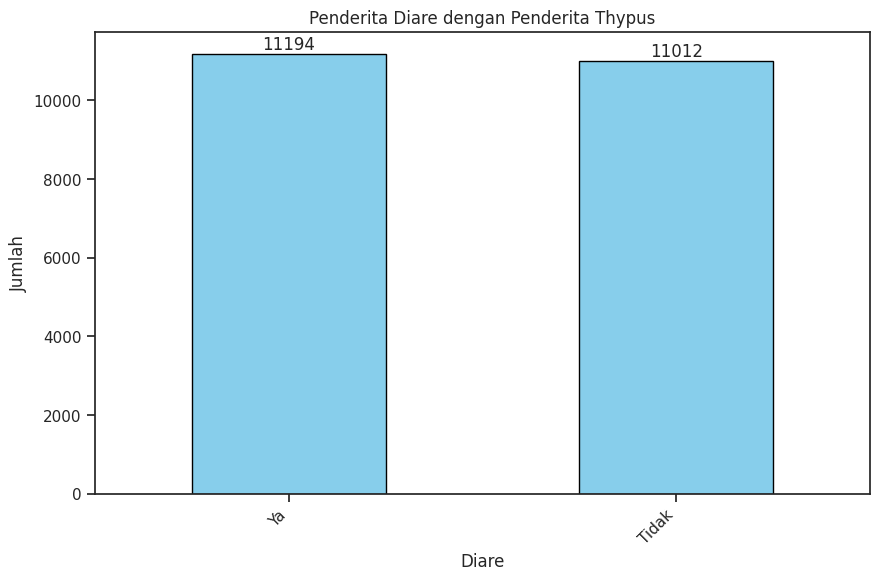

In [ ]:
# Penderita Diare dengan Penderita Thypus

count_diare = df_filter['15a'].value_counts()

count_diare.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Penderita Diare dengan Penderita Thypus')
plt.xlabel('Diare')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(count_diare):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Dapat dilihat bahwa 11194 penderita penyakit thypus **pernah menderita penyakit diare**.

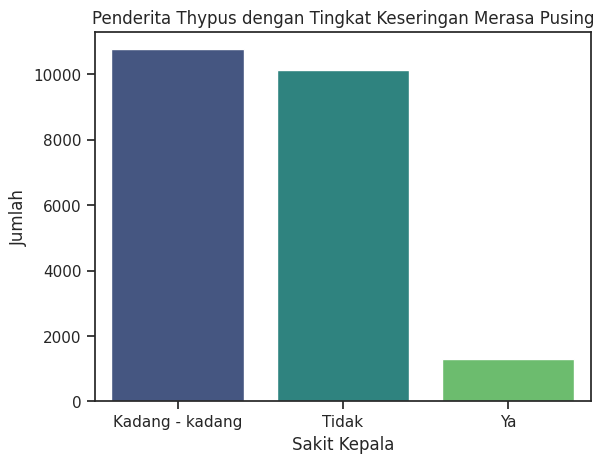

In [ ]:
# Sering Menderita Sakit Kepala

count_pusing = sns.countplot(x=df_filter['1b'], palette='viridis')
plt.xlabel('Sakit Kepala')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Tingkat Keseringan Merasa Pusing')
plt.show()

Dapat dilihat bahwa mayoritas penderita thypus **terkadang merasa sakit kepala**.

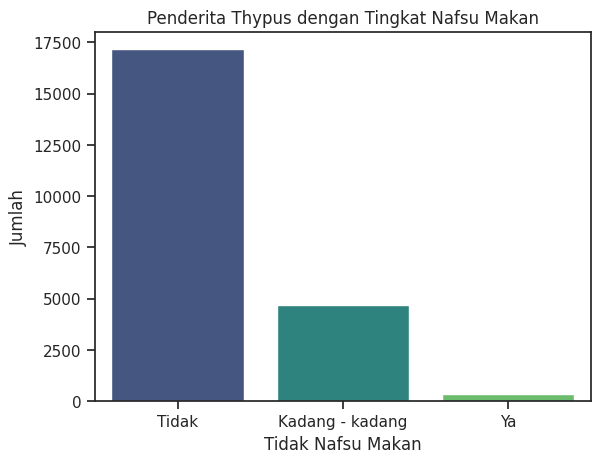

In [ ]:
# Tidak Nafsu Makan

count_pusing = sns.countplot(x=df_filter['2b'], palette='viridis')
plt.xlabel('Tidak Nafsu Makan')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Tingkat Nafsu Makan')
plt.show()

Dapat dilihat bahwa mayoritas penderita thypus **tidak merasa tidak nafsu makan**.

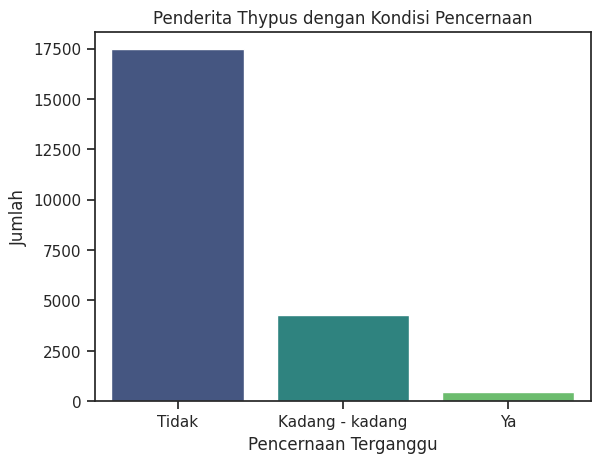

In [ ]:
# Pencernaan Terganggu atau Buruk

count_pusing = sns.countplot(x=df_filter['7b'], palette='viridis')
plt.xlabel('Pencernaan Terganggu')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Kondisi Pencernaan')
plt.show()

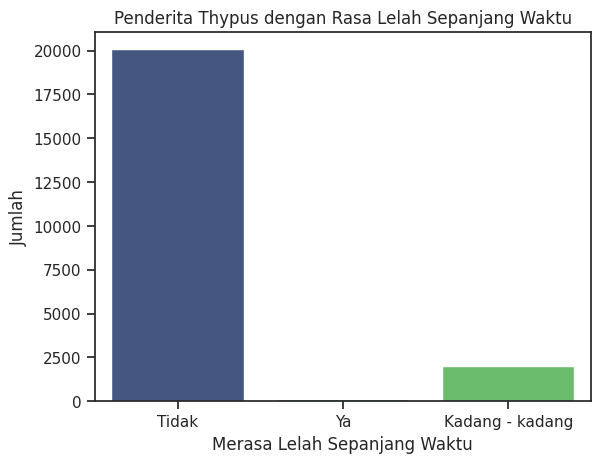

In [ ]:
# Merasa Lelah Sepanjang Waktu

count_pusing = sns.countplot(x=df_filter['18b'], palette='viridis')
plt.xlabel('Merasa Lelah Sepanjang Waktu')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Rasa Lelah Sepanjang Waktu')
plt.show()

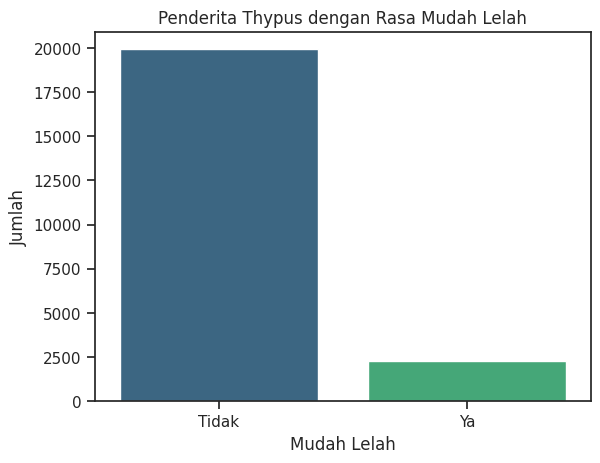

In [ ]:
# Mudah Lelah

count_pusing = sns.countplot(x=df_filter['20b'], palette='viridis')
plt.xlabel('Mudah Lelah')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Rasa Mudah Lelah')
plt.show()

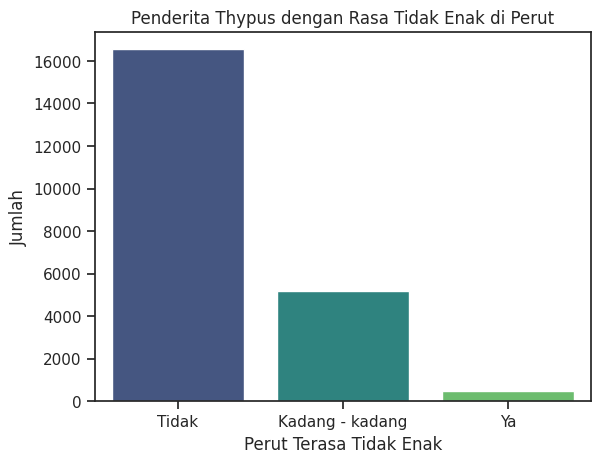

In [ ]:
# Merasa Tidak Enak di Perut

count_pusing = sns.countplot(x=df_filter['19b'], palette='viridis')
plt.xlabel('Perut Terasa Tidak Enak')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Rasa Tidak Enak di Perut')
plt.show()

In [ ]:
# Tingkat Keseringan Mandi

count_pusing = sns.countplot(x=df_filter['26b'], palette='viridis')
plt.xlabel('Dalam Satu Hari')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Tingkat Keseringan Mandi dalam Satu Hari')
plt.show()

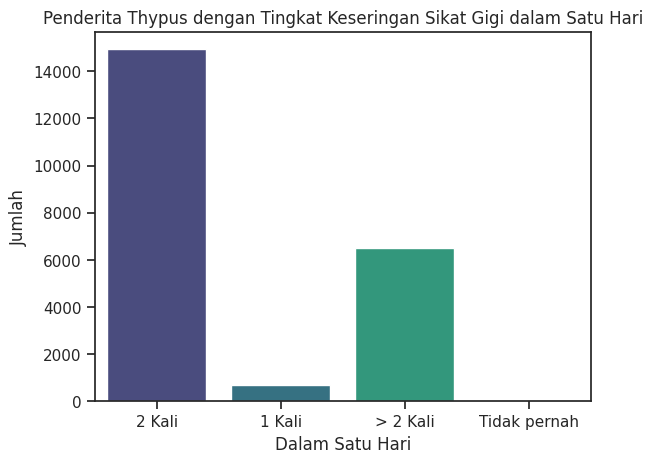

In [ ]:
# Tingkat Keseringan Sikat Gigi

count_pusing = sns.countplot(x=df_filter['33b'], palette='viridis')
plt.xlabel('Dalam Satu Hari')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Tingkat Keseringan Sikat Gigi dalam Satu Hari')
plt.show()

In [ ]:
# Tingkat Keseringan Mencuci Tangan

count_pusing = sns.countplot(x=df_filter['36b'], palette='viridis')
plt.xlabel('Dalam Satu Hari')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Tingkat Keseringan Mencuci Tangan Sebelum Makan')
plt.show()

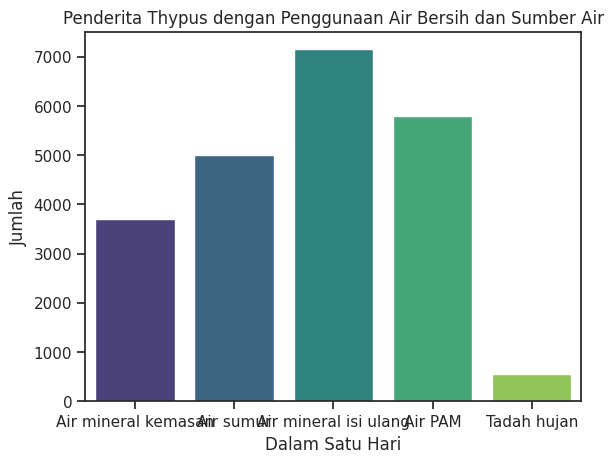

In [ ]:
# Penggunaan Air Bersih dan Sumber Air

count_pusing = sns.countplot(x=df_filter['40b'], palette='viridis')
plt.xlabel('Dalam Satu Hari')
plt.ylabel('Jumlah')
plt.title('Penderita Thypus dengan Penggunaan Air Bersih dan Sumber Air')
plt.show()

**Kesimpulan**

Rata-rata penderita penyakit thypus terkena penyakit diare, dan terkadang mayoritas merasakan pusing. Tetapi, untuk variabel-variabel lain maupun gaya hidup, sebagian besar penderita penyakit thypus tidak merasakan gejala atau menjalani gaya hidup tesebut.

# Insight 4 - Penyakit Covid-19

Covid-19 adalah penyakit yang disebabkan oleh virus SARS-CoV-2, yang termasuk dalam keluarga virus Coronaviridae. Beberapa gejala umum Covid-19 termasuk demam, batuk kering, kelelahan, kesulitan bernapas, hilangnya indera penciuman atau perasa, sakit tenggorokan, dan gejala flu lainnya.

Berdasarkan gejala tersebut, akan diambil beberapa variabel yang mungkin berpengaruh dalam menyebabkan terdiagnosa Covid-19.

- 1b - Sakit kepala (kadang2, tidak, ya)
- 2b - Tidak nafsu makan (kadang2, tidak, ya)
- 3b - sulit tidur  (kadang2, tidak, ya)
- 18b - lelah sepanjang waktu  (kadang2, tidak, ya)
- 23b - berapa kali olahraga selama seminggu (4 kali atau lebih dalam seminggu, Kurang dari 4 kali dalam seminggu)
- 36b- Apakah selalu cuci tangan air sabun sebelum makan (selalu, kadang-kadang, Tidak/Jarang sekali)
- 37b - tempat tinggal punya sirkulasi udara cukup (Lebih dari 1 sirkulasi udara, - Tidak ada sirkulasi udara, Kurang dari 1 sirkulasi udara)
- 38b - tempat tinggal terganggu polusi udara tidak sehat (Tidak tahu, Ya, Tidak)
- 40b - penggunaan air bersih untuk makan dan minum bersumber dari (Air mineral isi ulang, Air mineral kemasan, Air sumur, Air PAM)
- 45b - fasilitas umum sekitar rumah untuk aktivitas (Tidak tahu, Ada, Tidak ada)



In [ ]:
import warnings; warnings.simplefilter('ignore')
import gdown
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

In [ ]:
!gdown 1ZFXJvdGhbgU49y6M4bHlDP4ijd_58eHi

In [ ]:
df = pd.read_csv ("/content/data_kesehatan-Mental-SRQ-2023--Filtered.csv")

In [ ]:
#rename nama kolom sesuai variabel yang di inginkan
df.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?':'13a'},inplace=True)
df.rename(columns={'Sering menderita sakit kepala ?':'1b'},inplace=True )
df.rename(columns={'Tidak nafsu makan ?':'2b'},inplace=True)
df.rename(columns={'Sulit tidur ?':'3b'},inplace=True)
df.rename(columns={'Merasa lelah sepanjang waktu?':'18b'},inplace=True)
df.rename(columns={'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?':'23b'},inplace=True)
df.rename(columns={'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?':'36b'},inplace=True)
df.rename(columns={'Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?':'37b'},inplace=True)
df.rename(columns={'Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?':'38b'},inplace=True)
df.rename(columns={'Penggunaan air bersih untuk makan & minum bersumber dari : ':'40b'},inplace=True)
df.rename(columns={'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?':'45b'},inplace=True)

In [ ]:
df['13a'].value_counts()

Pie Chart responden pernah terdiagnosa Covid-19

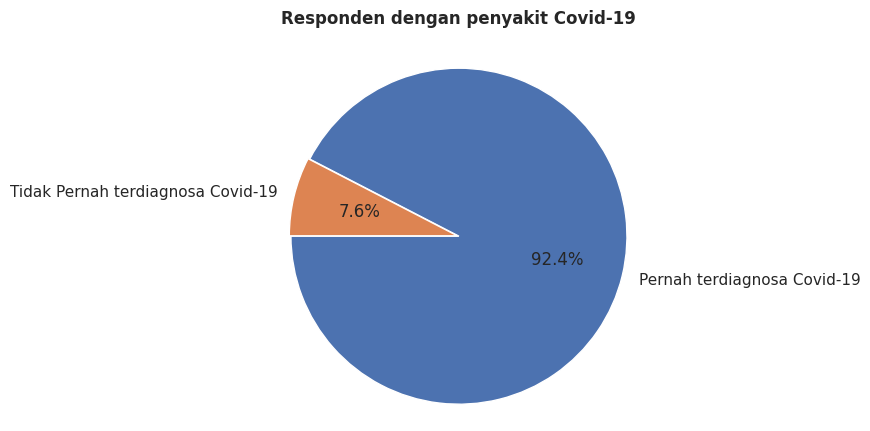

In [ ]:
labels = ['Pernah terdiagnosa Covid-19', 'Tidak Pernah terdiagnosa Covid-19']

plt.pie(df['13a'].value_counts(),labels=labels, autopct='%1.1f%%',startangle=180, explode=(0.005,0.005))
plt.axis('equal')
plt.title('Responden dengan penyakit Covid-19', fontsize=12, fontweight='bold', pad=20)
plt.show()

Dari visualisasi pie chart di atas, terlihat sebanyak 92,4% responden atau sejumlah 22000 orang pernah mengalami penyakit Covid-19. Berdasarkan perhitungan nilai untuk penyakit Covid-19, di dapat 267.801 tidak pernah mengalami atau terdiagnosa.

Pie Chart jenis kelamin yang mengalami dan tidak mengalami diagnosa Covid-19

In [ ]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
df['13a'][df['JENIS KELAMIN'] == 'LAKI - LAKI'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Laki-Laki terdiagnosa Covid-19', size=16)

plt.subplot(1,3,2)
df['13a'][df['JENIS KELAMIN'] == 'PEREMPUAN'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Perempuan terdiagnosa Covid-19', size=16)

plt.show()

Terlihat bahwa responden berjenis **perempuan** cenderung lebih banyak terdiagnosa Covid-19 dibanding Laki-Laki.

Pie Chart orang terdiagnosa Covid-19 dengan diagnosa keluhan mudah lelah.

Orang yang terkena diagnosa Covid-19 cenderung **mudah kekah** sebanyak 10.8%

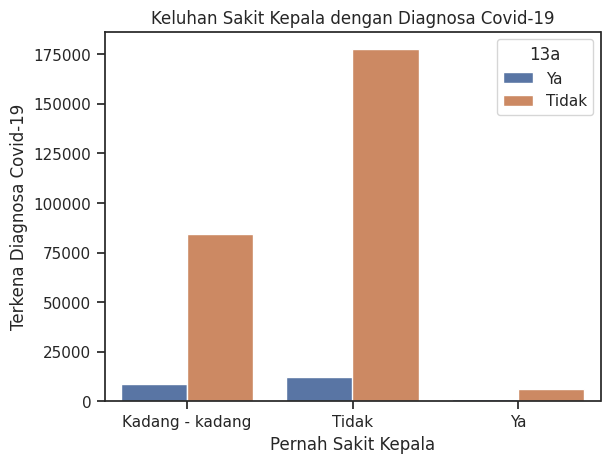

In [ ]:
#1-Diagnosa Keluhan Sakit Kepala dengan Diagnosa Penyakit Covid-19
sns.countplot(x="1b", hue="13a", data=df)
plt.title("Keluhan Sakit Kepala dengan Diagnosa Covid-19")
plt.xlabel("Pernah Sakit Kepala")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Responden yang menjawab yang tidak pernah sakit kepala, maka tidak mengalami diagnosa Covid-19. Asumsikan, apabila tidak Covid-19 maka tidak mengalami keluhan Sakit Kepala.

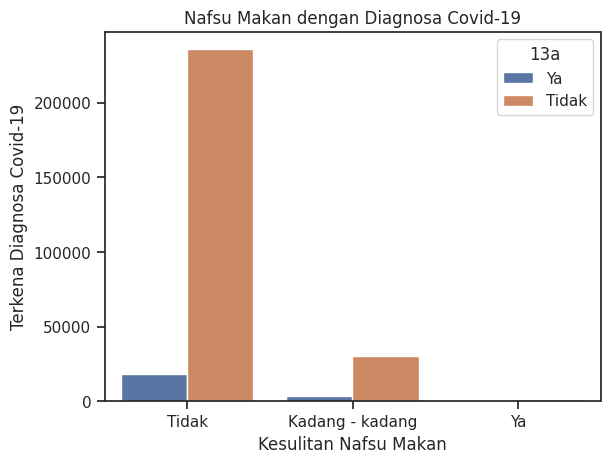

In [ ]:
#2-Diagnosa Nafsu Makan dengan Diagnosa Penyakit Covid-19
sns.countplot(x="2b", hue="13a", data=df)
plt.title("Nafsu Makan dengan Diagnosa Covid-19")
plt.xlabel("Kesulitan Nafsu Makan")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Responden yang memilih tidak pada pertanyaan "Tidak Nafsu Makan", menjadi angka mayoritas. Artinya, yang tidak mengidap diagnosis Covid-19 masih memiliki nafsu makan.

In [ ]:
#3-Diagnosa Sulit Tidur dengan Diagnosa Penyakit Covid-19
sns.countplot(x="3b", hue="13a", data=df)
plt.title("Sulit Tidur dengan Diagnosa Covid-19")
plt.xlabel("Kesulitan Tidur")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Responden yang terdiagnosa Covid-19, tidak mengalami kesulitan tidur.

In [ ]:
#4-Diagnosa Lelah Sepanjang Waktu dengan Diagnosa Penyakit Covid-19
sns.countplot(x="18b", hue="13a", data=df)
plt.title("Lelah Sepanjang Waktu dengan Diagnosa Covid-19")
plt.xlabel("Mengalami Lelah Sepanjang Waktu")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Orang yang tidak mengalami Covid-19 tidak mengalami lelah sepanjang waktu.

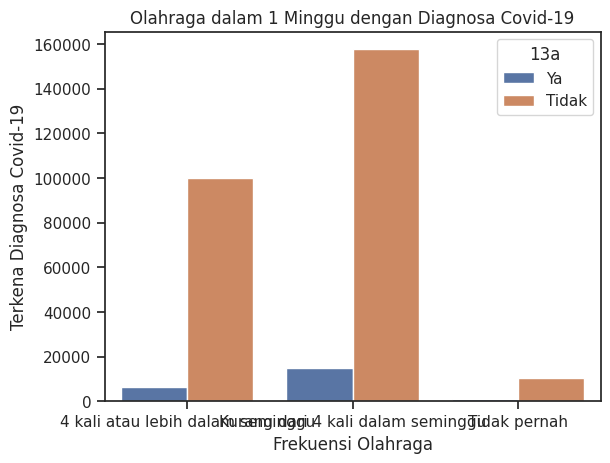

In [ ]:
#5-Lifestyle Olahraga dalam Seminggu dengan Diagnosa Penyakit Covid-19
sns.countplot(x="23b", hue="13a", data=df)
plt.title("Olahraga dalam 1 Minggu dengan Diagnosa Covid-19")
plt.xlabel("Frekuensi Olahraga")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Mayoritas responden yang tidak terdiagnosa Covid-19, melakukan olahraga kurang dari 4 kali dalam satu minggu. Sehingga olahraga pun tidak memengaruhi diagnosa covid.

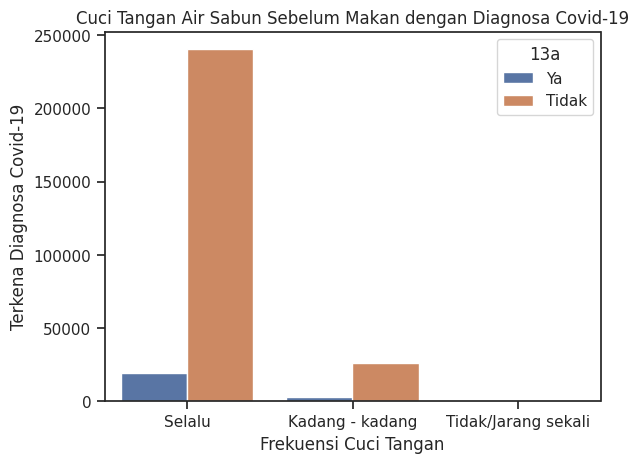

In [ ]:
#6-Lifestyle Cuci Tangan dengan Diagnosa Penyakit Covid-19
sns.countplot(x="36b", hue="13a", data=df)
plt.title("Cuci Tangan Air Sabun Sebelum Makan dengan Diagnosa Covid-19")
plt.xlabel("Frekuensi Cuci Tangan")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Orang yang tidak terdiagnosa Covid-19, selalu mencuci tangan dengan air sabun sebelum dan sesudah makan. Dapat dikatakan kebersihan, menjaga diri dari Covid-19.

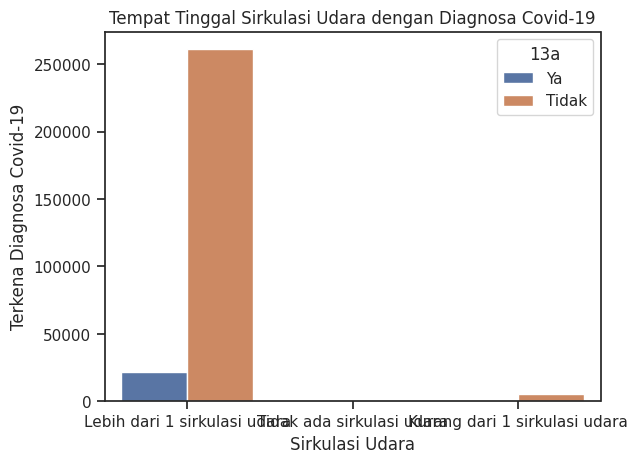

In [ ]:
#7-Lifestyle Tempat Tinggal dengan Diagnosa Penyakit Covid-19
sns.countplot(x="37b", hue="13a", data=df)
plt.title("Tempat Tinggal Sirkulasi Udara dengan Diagnosa Covid-19")
plt.xlabel("Sirkulasi Udara")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Orang yang sehat (tidak terdiagnosa Covid-19) memiliki lebih dari 1 sirlulasi udara sehingga perputaran udara bersih dan kotor cepat.

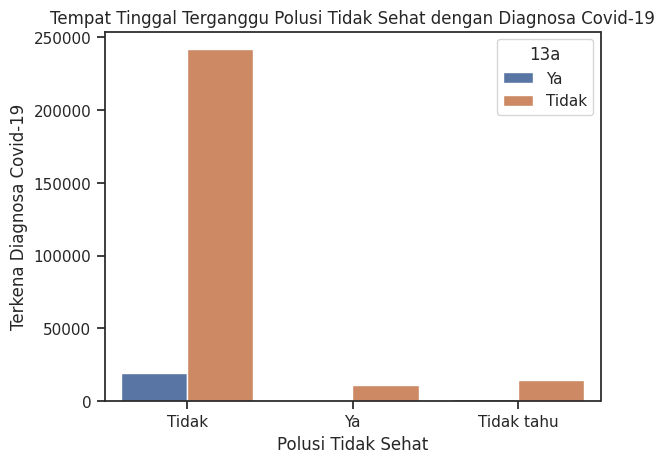

In [ ]:
#8-Lifestyle Tempat Tinggal dengan Diagnosa Penyakit Covid-19
sns.countplot(x="38b", hue="13a", data=df)
plt.title("Tempat Tinggal Terganggu Polusi Tidak Sehat dengan Diagnosa Covid-19")
plt.xlabel("Polusi Tidak Sehat")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Orang yang tidak terdiagnosa Covid-19, tidak berada di tempat tinggal yang terganggu polusi tidak sehat.

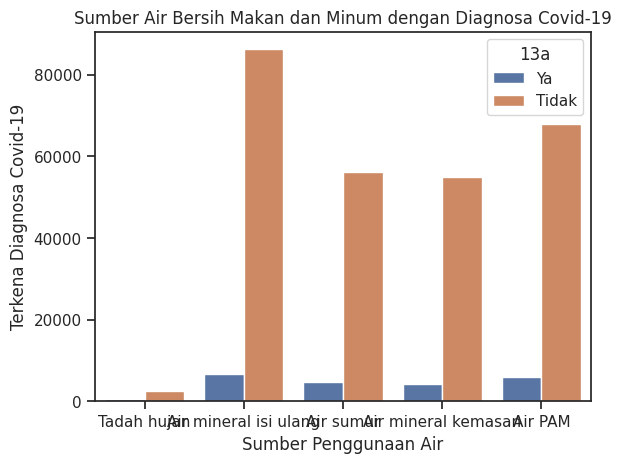

In [ ]:
#8-Lifestyle Air Bersih dengan Diagnosa Penyakit Covid-19
sns.countplot(x="40b", hue="13a", data=df)
plt.title("Sumber Air Bersih Makan dan Minum dengan Diagnosa Covid-19")
plt.xlabel("Sumber Penggunaan Air")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Mayoritas orang yang non-Covid-19 adalah orang yang menggunakan air bersih makan dan minum bersumber dari Air Mineral Isi Ulang.

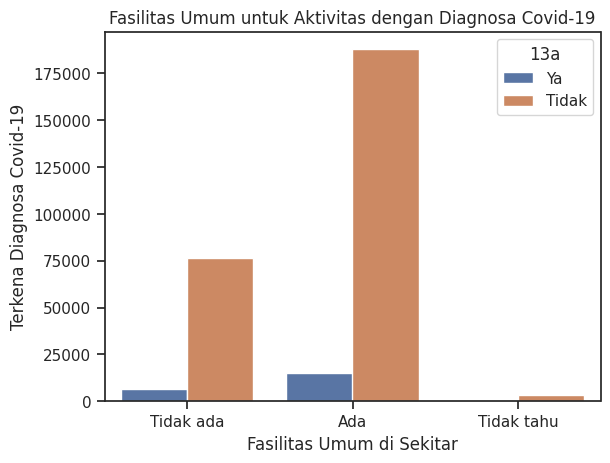

In [ ]:
#9-Lifestyle Fasilitas Umum dengan Diagnosa Penyakit Covid-19
sns.countplot(x="45b", hue="13a", data=df)
plt.title("Fasilitas Umum untuk Aktivitas dengan Diagnosa Covid-19")
plt.xlabel("Fasilitas Umum di Sekitar")
plt.ylabel("Terkena Diagnosa Covid-19")
plt.show()

Responden yang tidak terdiagnosa Covid-19 mayoritas memiliki fasilitas umum di sekitar rumah untuk kegiatan beraktivitas.

**Kesimpulan**

Dalam melihat apa saja pengaruh seseorang sampai terdiagnosis Covid-19, dapat dikatakan lingkungan di sekitar terutama tentang sirkulasi udara lebih memengaruhi kondisi. Apabila sirkulasi udara terjaga dan responden sering berkegiatan di tempat yang bersih, maka dapat dikatakan mereka tidak dengan mudah terdiagnosa Covid-19.

Diagnosa keluhan yang dipilih seperti sakit kepala, nafsu makan, sulit tidur, dan lelah sepanjang waktu tidak memengaruhi alasan seseorang dapat terdiagnosa Covid-19.

Sementara itu, lifestyle seseorang juga tidak terlihat berpengaruh seperti frekuensi olahraga. Namun, hal ini berbanding terbalik dengan lifestyle sanitasi, orang yang tidak terdiagnosa Covid-19 mayoritas selalu mencuci tangan dengan air dan sabun sebelum sesudah makan.

Dapat disimpulkan, Covid-19 sangat berpengaruh dengan sirkulasi serta sanitasi responden.